In [1]:
import pandas as pd
import numpy as np

# user_store distance

In [2]:
path = '/Volumes/GoogleDrive/My Drive/wish_local/fusion_package_breakdown/store_cannibalization/data'
user_store_dist = pd.read_csv(f'{path}/user_store_dist_5km_final.csv')

In [3]:
user_store_dist.shape

(28089546, 4)

In [110]:
user_store_dist_dict = user_store_dist[['store_id', 'user_id', 'user_store_dist']\
                                      ].set_index('store_id').T.to_dict()

# First mile id level 

In [168]:
dates = ['delivered_date']
df = pd.read_csv(\
'/Volumes/GoogleDrive/My Drive/wish_local/fusion_package_breakdown/store_cannibalization/data/m_transaction_id.csv',\
parse_dates=dates, infer_datetime_format=True)

In [5]:
df.head()

,m_transaction_id,transaction_id,variation_id,product_id,store_id,store_order_id,country,combined_to,first_mile_tracking_id,delivered,delivered_date,user_id,orig_num_fm,last_combined_time,last_combined_date,orig_user_store_dist
0,5fd99db95eaaea7a92e99c58,5fd99dac4dbac47730ea0071,5af5fcd4cdd84615534048ea,5af5fcd4cdd84615534048e9,5df7faa333d3222278e41269,5fd99daf4dbac47730ea0081,MX,MMXQP009093407R,WI001419619145EPC,1611269751,2021-01-21,5cd755562795601647f5cca2,1.0,1.609139e+09,NaN,7.20
1,5fcba1f48025d32c0ccc7f3d,5fcba1f11b44b3714901a062,5fb60944dd319283721a5b8b,5fb6093d6bfc907fc0e63f67,5ef3992179fe1831da80e7f3,5fcba1f11b44b3714901a064,MX,MMXQP008777612R,WI001419014585EPC,1610425585,2021-01-11,5ac12174a74f681a60eafe32,1.0,1.607674e+09,NaN,0.54
2,5fc9489dd7042a3955c4ac60,5fc9489848c1a9761fb71863,5a92329f7ddb0651d0857ba1,5a46619e325cf4784dd10132,5dbb4a67dbd86d2e53358d30,5fc9489948c1a9761fb7186a,MX,MMXQP008783595R,WI001418859095EPC,1610043650,2021-01-07,550de581f9b68a10027b7d58,3.0,1.607674e+09,NaN,0.40
3,5fc197423d9ad34fcd63e03d,5fc1973f1a8a41a017171b37,5d82691d0a01100f87444085,5d82691c4e9209255e37b50c,5d534b9a1d9a8e4513f04b6c,5fc197401a8a41a017171b39,MX,MMXQP008733381R,WI001418579113EPC,1610612428,2021-01-14,570d4060919d9f10a0c63fcb,9.0,1.607411e+09,NaN,2.52
4,5fcf92e80c1c8e447c3b4a6e,5fcf92ddb7c0f3c15cf66208,5c256c23087b9e21f3914b33,5c17e1af0d6e582246d58f8e,5da78cb6a05102006697c701,5fcf92dfb7c0f3c15cf66215,MX,MMXQP008922941R,WI001419129209EPC,1610831151,2021-01-16,59d17f2450f1a4df320ca9b5,12.0,1.608545e+09,NaN,2.71


In [169]:
# to first mile tracking id level
df = df[['first_mile_tracking_id', 'store_id', 'combined_to', \
    'delivered', 'delivered_date', 'user_id', 'orig_num_fm',\
    'last_combined_time', 'orig_user_store_dist']].drop_duplicates()

In [170]:
df.shape

(163409, 9)

In [171]:
df.isna().sum()

first_mile_tracking_id     21
store_id                    0
combined_to                21
delivered                   0
delivered_date              0
user_id                     0
orig_num_fm                21
last_combined_time         21
orig_user_store_dist      122
dtype: int64

In [172]:
df = df[~((df['combined_to'].isna()) |\
          (df['orig_user_store_dist'].isna()) | \
          (df['orig_user_store_dist']==np.inf) | \
          (df['orig_user_store_dist']>=20))]

In [173]:
df.isna().sum()

first_mile_tracking_id    0
store_id                  0
combined_to               0
delivered                 0
delivered_date            0
user_id                   0
orig_num_fm               0
last_combined_time        0
orig_user_store_dist      0
dtype: int64

In [174]:
df.describe(percentiles=[.25,.5,.75,.9, .95, .97, .99])

,delivered,orig_num_fm,last_combined_time,orig_user_store_dist
count,1.587030e+05,158703.000000,1.587030e+05,158703.000000
mean,1.610781e+09,7.035248,1.609073e+09,2.346406
std,6.481842e+05,5.248563,1.384914e+06,3.130761
min,1.609488e+09,1.000000,1.603008e+09,0.000000
25%,1.610375e+09,3.000000,1.608192e+09,0.530000
50%,1.610708e+09,6.000000,1.608811e+09,1.140000
75%,1.611278e+09,10.000000,1.609643e+09,2.700000
90%,1.611732e+09,14.000000,1.610597e+09,6.150000
95%,1.611887e+09,17.000000,1.612069e+09,9.050000
97%,1.611926e+09,19.000000,1.612853e+09,11.580000


<AxesSubplot:>

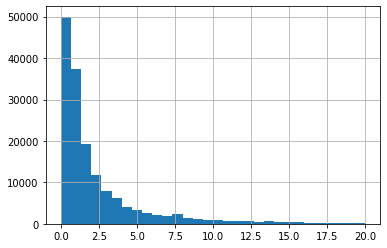

In [175]:
df['orig_user_store_dist'].hist(bins=30)

# Package level

In [176]:
pkg = df.groupby('combined_to').agg({\
                               'last_combined_time': [max],\
                               'delivered':[max],\
                               'delivered_date':[max],\
                               'store_id': [set],\
                               'orig_num_fm': [max],\
                               'first_mile_tracking_id':[list], \
                              })
pkg.columns = ['last_combined_time', 'delivered', 'delivered_date', 'store_id', 'orig_num_fm', 'first_mile_tracking_id_list']
pkg = pkg.reset_index()


In [177]:
# check, correct
pkg['store_id'].apply(len).max()

1

In [178]:
pkg['store_id'] = pkg['store_id'].apply(lambda x: list(x)[0])

In [179]:
pkg.head()

,combined_to,last_combined_time,delivered,delivered_date,store_id,orig_num_fm,first_mile_tracking_id_list
0,F3552820110100DC,1.607669e+09,1609847166,2021-01-05,5db363a3f547aa289e921d57,1.0,[WI001412218712EPC]
1,F3552820110100H7,1.607422e+09,1609842131,2021-01-05,5dba0118233b1229e4fe24be,2.0,"[WI001411822944EPC, WI001411299330EPC]"
2,F3552820110100MT,1.604556e+09,1609856008,2021-01-05,5d37704bdb8759203208b975,3.0,"[WI001411707688EPC, WI001411580324EPC, WI00141..."
3,F3552820110300D3,1.609123e+09,1609804570,2021-01-04,5d5b4d2f88515136fd078657,2.0,"[WI001411468149EPC, WI001412180929EPC]"
4,F3552820110300JI,1.609133e+09,1609804570,2021-01-04,5d5ad4211d86296883447b27,2.0,"[WI001412511665EPC, WI001412458514EPC]"


## check if orig_num_fm == first_mile_tracking_id_list
### seems no
#### the good news is the percentage is not high, and for num_fm==1, the percentage is 0. so it is okay to use this dataset

In [25]:
# check if orig_num_fm == first_mile_tracking_id_list
a = pkg['orig_num_fm'].sum()
b = pkg['first_mile_tracking_id_list'].apply(lambda x: len(set(x))).sum()
c = a-b
a,b,c

(165420.0, 158703, 6717.0)

In [27]:
pkg[pkg['orig_num_fm'] != pkg['first_mile_tracking_id_list'].apply(lambda x: len(set(x)))].shape

(2065, 7)

In [29]:
pkg[pkg['orig_num_fm'] != pkg['first_mile_tracking_id_list'].apply(lambda x: len(set(x)))].shape[0]/ pkg.shape[0]

0.04558498896247241

In [28]:
pkg[(pkg['orig_num_fm']==1)&(pkg['orig_num_fm'] != pkg['first_mile_tracking_id_list'].apply(lambda x: len(set(x))))].shape

(0, 7)

# Test (delivered_time +- 24h, last_combined_time +- 24h, dist<=max(orig_dist+1, 5))

## set after columns

In [224]:
df['num_fm_after'] = df['orig_num_fm'].values
df['combined_to_after'] = df['combined_to'].values
pkg['num_fm_after'] = pkg['orig_num_fm'].values

## restructure data into dictionary

In [225]:
pkg_dict = pkg[['combined_to', 'last_combined_time', 'delivered', 'delivered_date', \
                'store_id', 'orig_num_fm', 'num_fm_after']\
   ].groupby('store_id').apply(\
                                    lambda x: x.set_index('combined_to').to_dict(orient='index'))

## Run test

In [217]:
df['store_id'].nunique(), len(pkg_dict), df['combined_to'].nunique(), len(pkg)

(5280, 5280, 45300, 45300)

In [226]:
for order in df.itertuples():
    if order.num_fm_after == 1:
        threshold = max([order.orig_user_store_dist+1, 5])
        
        close_stores = []
        if order.user_id in user_store_dist_dict:
            for k, v in user_store_dist_dict[order.user_id].items():
                if (k!=order.store_id) and (v['user_store_dist']<=threshold):
                    close_stores.append(k)
        else:
            continue
        
        # find packages that could have been combined with the order that delivered to a nearbly store
        combine_pkg = {'store_id': -1, 'combined_to': -1, 'num_fm_after': 1000}
        for s in close_stores: # s is store_id
            if s in pkg_dict:
                for k, v in pkg_dict[s].items(): # k is combined_to
                    if ((k!=order.combined_to) and\
                        (order.last_combined_time>=v['last_combined_time']-1*24*3600) and \
                        (order.last_combined_time<=v['last_combined_time']+1*24*3600) and \
                        (order.delivered >= v['delivered']-1*24*3600) and \
                        (order.delivered <= v['delivered']+1*24*3600)):
                        if v['num_fm_after'] <= combine_pkg['num_fm_after']:
                            combine_pkg = {'store_id': s, 'combined_to': k, 'num_fm_after': v['num_fm_after']}
                    

        if combine_pkg['store_id'] != -1:
            # update package level data
            print(order.Index)
            print(combine_pkg)
            pkg_dict[combine_pkg['store_id']][combine_pkg['combined_to']]['num_fm_after'] += 1
            del pkg_dict[order.store_id][order.combined_to] # drop the old package
            # update order level data 
            df.loc[df[(df['combined_to_after']==combine_pkg['combined_to'])].index, 'num_fm_after'] = pkg_dict[combine_pkg['store_id']][combine_pkg['combined_to']]['num_fm_after']
            df.loc[order.Index, 'combined_to_after'] = combine_pkg['combined_to']
            df.loc[order.Index, 'num_fm_after'] = pkg_dict[combine_pkg['store_id']][combine_pkg['combined_to']]['num_fm_after']
            
            #break

0
{'store_id': '5d5dd24b273678622c3c7233', 'combined_to': 'MMXQP009111777R', 'num_fm_after': 1.0}
1
{'store_id': '5dade6d2282907310079082c', 'combined_to': 'MMXQP008762768R', 'num_fm_after': 1.0}
19
{'store_id': '5e3b2f5099690be800b3287a', 'combined_to': 'MMXQP025357399R', 'num_fm_after': 1.0}
36
{'store_id': '5e3aac48700c3085e22ac930', 'combined_to': 'MMXQP008861227R', 'num_fm_after': 1.0}
72
{'store_id': '5edd9aaef3980707e34d3170', 'combined_to': 'MMXQP009018471R', 'num_fm_after': 1.0}
102
{'store_id': '5eab5ad00b590e985c6b5165', 'combined_to': 'MMXQP008938354R', 'num_fm_after': 1.0}
138
{'store_id': '5e4d4b62b9fc2e35c0555a98', 'combined_to': 'MMXQP009060236R', 'num_fm_after': 1.0}
150
{'store_id': '5ddf0e5ae4ce232bfd79d9c6', 'combined_to': 'MMXQP008928935R', 'num_fm_after': 1.0}
174
{'store_id': '5ee16c323be447112131c826', 'combined_to': 'MMXQP009020444R', 'num_fm_after': 1.0}
178
{'store_id': '5edf934bff000dc9704ae636', 'combined_to': 'MMXQP008740158R', 'num_fm_after': 1.0}
209
{'s

1230
{'store_id': '5f24952ffc4ce0d54d58ba7f', 'combined_to': 'MMXQP009003242R', 'num_fm_after': 1.0}
1247
{'store_id': '5f2327074ebb369c49f52011', 'combined_to': 'MMXQP009144214R', 'num_fm_after': 1.0}
1268
{'store_id': '5f65af5485634bbf318015e3', 'combined_to': 'MMXQP009070525R', 'num_fm_after': 1.0}
1280
{'store_id': '5e3d66603a0c8286496d9e14', 'combined_to': 'MMXQP008889295R', 'num_fm_after': 3.0}
1281
{'store_id': '5ebac96c2a142855754c6190', 'combined_to': 'MMXQP008859435R', 'num_fm_after': 1.0}
1283
{'store_id': '5efdf538f9b474fd323680c5', 'combined_to': 'MMXQP008809108R', 'num_fm_after': 1.0}
1303
{'store_id': '5f12a1c3036179d465b6c529', 'combined_to': 'MMXQP009080227R', 'num_fm_after': 1.0}
1310
{'store_id': '5dc4869329e7867d157daf83', 'combined_to': 'MMXQP009012142R', 'num_fm_after': 5.0}
1329
{'store_id': '5e01398b3d700e8f9afaf00b', 'combined_to': 'MMXQP008797078R', 'num_fm_after': 2.0}
1343
{'store_id': '5d8525e48db50e52745a5759', 'combined_to': 'MMXQP009077421R', 'num_fm_aft

2397
{'store_id': '5db9fb2865b9cf28f3557db9', 'combined_to': 'MMXQP025329937R', 'num_fm_after': 1.0}
2403
{'store_id': '5f5968317d82df944ac67f91', 'combined_to': 'MMXQP025354579R', 'num_fm_after': 1.0}
2407
{'store_id': '5ed965d5940f473a12855e51', 'combined_to': 'MMXQP025327511R', 'num_fm_after': 1.0}
2410
{'store_id': '5da64fa0cfbff7019b31a782', 'combined_to': 'MMXQP008930625R', 'num_fm_after': 1.0}
2421
{'store_id': '5effa8a67ef81a135788800f', 'combined_to': 'MMXQP025344903R', 'num_fm_after': 1.0}
2449
{'store_id': '5da7912e9ce6e7015415ffc0', 'combined_to': 'MMXQP008856200R', 'num_fm_after': 1.0}
2474
{'store_id': '5db8adf0da4244225e791ff2', 'combined_to': 'MMXQP008843909R', 'num_fm_after': 3.0}
2490
{'store_id': '5d8a924b6d79ac1c76e8b264', 'combined_to': 'MMXQP009071707R', 'num_fm_after': 1.0}
2503
{'store_id': '5d8a67ca6d79ac3980b19d64', 'combined_to': 'MMXQP009109212R', 'num_fm_after': 3.0}
2505
{'store_id': '5ee4081c29e786169b097a6b', 'combined_to': 'MMXQP009092389R', 'num_fm_aft

3647
{'store_id': '5f289c346959f35785349216', 'combined_to': 'MMXQP008927229R', 'num_fm_after': 1.0}
3672
{'store_id': '5edfbb16f0b59ed4d37a9bb4', 'combined_to': 'MMXQP025388966R', 'num_fm_after': 1.0}
3675
{'store_id': '5e4ac23e29e78665403768f8', 'combined_to': 'MMXQP025301491R', 'num_fm_after': 1.0}
3681
{'store_id': '5dfbed7f0561a42e4222a000', 'combined_to': 'MMXQP008920870R', 'num_fm_after': 2.0}
3706
{'store_id': '5ee1631ea7b72c346d0194d1', 'combined_to': 'MMXQP009158641R', 'num_fm_after': 1.0}
3711
{'store_id': '5e4d4b62b9fc2e35c0555a98', 'combined_to': 'MMXQP025400389R', 'num_fm_after': 1.0}
3719
{'store_id': '5ee81ac2c209d6043b366bfc', 'combined_to': 'MMXQP008532861R', 'num_fm_after': 1.0}
3723
{'store_id': '5ef63163054afe043b6d35d7', 'combined_to': 'MMXQP008927904R', 'num_fm_after': 1.0}
3724
{'store_id': '5d5ed64c560eca44c1b51571', 'combined_to': 'MMXQP025303648R', 'num_fm_after': 1.0}
3728
{'store_id': '5e28d2fa7353400028d737eb', 'combined_to': 'MMXQP008725249R', 'num_fm_aft

4891
{'store_id': '5dc34f4e0644ab2feb01cf08', 'combined_to': 'MMXQP008891436R', 'num_fm_after': 1.0}
4899
{'store_id': '5ee81e9fb9b67c18fa7f4699', 'combined_to': 'MMXQP008864095R', 'num_fm_after': 2.0}
4902
{'store_id': '5efe93a6aebe0a6831303951', 'combined_to': 'MMXQP008862324R', 'num_fm_after': 1.0}
4956
{'store_id': '5f3c08e6f1e466c6285de25c', 'combined_to': 'MMXQP025315120R', 'num_fm_after': 1.0}
4962
{'store_id': '5f595e8499d163b2998146d7', 'combined_to': 'MMXQP025331670R', 'num_fm_after': 1.0}
4963
{'store_id': '5ed821cf2c8816f478b15489', 'combined_to': 'MMXQP025330820R', 'num_fm_after': 1.0}
4995
{'store_id': '5f107b9c284ecc367748a3de', 'combined_to': 'MMXQP008908701R', 'num_fm_after': 1.0}
4997
{'store_id': '5e4e9485e2a4589e5bba7f7d', 'combined_to': 'MMXQP008977004R', 'num_fm_after': 1.0}
5006
{'store_id': '5ec376001f4bd804b0fde445', 'combined_to': 'MMXQP008839095R', 'num_fm_after': 1.0}
5011
{'store_id': '5ec4c85cedb2cda621b95dc1', 'combined_to': 'MMXQP025349432R', 'num_fm_aft

6029
{'store_id': '5f1214a4775554c4aca1e792', 'combined_to': 'MMXQP009064737R', 'num_fm_after': 1.0}
6031
{'store_id': '5e4e9fcde2a458a733ba805b', 'combined_to': 'MMXQP008807760R', 'num_fm_after': 1.0}
6038
{'store_id': '5ed85db76ad89ef13ea86239', 'combined_to': 'MMXQP025310122R', 'num_fm_after': 1.0}
6040
{'store_id': '5eeb785c98515f8244e0dabb', 'combined_to': 'MMXQP008844921R', 'num_fm_after': 1.0}
6046
{'store_id': '5eea7e445c04432c042cd04e', 'combined_to': 'MMXQP008878633R', 'num_fm_after': 1.0}
6057
{'store_id': '5ed8f5ff29e7861987187ff3', 'combined_to': 'MMXQP008974351R', 'num_fm_after': 1.0}
6068
{'store_id': '5de1925d29e78626b5dd6a27', 'combined_to': 'MMXQP008817855R', 'num_fm_after': 1.0}
6076
{'store_id': '5d3f41980ff7f95fb48c4e30', 'combined_to': 'MMXQP008777042R', 'num_fm_after': 2.0}
6086
{'store_id': '5eb1edbae7bbe702b9292b55', 'combined_to': 'MMXQP009136133R', 'num_fm_after': 1.0}
6132
{'store_id': '5eab5853bd711324f63c5cac', 'combined_to': 'MMXQP025392356R', 'num_fm_aft

7134
{'store_id': '5eb1ecc976b8b200420101b9', 'combined_to': 'MMXQP009102165R', 'num_fm_after': 1.0}
7140
{'store_id': '5dcde5482a2074310c6b748b', 'combined_to': 'MMXQP009019049R', 'num_fm_after': 1.0}
7146
{'store_id': '5dba105c36a8ca01712edc58', 'combined_to': 'MMXQP008811027R', 'num_fm_after': 1.0}
7162
{'store_id': '5eda4a06ef10cbd44f4db93b', 'combined_to': 'MMXQP008948379R', 'num_fm_after': 1.0}
7170
{'store_id': '5ef3a1f9d5ac84dc465a452d', 'combined_to': 'MMXQP008920614R', 'num_fm_after': 1.0}
7173
{'store_id': '5f45f4d3bbf341dab304adfb', 'combined_to': 'MMXQP009028757R', 'num_fm_after': 1.0}
7197
{'store_id': '5e1502a6b15be304b1b75949', 'combined_to': 'MMXQP008935021R', 'num_fm_after': 1.0}
7200
{'store_id': '5e4bff3f54040a712ea9d111', 'combined_to': 'MMXQP025334092R', 'num_fm_after': 1.0}
7201
{'store_id': '5d8e7796b8c0a72f424d5054', 'combined_to': 'MMXQP008627913R', 'num_fm_after': 1.0}
7207
{'store_id': '5ef522a3155e421d0120b539', 'combined_to': 'MMXQP008857275R', 'num_fm_aft

8381
{'store_id': '5dbcb33c29e7865bf2ad7c6f', 'combined_to': 'MMXQP008969612R', 'num_fm_after': 1.0}
8386
{'store_id': '5f2306e5aad6eda9b741d1dd', 'combined_to': 'MMXQP009091922R', 'num_fm_after': 1.0}
8388
{'store_id': '5d780a4051da4f47a7c96520', 'combined_to': 'MMXQP008994696R', 'num_fm_after': 1.0}
8393
{'store_id': '5e15092c14c299001ec1db41', 'combined_to': 'MMXQP025446757R', 'num_fm_after': 4.0}
8403
{'store_id': '5edf934bff000dc9704ae636', 'combined_to': 'MMXQP008698075R', 'num_fm_after': 1.0}
8410
{'store_id': '5eb44c798cc2ac5080d1f34f', 'combined_to': 'MMXQP025364721R', 'num_fm_after': 1.0}
8421
{'store_id': '5ebd5ff0e2c014ed9312d0e1', 'combined_to': 'MMXQP008740175R', 'num_fm_after': 1.0}
8435
{'store_id': '5da5f8dc9db96026ebd02d2e', 'combined_to': 'MMXQP008881796R', 'num_fm_after': 1.0}
8436
{'store_id': '5ed1481f29e7863fe4358897', 'combined_to': 'MMXQP025301960R', 'num_fm_after': 1.0}
8451
{'store_id': '5dddb181e4ce23283a79f543', 'combined_to': 'MMXQP008910815R', 'num_fm_aft

9279
{'store_id': '5ed85aea940f473391855deb', 'combined_to': 'MMXQP025362924R', 'num_fm_after': 1.0}
9300
{'store_id': '5df2acc35506012ba3fe3e2d', 'combined_to': 'MMXQP008730558R', 'num_fm_after': 11.0}
9305
{'store_id': '5da618a89db96031cdd02d81', 'combined_to': 'MMXQP009108177R', 'num_fm_after': 1.0}
9320
{'store_id': '5d7934d232a2366a1058da0b', 'combined_to': 'MMXQP009070471R', 'num_fm_after': 1.0}
9329
{'store_id': '5db76427ec09c129007dbad7', 'combined_to': 'MMXQP008948674R', 'num_fm_after': 3.0}
9349
{'store_id': '5e13a61256fb9cbfcb8604aa', 'combined_to': 'MMXQP025326502R', 'num_fm_after': 1.0}
9353
{'store_id': '5d5c730b560eca3907855551', 'combined_to': 'MMXQP025373618R', 'num_fm_after': 4.0}
9391
{'store_id': '5f107cdfa1cba8866ce843eb', 'combined_to': 'MMXQP008897093R', 'num_fm_after': 1.0}
9409
{'store_id': '5e41de1c29e7864fb34c7232', 'combined_to': 'MMXQP008805344R', 'num_fm_after': 1.0}
9420
{'store_id': '5f12a94ec91e2de9bab2e510', 'combined_to': 'MMXQP009062798R', 'num_fm_af

10355
{'store_id': '5f34ad85449539d8ef0d3015', 'combined_to': 'MMXQP009104643R', 'num_fm_after': 1.0}
10364
{'store_id': '5db0e8b2ce4573044e34a9d6', 'combined_to': 'MMXQP008930758R', 'num_fm_after': 1.0}
10411
{'store_id': '5ef3a039d52d6f34fba9cee2', 'combined_to': 'MMXQP008947104R', 'num_fm_after': 1.0}
10424
{'store_id': '5ed6ecc935a75460ce7e4cd8', 'combined_to': 'MMXQP008945647R', 'num_fm_after': 1.0}
10442
{'store_id': '5d51d71f15275451faaf7699', 'combined_to': 'MMXQP008821055R', 'num_fm_after': 1.0}
10452
{'store_id': '5ed8a781d1964629b175aa10', 'combined_to': 'MMXQP025419615R', 'num_fm_after': 1.0}
10459
{'store_id': '5e4d45feb9fc2e89484be744', 'combined_to': 'MMXQP008739755R', 'num_fm_after': 1.0}
10486
{'store_id': '5dae23798f3ae512c0548f6a', 'combined_to': 'MMXQP008928900R', 'num_fm_after': 1.0}
10488
{'store_id': '5ef376bd0fa9cc9f1296a75f', 'combined_to': 'MMXQP009054482R', 'num_fm_after': 1.0}
10493
{'store_id': '5ddd9f76fc5c332802e09f6c', 'combined_to': 'MMXQP009027155R', '

11499
{'store_id': '5daa35c3ab9c1a005d7b8556', 'combined_to': 'MMXQP009103740R', 'num_fm_after': 1.0}
11508
{'store_id': '5d41e33572b0c96497f87406', 'combined_to': 'MMXQP008674547R', 'num_fm_after': 1.0}
11533
{'store_id': '5f15452a87ffd5b51895f3c2', 'combined_to': 'MMXQP008979521R', 'num_fm_after': 2.0}
11537
{'store_id': '5eb1caab29e78636258b3d3b', 'combined_to': 'MMXQP008430686R', 'num_fm_after': 1.0}
11554
{'store_id': '5ebacd7ada0d9c5d29313e40', 'combined_to': 'MMXQP025354548R', 'num_fm_after': 1.0}
11589
{'store_id': '5d7ae29c1c4dc60bf83d4cd8', 'combined_to': 'MMXQP008755546R', 'num_fm_after': 1.0}
11591
{'store_id': '5edd88658a7890ff51c37ef1', 'combined_to': 'MMXQP008993568R', 'num_fm_after': 2.0}
11627
{'store_id': '5ee8e40dfee97315801028bb', 'combined_to': 'MMXQP025318523R', 'num_fm_after': 1.0}
11634
{'store_id': '5d797e057034ab3435ca7b91', 'combined_to': 'MMXQP008742556R', 'num_fm_after': 1.0}
11649
{'store_id': '5e263c0980bef8018c4d8d65', 'combined_to': 'MMXQP025399306R', '

12545
{'store_id': '5dc09c6db502307ac00d6c4d', 'combined_to': 'MMXQP009148295R', 'num_fm_after': 1.0}
12548
{'store_id': '5e2b5df3b25c502ac015e000', 'combined_to': 'MMXQP025309708R', 'num_fm_after': 5.0}
12556
{'store_id': '5d78328ea28c254bcf922189', 'combined_to': 'MMXQP008739194R', 'num_fm_after': 1.0}
12569
{'store_id': '5f248904c6a561429d1c74b7', 'combined_to': 'MMXQP008788535R', 'num_fm_after': 1.0}
12572
{'store_id': '5daf760ac4c8c213008456c5', 'combined_to': 'MMXQP008936923R', 'num_fm_after': 1.0}
12573
{'store_id': '5da634a30685152224bd045d', 'combined_to': 'MMXQP008837041R', 'num_fm_after': 1.0}
12591
{'store_id': '5ee94cf88e4b6c25d74cb4da', 'combined_to': 'MMXQP025311732R', 'num_fm_after': 2.0}
12604
{'store_id': '5eb72b2129e786324873791b', 'combined_to': 'MMXQP008688550R', 'num_fm_after': 1.0}
12626
{'store_id': '5dd70ef1703f615a7c3959f7', 'combined_to': 'MMXQP008905665R', 'num_fm_after': 1.0}
12665
{'store_id': '5d601e6f283abc7da92771fa', 'combined_to': 'MMXQP009108971R', '

13720
{'store_id': '5dcc7ac929e78601a540a5ea', 'combined_to': 'MMXQP025309756R', 'num_fm_after': 1.0}
13736
{'store_id': '5dd85e0faf8da4ad36ed0bf1', 'combined_to': 'MMXQP008779247R', 'num_fm_after': 1.0}
13748
{'store_id': '5ef343694a3d66c3fa603ae7', 'combined_to': 'MMXQP008791605R', 'num_fm_after': 1.0}
13750
{'store_id': '5ee120bbc34a3bffba39e53b', 'combined_to': 'MMXQP009035934R', 'num_fm_after': 1.0}
13760
{'store_id': '5d827dae163d7b65803b9e6a', 'combined_to': 'MMXQP008821174R', 'num_fm_after': 1.0}
13766
{'store_id': '5edf90bbf94410c97711de45', 'combined_to': 'MMXQP009146966R', 'num_fm_after': 1.0}
13777
{'store_id': '5ee0dd89a7b72cc2b40195b5', 'combined_to': 'MMXQP009027765R', 'num_fm_after': 1.0}
13810
{'store_id': '5ef2416aa6282127183ef372', 'combined_to': 'MMXQP008787226R', 'num_fm_after': 2.0}
13813
{'store_id': '5ed95580a00fcb2b2ff4aa03', 'combined_to': 'MMXQP008926400R', 'num_fm_after': 1.0}
13815
{'store_id': '5eb7254bcefdd67ac09d1e99', 'combined_to': 'MMXQP008720564R', '

14822
{'store_id': '5ee4134f222c6d1771fc5be4', 'combined_to': 'MMXQP025300329R', 'num_fm_after': 1.0}
14825
{'store_id': '5daa1872e748010480cf04a2', 'combined_to': 'MMXQP025319909R', 'num_fm_after': 1.0}
14829
{'store_id': '5d28c81634c2213c43fbe3e2', 'combined_to': 'MMXQP008830366R', 'num_fm_after': 9.0}
14837
{'store_id': '5f36de3bbb16d71fdee6efed', 'combined_to': 'MMXQP009042498R', 'num_fm_after': 1.0}
14839
{'store_id': '5f487ea4e99b55898c096d6a', 'combined_to': 'MMXQP008680896R', 'num_fm_after': 1.0}
14855
{'store_id': '5e4d4b62b9fc2e35c0555a98', 'combined_to': 'MMXQP008945390R', 'num_fm_after': 1.0}
14886
{'store_id': '5f134e0e6339ec69b77eca4c', 'combined_to': 'MMXQP008875963R', 'num_fm_after': 1.0}
14914
{'store_id': '5d52f0941d9a8e27c93e07d0', 'combined_to': 'MMXQP008686681R', 'num_fm_after': 1.0}
14917
{'store_id': '5f1473642210d9a6474c9028', 'combined_to': 'MMXQP025339903R', 'num_fm_after': 1.0}
14922
{'store_id': '5f14ef23b05e8e37943107ef', 'combined_to': 'MMXQP008846777R', '

15922
{'store_id': '5f14c8520c92eb78b24024f8', 'combined_to': 'MMXQP025312698R', 'num_fm_after': 1.0}
15944
{'store_id': '5e13acdb66f98ebec15f0e9d', 'combined_to': 'MMXQP008926183R', 'num_fm_after': 3.0}
15946
{'store_id': '5d853f7ea9356a159b9c8c0e', 'combined_to': 'MMXQP025304590R', 'num_fm_after': 1.0}
15949
{'store_id': '5dc48f601d170b2d7a2722f5', 'combined_to': 'MMXQP008903307R', 'num_fm_after': 1.0}
15955
{'store_id': '5ee1862a39cf4a0559770831', 'combined_to': 'MMXQP008587180R', 'num_fm_after': 4.0}
15958
{'store_id': '5e4e83cce2a458916dba7f33', 'combined_to': 'MMXQP008804511R', 'num_fm_after': 3.0}
15997
{'store_id': '5dc0a25b8f685a9116bb6be7', 'combined_to': 'MMXQP025336875R', 'num_fm_after': 1.0}
15999
{'store_id': '5daa04fee748012968cc962e', 'combined_to': 'MMXQP025319841R', 'num_fm_after': 1.0}
16003
{'store_id': '5e13b034d672e6531ff4bc47', 'combined_to': 'MMXQP025347003R', 'num_fm_after': 1.0}
16006
{'store_id': '5f0df542a70c6f8bb3d07634', 'combined_to': 'MMXQP009106216R', '

17159
{'store_id': '5dd8717cd87bf16880405a6d', 'combined_to': 'MMXQP008906325R', 'num_fm_after': 1.0}
17161
{'store_id': '5d72f59fa28c255303fa11a5', 'combined_to': 'MMXQP008958950R', 'num_fm_after': 1.0}
17166
{'store_id': '5ef103a9b95316b4583d7d9e', 'combined_to': 'MMXQP008725589R', 'num_fm_after': 1.0}
17176
{'store_id': '5daa2c0f74711f2eac48c972', 'combined_to': 'MMXQP025339205R', 'num_fm_after': 1.0}
17195
{'store_id': '5f3213ed7b367a568fa29fc1', 'combined_to': 'MMXQP008870674R', 'num_fm_after': 1.0}
17212
{'store_id': '5efe759d7909b1110ca9a9be', 'combined_to': 'MMXQP008911949R', 'num_fm_after': 1.0}
17221
{'store_id': '5eceaa8c36c64d26c0e7b323', 'combined_to': 'MMXQP009078458R', 'num_fm_after': 1.0}
17286
{'store_id': '5ddef99a801ecf827338533a', 'combined_to': 'MMXQP008981233R', 'num_fm_after': 1.0}
17295
{'store_id': '5e3c96db29e786406fe75001', 'combined_to': 'MMXQP025306065R', 'num_fm_after': 1.0}
17302
{'store_id': '5de6eab171a1940303ed6f8c', 'combined_to': 'MMXQP009079538R', '

18345
{'store_id': '5df4249a6e7b010066596593', 'combined_to': 'MMXQP009130229R', 'num_fm_after': 1.0}
18347
{'store_id': '5d6ecd1f6a01d85cc650f99c', 'combined_to': 'MMXQP008665908R', 'num_fm_after': 1.0}
18374
{'store_id': '5f14913fabab40465fac35a2', 'combined_to': 'MMXQP009087525R', 'num_fm_after': 1.0}
18378
{'store_id': '5ea8c907ad48d14f44d25b9b', 'combined_to': 'MMXQP009008001R', 'num_fm_after': 1.0}
18391
{'store_id': '5d2d17b234c221143f300b1c', 'combined_to': 'MMXQP009066874R', 'num_fm_after': 1.0}
18394
{'store_id': '5eb45c2e29e7864ae58e0783', 'combined_to': 'MMXQP009103651R', 'num_fm_after': 1.0}
18396
{'store_id': '5dc0ae5544e8c2002bb12c7d', 'combined_to': 'MMXQP009083064R', 'num_fm_after': 1.0}
18405
{'store_id': '5d69a7b9d17da965d10e43a3', 'combined_to': 'MMXQP009035435R', 'num_fm_after': 5.0}
18415
{'store_id': '5da8b0da9ce6e729ca160018', 'combined_to': 'MMXQP008960879R', 'num_fm_after': 1.0}
18436
{'store_id': '5f28a6dd614807491210e973', 'combined_to': 'MMXQP008796090R', '

19730
{'store_id': '5d892fa922e7773183b78c34', 'combined_to': 'MMXQP008977097R', 'num_fm_after': 3.0}
19806
{'store_id': '5ef031df3e3853025d5e20f0', 'combined_to': 'MMXQP008697137R', 'num_fm_after': 1.0}
19818
{'store_id': '5d5efdcc40defd195b27bf16', 'combined_to': 'MMXQP008932303R', 'num_fm_after': 1.0}
19824
{'store_id': '5d85627122e777130cb35be2', 'combined_to': 'MMXQP008780497R', 'num_fm_after': 1.0}
19850
{'store_id': '5f052125a9d6e961267b2993', 'combined_to': 'MMXQP009155945R', 'num_fm_after': 1.0}
19860
{'store_id': '5ed71b0a2dbf1396917610cb', 'combined_to': 'MMXQP008936415R', 'num_fm_after': 1.0}
19864
{'store_id': '5ee7f9cf7c779eedd5fed653', 'combined_to': 'MMXQP008863276R', 'num_fm_after': 1.0}
19868
{'store_id': '5d78221328883524e2440d34', 'combined_to': 'MMXQP008870878R', 'num_fm_after': 1.0}
19870
{'store_id': '5d51d25d1d9a8e239c35550c', 'combined_to': 'MMXQP009120076R', 'num_fm_after': 7.0}
19875
{'store_id': '5da78d856a22ac00fea50bcd', 'combined_to': 'MMXQP009039281R', '

20907
{'store_id': '5eb334d629e7860223349dc0', 'combined_to': 'MMXQP009030512R', 'num_fm_after': 1.0}
20920
{'store_id': '5ed667f0a28df217c0bae2c3', 'combined_to': 'MMXQP008913264R', 'num_fm_after': 1.0}
20949
{'store_id': '5df805fe5e94e12423a051cf', 'combined_to': 'MMXQP008470861R', 'num_fm_after': 3.0}
20968
{'store_id': '5f3db3347b5e1853ef0f5cf2', 'combined_to': 'MMXQP008859055R', 'num_fm_after': 1.0}
21013
{'store_id': '5eb71932ed007ee3c52b4468', 'combined_to': 'MMXQP008938460R', 'num_fm_after': 1.0}
21026
{'store_id': '5da63d1ac095e10aa8b40c95', 'combined_to': 'MMXQP008819034R', 'num_fm_after': 2.0}
21027
{'store_id': '5eab1e12bb46da34e17f3ac3', 'combined_to': 'MMXQP025398402R', 'num_fm_after': 1.0}
21043
{'store_id': '5d83afb058467f6880c80a57', 'combined_to': 'MMXQP009149622R', 'num_fm_after': 1.0}
21098
{'store_id': '5d793c2332a2366ce258d9f5', 'combined_to': 'MMXQP009078679R', 'num_fm_after': 1.0}
21125
{'store_id': '5ee8107c8cccbe04c3c6bf30', 'combined_to': 'MMXQP025319166R', '

22481
{'store_id': '5ef928e86b083204c2eeb050', 'combined_to': 'MMXQP008667625R', 'num_fm_after': 1.0}
22482
{'store_id': '5dd70ef1703f615a7c3959f7', 'combined_to': 'MMXQP009073376R', 'num_fm_after': 1.0}
22484
{'store_id': '5ec376001f4bd804b0fde445', 'combined_to': 'MMXQP008660211R', 'num_fm_after': 1.0}
22496
{'store_id': '5ed8ecc0a00fcb2580f5e520', 'combined_to': 'MMXQP009001913R', 'num_fm_after': 1.0}
22541
{'store_id': '5db8c73fe8b8d7015b07e8f0', 'combined_to': 'MMXQP008983835R', 'num_fm_after': 1.0}
22545
{'store_id': '5df18657731a550022c3b833', 'combined_to': 'MMXQP009056421R', 'num_fm_after': 2.0}
22553
{'store_id': '5da8a3589ce6e702801892bc', 'combined_to': 'MMXQP008921305R', 'num_fm_after': 4.0}
22598
{'store_id': '5f4cf66868f7c59c925f5423', 'combined_to': 'MMXQP025364219R', 'num_fm_after': 1.0}
22615
{'store_id': '5eb9bd08b0641e4440f807fe', 'combined_to': 'MMXQP008823192R', 'num_fm_after': 1.0}
22627
{'store_id': '5d780fa01c4dc61ba082fd51', 'combined_to': 'MMXQP008788527R', '

23638
{'store_id': '5ed88819940f47640c855fb4', 'combined_to': 'MMXQP008655843R', 'num_fm_after': 1.0}
23642
{'store_id': '5f1796feb5dcc43ab1a56f0d', 'combined_to': 'MMXQP009016073R', 'num_fm_after': 1.0}
23648
{'store_id': '5eb71932ed007ee3c52b4468', 'combined_to': 'MMXQP009017140R', 'num_fm_after': 1.0}
23666
{'store_id': '5ed710ade8a54a80807e70ed', 'combined_to': 'MMXQP008944465R', 'num_fm_after': 1.0}
23669
{'store_id': '5f1746967e5db200c20c2e47', 'combined_to': 'MMXQP008854932R', 'num_fm_after': 1.0}
23671
{'store_id': '5ed96c12998dd5fbb1bb2cb2', 'combined_to': 'MMXQP025386948R', 'num_fm_after': 1.0}
23674
{'store_id': '5d4a2074a66e3544529f5915', 'combined_to': 'MMXQP008946568R', 'num_fm_after': 1.0}
23688
{'store_id': '5f03f7ec936e60fe0d513b45', 'combined_to': 'MMXQP008976349R', 'num_fm_after': 1.0}
23691
{'store_id': '5ed14b29cb942404001e2079', 'combined_to': 'MMXQP008764605R', 'num_fm_after': 1.0}
23710
{'store_id': '5edc7972d662d83ae8c1e10c', 'combined_to': 'MMXQP025331754R', '

24874
{'store_id': '5dc5bb2b950ccd0bc0539895', 'combined_to': 'MMXQP009066225R', 'num_fm_after': 1.0}
24899
{'store_id': '5dddac68e4ce232a1a785fa2', 'combined_to': 'MMXQP008851940R', 'num_fm_after': 17.0}
24914
{'store_id': '5d82670268bf220d449d2ae9', 'combined_to': 'MMXQP008903050R', 'num_fm_after': 1.0}
24993
{'store_id': '5d72ac778c8dc7667fa8a83c', 'combined_to': 'MMXQP009058802R', 'num_fm_after': 1.0}
25006
{'store_id': '5f0cf3c158a6620aca2f0cb9', 'combined_to': 'MMXQP025329194R', 'num_fm_after': 1.0}
25014
{'store_id': '5e504b0d401b58f5135dfd51', 'combined_to': 'MMXQP009015577R', 'num_fm_after': 1.0}
25019
{'store_id': '5ed152064606bb19ebcb26ad', 'combined_to': 'MMXQP009061642R', 'num_fm_after': 2.0}
25022
{'store_id': '5db0b9e1b7ddb418c060e57e', 'combined_to': 'MMXQP009099784R', 'num_fm_after': 2.0}
25030
{'store_id': '5eb33c7aa6810506868629a5', 'combined_to': 'MMXQP009009925R', 'num_fm_after': 1.0}
25058
{'store_id': '5edf4b6cb925df18015815bf', 'combined_to': 'MMXQP008874336R', 

26210
{'store_id': '5e26209ef4e1018de3b4b525', 'combined_to': 'MMXQP009089800R', 'num_fm_after': 1.0}
26228
{'store_id': '5f321f3b92cc508df98f17a8', 'combined_to': 'MMXQP008805928R', 'num_fm_after': 6.0}
26269
{'store_id': '5ed8ef554515a4db24a11271', 'combined_to': 'MMXQP025338240R', 'num_fm_after': 1.0}
26277
{'store_id': '5ed8efe0d19646789975a664', 'combined_to': 'MMXQP025429285R', 'num_fm_after': 2.0}
26296
{'store_id': '5da78cb6a05102006697c701', 'combined_to': 'MMXQP008652285R', 'num_fm_after': 1.0}
26318
{'store_id': '5ee82947eaf47713684e9725', 'combined_to': 'MMXQP025392210R', 'num_fm_after': 1.0}
26321
{'store_id': '5d8e7796b8c0a72f424d5054', 'combined_to': 'MMXQP009063970R', 'num_fm_after': 1.0}
26328
{'store_id': '5f239c3c59d9305ce82a9251', 'combined_to': 'MMXQP025445629R', 'num_fm_after': 1.0}
26329
{'store_id': '5efe98ceb954579cf19993b2', 'combined_to': 'MMXQP008782569R', 'num_fm_after': 1.0}
26386
{'store_id': '5da63a11c095e10996b40b90', 'combined_to': 'MMXQP008796523R', '

27489
{'store_id': '5d65ae1244b36e2137b56f05', 'combined_to': 'MMXQP008753531R', 'num_fm_after': 2.0}
27494
{'store_id': '5dddb7f071483d13c0fc26d6', 'combined_to': 'MMXQP008822095R', 'num_fm_after': 1.0}
27550
{'store_id': '5da8a848a05102289497c587', 'combined_to': 'MMXQP009094889R', 'num_fm_after': 1.0}
27574
{'store_id': '5ed8ef554515a4db24a11271', 'combined_to': 'MMXQP008899001R', 'num_fm_after': 1.0}
27578
{'store_id': '5d77dcac985276544009d18b', 'combined_to': 'MMXQP008706148R', 'num_fm_after': 1.0}
27590
{'store_id': '5f18732a5baf5260f6098ed5', 'combined_to': 'MMXQP009109288R', 'num_fm_after': 1.0}
27607
{'store_id': '5e28a77fb349382959d5ad29', 'combined_to': 'MMXQP008839365R', 'num_fm_after': 1.0}
27613
{'store_id': '5eaa0ecec39bcea5066f67c9', 'combined_to': 'MMXQP009011116R', 'num_fm_after': 2.0}
27624
{'store_id': '5f72b3666bc889c98aedc210', 'combined_to': 'MMXQP008632811R', 'num_fm_after': 1.0}
27665
{'store_id': '5dfd40d750cb9e2d8daa33ed', 'combined_to': 'MMXQP008908794R', '

29054
{'store_id': '5e3204b0c485362e1f61666c', 'combined_to': 'MMXQP008957203R', 'num_fm_after': 1.0}
29061
{'store_id': '5f0a39a4c3de319a3a7d4cbd', 'combined_to': 'MMXQP008840363R', 'num_fm_after': 1.0}
29064
{'store_id': '5d5daf962736783e4ee34da9', 'combined_to': 'MMXQP009143783R', 'num_fm_after': 1.0}
29071
{'store_id': '5f0688a1c686a635a923069b', 'combined_to': 'MMXQP008963098R', 'num_fm_after': 1.0}
29089
{'store_id': '5f70ddf3966a25d8d7294e29', 'combined_to': 'MMXQP008972801R', 'num_fm_after': 1.0}
29102
{'store_id': '5deedb2212862701156cfda1', 'combined_to': 'MMXQP025302188R', 'num_fm_after': 1.0}
29116
{'store_id': '5ee15fc2c34a3bb8003a627b', 'combined_to': 'MMXQP008680088R', 'num_fm_after': 1.0}
29124
{'store_id': '5ee81e9fb9b67c18fa7f4699', 'combined_to': 'MMXQP008933198R', 'num_fm_after': 2.0}
29137
{'store_id': '5da77cc88cf65e0280a9271c', 'combined_to': 'MMXQP009099909R', 'num_fm_after': 2.0}
29150
{'store_id': '5dcc91c95f391e0110e3466f', 'combined_to': 'MMXQP008391863R', '

30483
{'store_id': '5f06ed6bf417f5c6c0b14567', 'combined_to': 'MMXQP008768893R', 'num_fm_after': 1.0}
30539
{'store_id': '5d30a8aa9c793e5f421b6819', 'combined_to': 'MMXQP008700105R', 'num_fm_after': 1.0}
30544
{'store_id': '5ef3901d0372f727b821314c', 'combined_to': 'MMXQP009155319R', 'num_fm_after': 1.0}
30546
{'store_id': '5d856650a9356a2848a74de6', 'combined_to': 'MMXQP008919443R', 'num_fm_after': 1.0}
30554
{'store_id': '5db0c122514f6f009ee60b9d', 'combined_to': 'MMXQP008764812R', 'num_fm_after': 1.0}
30645
{'store_id': '5eab1e12bb46da34e17f3ac3', 'combined_to': 'MMXQP025368808R', 'num_fm_after': 1.0}
30654
{'store_id': '5eeb82becf400477702b3398', 'combined_to': 'MMXQP008820770R', 'num_fm_after': 1.0}
30664
{'store_id': '5e388de65ba64b639cb79856', 'combined_to': 'MMXQP008771124R', 'num_fm_after': 1.0}
30697
{'store_id': '5ddd94f8bf9d4807c0e334fd', 'combined_to': 'MMXQP009024707R', 'num_fm_after': 1.0}
30723
{'store_id': '5dd71070d87bf151ac3f7289', 'combined_to': 'MMXQP009010699R', '

31903
{'store_id': '5d60603f283abc1dee4dddd1', 'combined_to': 'MMXQP008632958R', 'num_fm_after': 1.0}
31917
{'store_id': '5db36d5076ecc82a0a14a330', 'combined_to': 'MMXQP008734532R', 'num_fm_after': 1.0}
31954
{'store_id': '5e22398429e78661f64ce03c', 'combined_to': 'MMXQP008804967R', 'num_fm_after': 2.0}
31998
{'store_id': '5f0fd9cbd6994dcc7965ed26', 'combined_to': 'MMXQP009106445R', 'num_fm_after': 1.0}
32040
{'store_id': '5ef137db54c42816c13036e7', 'combined_to': 'MMXQP009140610R', 'num_fm_after': 1.0}
32045
{'store_id': '5deeec567bcdc4035e7fd0ca', 'combined_to': 'MMXQP008798232R', 'num_fm_after': 1.0}
32055
{'store_id': '5da5f8dc9db96026ebd02d2e', 'combined_to': 'MMXQP009084983R', 'num_fm_after': 1.0}
32056
{'store_id': '5d535e041d9a8e5110fe8849', 'combined_to': 'MMXQP008959561R', 'num_fm_after': 1.0}
32060
{'store_id': '5d657803bff2df77f3fa0065', 'combined_to': 'MMXQP008695096R', 'num_fm_after': 2.0}
32069
{'store_id': '5eb71ce1c43e5ce424fd5985', 'combined_to': 'MMXQP008677804R', '

33540
{'store_id': '5f03f7ec936e60fe0d513b45', 'combined_to': 'MMXQP008633851R', 'num_fm_after': 1.0}
33654
{'store_id': '5db2053bbdd4d92c81aa1031', 'combined_to': 'MMXQP025380287R', 'num_fm_after': 1.0}
33658
{'store_id': '5e38a19399c71065e51e9379', 'combined_to': 'MMXQP009154327R', 'num_fm_after': 1.0}
33667
{'store_id': '5d0ab82e60a5fa70d52251f3', 'combined_to': 'MMXQP009125294R', 'num_fm_after': 2.0}
33674
{'store_id': '5f2327074ebb369c49f52011', 'combined_to': 'MMXQP025396525R', 'num_fm_after': 1.0}
33685
{'store_id': '5ec376001f4bd804b0fde445', 'combined_to': 'MMXQP009017051R', 'num_fm_after': 1.0}
33720
{'store_id': '5eaa0ecec39bcea5066f67c9', 'combined_to': 'MMXQP009011116R', 'num_fm_after': 3.0}
33732
{'store_id': '5ed7e4e5583b8186c0705756', 'combined_to': 'MMXQP008966077R', 'num_fm_after': 1.0}
33736
{'store_id': '5dcc7fe13605d22097009115', 'combined_to': 'MMXQP008765588R', 'num_fm_after': 1.0}
33747
{'store_id': '5f1b45d675e63da3d2c3a46e', 'combined_to': 'MMXQP009129251R', '

35067
{'store_id': '5f06bc2162647e4768fc2151', 'combined_to': 'MMXQP008720670R', 'num_fm_after': 2.0}
35071
{'store_id': '5ed8fd3529e78604801a1ed4', 'combined_to': 'MMXQP009011354R', 'num_fm_after': 1.0}
35080
{'store_id': '5d72a06f4389fa77c03171d4', 'combined_to': 'MMXQP009057988R', 'num_fm_after': 1.0}
35121
{'store_id': '5ed965d5940f473a12855e51', 'combined_to': 'MMXQP025327511R', 'num_fm_after': 2.0}
35143
{'store_id': '5d8958e422e77710003f6558', 'combined_to': 'MMXQP008823144R', 'num_fm_after': 1.0}
35166
{'store_id': '5dd70c828c06ed731401716f', 'combined_to': 'MMXQP008838206R', 'num_fm_after': 1.0}
35181
{'store_id': '5d7c38183f0bbc4712ebf264', 'combined_to': 'MMXQP008557007R', 'num_fm_after': 2.0}
35190
{'store_id': '5da908d1f0aa0a054bcc21cf', 'combined_to': 'MMXQP009010481R', 'num_fm_after': 1.0}
35197
{'store_id': '5da612ec08601600a9e529f0', 'combined_to': 'MMXQP008902995R', 'num_fm_after': 1.0}
35206
{'store_id': '5ef0a21624535a37891e9890', 'combined_to': 'MMXQP008870263R', '

36554
{'store_id': '5dddc09d71483d54b7f8e2bf', 'combined_to': 'MMXQP009076752R', 'num_fm_after': 2.0}
36621
{'store_id': '5f106b0642b647c567ea33d6', 'combined_to': 'MMXQP008959368R', 'num_fm_after': 1.0}
36672
{'store_id': '5deae1858183ee01044c3404', 'combined_to': 'MMXQP008720122R', 'num_fm_after': 1.0}
36741
{'store_id': '5f16031e5ddc337918f4f3e8', 'combined_to': 'MMXQP025325161R', 'num_fm_after': 2.0}
36750
{'store_id': '5eb9f289da0d9c1deb313e95', 'combined_to': 'MMXQP009065525R', 'num_fm_after': 1.0}
36752
{'store_id': '5f050c52e9869035039260e0', 'combined_to': 'MMXQP008861981R', 'num_fm_after': 2.0}
36767
{'store_id': '5ef7b9d62e3fb8995eda517a', 'combined_to': 'MMXQP025387118R', 'num_fm_after': 1.0}
36794
{'store_id': '5d76a27f8490b17f402f38d3', 'combined_to': 'MMXQP009052328R', 'num_fm_after': 1.0}
36811
{'store_id': '5f718d39f34be04ffe7eaef1', 'combined_to': 'MMXQP025340950R', 'num_fm_after': 1.0}
36858
{'store_id': '5eebf1013f42d03c740beeb6', 'combined_to': 'MMXQP008828901R', '

38515
{'store_id': '5f34bd61ecd9075b9fa4834f', 'combined_to': 'MMXQP025448497R', 'num_fm_after': 1.0}
38522
{'store_id': '5f07558dc07d5d2260db1f29', 'combined_to': 'MMXQP009111556R', 'num_fm_after': 6.0}
38557
{'store_id': '5ed04d87c4471411c6e75935', 'combined_to': 'MMXQP008962818R', 'num_fm_after': 1.0}
38596
{'store_id': '5f144214618cb30b69293c8c', 'combined_to': 'MMXQP008689467R', 'num_fm_after': 1.0}
38632
{'store_id': '5dfc03dfe6e5d900209d3cac', 'combined_to': 'MMXQP008743242R', 'num_fm_after': 7.0}
38638
{'store_id': '5d65793f44b36e05792540f0', 'combined_to': 'MMXQP025308375R', 'num_fm_after': 1.0}
38643
{'store_id': '5e4ac7576e41078bc54ab867', 'combined_to': 'MMXQP008585728R', 'num_fm_after': 1.0}
38647
{'store_id': '5eab73058015881ef43c3d34', 'combined_to': 'MMXQP025307891R', 'num_fm_after': 1.0}
38672
{'store_id': '5d3f83310ff7f97e6def93f7', 'combined_to': 'MMXQP025338307R', 'num_fm_after': 5.0}
38689
{'store_id': '5e4bff3f54040a712ea9d111', 'combined_to': 'MMXQP025334092R', '

39936
{'store_id': '5e0281ad4e4ad41ecdc7f7c5', 'combined_to': 'MMXQP008862797R', 'num_fm_after': 1.0}
39937
{'store_id': '5ed66d45e8a54a20407e97fb', 'combined_to': 'MMXQP025386395R', 'num_fm_after': 1.0}
39979
{'store_id': '5df7f6c39f1e5021bfb8c6b2', 'combined_to': 'MMXQP008944071R', 'num_fm_after': 1.0}
39995
{'store_id': '5dc0c4693c84c10388a3e548', 'combined_to': 'MMXQP009111984R', 'num_fm_after': 1.0}
39998
{'store_id': '5e3c8dfc4a3b21ae2602ad5c', 'combined_to': 'MMXQP009145064R', 'num_fm_after': 4.0}
39999
{'store_id': '5da4da0848dd0170c03bf736', 'combined_to': 'MMXQP009017365R', 'num_fm_after': 1.0}
40000
{'store_id': '5dcc7502e2090e1f48875243', 'combined_to': 'MMXQP025301505R', 'num_fm_after': 1.0}
40004
{'store_id': '5daf7e39625b06003338a591', 'combined_to': 'MMXQP025416145R', 'num_fm_after': 1.0}
40021
{'store_id': '5d8020f78c8dc7635cca2319', 'combined_to': 'MMXQP008913896R', 'num_fm_after': 2.0}
40029
{'store_id': '5da8bfc4c502872c4d5830f2', 'combined_to': 'MMXQP008855779R', '

41397
{'store_id': '5d64302044b36e556d2359b2', 'combined_to': 'MMXQP008984946R', 'num_fm_after': 1.0}
41407
{'store_id': '5d2fa9d3c52e1146c7afd447', 'combined_to': 'MMXQP025389595R', 'num_fm_after': 1.0}
41418
{'store_id': '5dc4c1550b41fd024415711a', 'combined_to': 'MMXQP008904523R', 'num_fm_after': 4.0}
41441
{'store_id': '5f15bf97d9bf40098b1436ad', 'combined_to': 'MMXQP008637544R', 'num_fm_after': 1.0}
41470
{'store_id': '5dd70dea88f1f30cae76d4a3', 'combined_to': 'MMXQP008779627R', 'num_fm_after': 1.0}
41496
{'store_id': '5eb4753da7b83901e78caadb', 'combined_to': 'MMXQP009017618R', 'num_fm_after': 1.0}
41519
{'store_id': '5d8a8f19c095e12e4f9f0b2f', 'combined_to': 'MMXQP008962194R', 'num_fm_after': 1.0}
41529
{'store_id': '5dd47e9e703f612278379277', 'combined_to': 'MMXQP009037277R', 'num_fm_after': 1.0}
41537
{'store_id': '5da62df9f4036272029297fb', 'combined_to': 'MMXQP009106057R', 'num_fm_after': 1.0}
41558
{'store_id': '5f63b93e2c45590581908001', 'combined_to': 'MMXQP008840054R', '

42951
{'store_id': '5cfeec56b47bcf508fd15c3f', 'combined_to': 'MMXQP025382950R', 'num_fm_after': 1.0}
42974
{'store_id': '5dcc74baf2f1211f3b468ec1', 'combined_to': 'MMXQP009060620R', 'num_fm_after': 2.0}
42976
{'store_id': '5de82abe35b7121f82185627', 'combined_to': 'MMXQP009148012R', 'num_fm_after': 1.0}
42984
{'store_id': '5ed7c9178070833100c76771', 'combined_to': 'MMXQP009041594R', 'num_fm_after': 1.0}
42989
{'store_id': '5db76624f933281b00baaca0', 'combined_to': 'MMXQP008979915R', 'num_fm_after': 1.0}
43006
{'store_id': '5f19a2ef8744ac387259891d', 'combined_to': 'MMXQP008995855R', 'num_fm_after': 1.0}
43010
{'store_id': '5d01c635bc32d10796e16bd9', 'combined_to': 'MMXQP009091644R', 'num_fm_after': 2.0}
43028
{'store_id': '5f10893b161c8d9c68dc2de3', 'combined_to': 'MMXQP025334968R', 'num_fm_after': 1.0}
43029
{'store_id': '5eea78ea29e786466adb4ec6', 'combined_to': 'MMXQP008889769R', 'num_fm_after': 1.0}
43048
{'store_id': '5e389cb529e78651fa4bfd82', 'combined_to': 'MMXQP008870847R', '

44155
{'store_id': '5df2b174669c7621690ca363', 'combined_to': 'MMXQP009036121R', 'num_fm_after': 1.0}
44156
{'store_id': '5ed1481f29e7863fe4358897', 'combined_to': 'MMXQP008998070R', 'num_fm_after': 1.0}
44163
{'store_id': '5d71a470f9cef6612db42cc0', 'combined_to': 'MMXQP009039539R', 'num_fm_after': 1.0}
44174
{'store_id': '5d5d95d033f0b402801987d9', 'combined_to': 'MMXQP008842470R', 'num_fm_after': 2.0}
44206
{'store_id': '5f2327074ebb369c49f52011', 'combined_to': 'MMXQP009144214R', 'num_fm_after': 2.0}
44208
{'store_id': '5df0135f196323229a39b258', 'combined_to': 'MMXQP008968824R', 'num_fm_after': 3.0}
44229
{'store_id': '5ed7c9178070833100c76771', 'combined_to': 'MMXQP009143987R', 'num_fm_after': 2.0}
44263
{'store_id': '5da4d8eff4036223b2822488', 'combined_to': 'MMXQP025345957R', 'num_fm_after': 1.0}
44314
{'store_id': '5de6efbe4c9c820546c14a26', 'combined_to': 'MMXQP008922561R', 'num_fm_after': 1.0}
44331
{'store_id': '5d24dfbe90532b26d92f00b1', 'combined_to': 'MMXQP008941075R', '

45900
{'store_id': '5ed8e87c4515a4d471a11255', 'combined_to': 'MMXQP008738344R', 'num_fm_after': 1.0}
45947
{'store_id': '5d793f9e1c4dc6204158e5bb', 'combined_to': 'MMXQP008638641R', 'num_fm_after': 3.0}
45951
{'store_id': '5f5447a2b4a09c3a1805e1f3', 'combined_to': 'MMXQP008891820R', 'num_fm_after': 1.0}
45972
{'store_id': '5ef1680c26397dfc78e6f401', 'combined_to': 'MMXQP008996578R', 'num_fm_after': 1.0}
45982
{'store_id': '5d713b33af968f0f482891f3', 'combined_to': 'MMXQP009046693R', 'num_fm_after': 3.0}
45988
{'store_id': '5d8d1853c095e108804504b6', 'combined_to': 'MMXQP008980811R', 'num_fm_after': 1.0}
46011
{'store_id': '5e2a16b36cb0fb2e5fe8ee41', 'combined_to': 'MMXQP025373238R', 'num_fm_after': 1.0}
46083
{'store_id': '5ee939cfab61175e403512c4', 'combined_to': 'MMXQP025392064R', 'num_fm_after': 1.0}
46133
{'store_id': '5d7ae4734a21ac7958952201', 'combined_to': 'MMXQP008824017R', 'num_fm_after': 1.0}
46176
{'store_id': '5f171b19e78386a7812403b4', 'combined_to': 'MMXQP008878134R', '

47630
{'store_id': '5d2771d40f23bc47a5464892', 'combined_to': 'MMXQP009120473R', 'num_fm_after': 1.0}
47631
{'store_id': '5edf489404a0372e171bbe57', 'combined_to': 'MMXQP009060505R', 'num_fm_after': 1.0}
47645
{'store_id': '5d66bef5d17da97ec0adc165', 'combined_to': 'MMXQP008986350R', 'num_fm_after': 1.0}
47667
{'store_id': '5f138229e4c1cc28ad61d9df', 'combined_to': 'MMXQP008986584R', 'num_fm_after': 1.0}
47678
{'store_id': '5e446d5f5bd5350e486ceb2c', 'combined_to': 'MMXQP025350078R', 'num_fm_after': 1.0}
47685
{'store_id': '5d7941f18c8dc7100d2aecaa', 'combined_to': 'MMXQP009140977R', 'num_fm_after': 3.0}
47722
{'store_id': '5d7a74254a21ac494d3a2b43', 'combined_to': 'MMXQP008875915R', 'num_fm_after': 1.0}
47756
{'store_id': '5f595ccd7225a87405564152', 'combined_to': 'MMXQP008702472R', 'num_fm_after': 1.0}
47787
{'store_id': '5f11c0c23020400b5c043301', 'combined_to': 'MMXQP008929689R', 'num_fm_after': 2.0}
47802
{'store_id': '5e39fa0476687203007cf1fe', 'combined_to': 'MMXQP008978203R', '

49209
{'store_id': '5ed83a7529e78604801888a8', 'combined_to': 'MMXQP025354786R', 'num_fm_after': 2.0}
49229
{'store_id': '5f1678787cd7ac326a447d68', 'combined_to': 'MMXQP008564793R', 'num_fm_after': 1.0}
49239
{'store_id': '5ef9fcedd3da448c7215ef8f', 'combined_to': 'MMXQP008936486R', 'num_fm_after': 1.0}
49248
{'store_id': '5ed872eea2675a60f8c0fdc7', 'combined_to': 'MMXQP009056903R', 'num_fm_after': 1.0}
49249
{'store_id': '5de6dd7a3bc4b302a1f39bff', 'combined_to': 'MMXQP008918479R', 'num_fm_after': 1.0}
49264
{'store_id': '5e4d3f17c584830b00659c39', 'combined_to': 'MMXQP008853849R', 'num_fm_after': 1.0}
49285
{'store_id': '5f121082b95bdcb9925711ac', 'combined_to': 'MMXQP008779220R', 'num_fm_after': 1.0}
49312
{'store_id': '5f6f4f60447a8cb52e9bd378', 'combined_to': 'MMXQP009056143R', 'num_fm_after': 1.0}
49336
{'store_id': '5cdb4dc1d38af12a1cf0c9d3', 'combined_to': 'MMXQP008731672R', 'num_fm_after': 5.0}
49350
{'store_id': '5ee2bb9218a29e10df8211a9', 'combined_to': 'MMXQP008745668R', '

51136
{'store_id': '5daa19cce748010480cf0503', 'combined_to': 'MMXQP025313194R', 'num_fm_after': 1.0}
51143
{'store_id': '5de822533bc4b3309df39bbd', 'combined_to': 'MMXQP025330572R', 'num_fm_after': 1.0}
51145
{'store_id': '5db21895257aef2f474f2fee', 'combined_to': 'MMXQP008987267R', 'num_fm_after': 1.0}
51155
{'store_id': '5f3d8a9cbb6b306caceaa8ba', 'combined_to': 'MMXQP009102483R', 'num_fm_after': 1.0}
51161
{'store_id': '5e30b189bcf3562c8953883b', 'combined_to': 'MMXQP008902417R', 'num_fm_after': 1.0}
51249
{'store_id': '5e2b6fa08faef02a82524108', 'combined_to': 'MMXQP009027544R', 'num_fm_after': 2.0}
51254
{'store_id': '5d72ae9e4389fa7cc33171e0', 'combined_to': 'MMXQP025327233R', 'num_fm_after': 1.0}
51287
{'store_id': '5e3895e5a548d565fe92ac9b', 'combined_to': 'MMXQP025395057R', 'num_fm_after': 3.0}
51296
{'store_id': '5ef94aac4799c9d7a6d5a7f6', 'combined_to': 'MMXQP009113795R', 'num_fm_after': 1.0}
51316
{'store_id': '5d377b916aea7b318074ea72', 'combined_to': 'MMXQP009139537R', '

52673
{'store_id': '5ed8f2a4a00fcbda9ef4ab3b', 'combined_to': 'MMXQP008708872R', 'num_fm_after': 2.0}
52683
{'store_id': '5f052125a9d6e961267b2993', 'combined_to': 'MMXQP008992338R', 'num_fm_after': 3.0}
52695
{'store_id': '5f25a6ff3bcbe487edbb0bca', 'combined_to': 'MMXQP009063161R', 'num_fm_after': 1.0}
52707
{'store_id': '5f19a2ef8744ac387259891d', 'combined_to': 'MMXQP025392753R', 'num_fm_after': 1.0}
52715
{'store_id': '5eb9ba87600274af74a2d53c', 'combined_to': 'MMXQP009055655R', 'num_fm_after': 2.0}
52723
{'store_id': '5f04c81bdecd44dafd32aeb6', 'combined_to': 'MMXQP008677778R', 'num_fm_after': 1.0}
52759
{'store_id': '5dbb5bd0074279008ac3ef55', 'combined_to': 'MMXQP008875067R', 'num_fm_after': 1.0}
52761
{'store_id': '5dba005877b764070459c420', 'combined_to': 'MMXQP008898071R', 'num_fm_after': 1.0}
52776
{'store_id': '5e13bcc466f98ec3935f05d7', 'combined_to': 'MMXQP009120938R', 'num_fm_after': 2.0}
52786
{'store_id': '5dd5b67ffc56b30ebeb62af0', 'combined_to': 'MMXQP008884639R', '

54237
{'store_id': '5d3a416ce13a7e051b4727a2', 'combined_to': 'MMXQP008733205R', 'num_fm_after': 5.0}
54238
{'store_id': '5ed8f1240ace98c280534d8d', 'combined_to': 'MMXQP009052331R', 'num_fm_after': 1.0}
54282
{'store_id': '5d802355b6b4c2210a575144', 'combined_to': 'MMXQP009143664R', 'num_fm_after': 9.0}
54302
{'store_id': '5df7f8ed33d3222259e41203', 'combined_to': 'MMXQP008766005R', 'num_fm_after': 1.0}
54315
{'store_id': '5de983ae5d35f96318bd9ef0', 'combined_to': 'MMXQP008970774R', 'num_fm_after': 1.0}
54332
{'store_id': '5d6580ea283abc21ed4ddc71', 'combined_to': 'MMXQP009074558R', 'num_fm_after': 1.0}
54346
{'store_id': '5ddf06c199da5128ff7dde0e', 'combined_to': 'MMXQP008594614R', 'num_fm_after': 7.0}
54353
{'store_id': '5de6ed3229e7864fdc9eb507', 'combined_to': 'MMXQP008933003R', 'num_fm_after': 1.0}
54385
{'store_id': '5f175d1f1e3ff093b767e9f5', 'combined_to': 'MMXQP008677203R', 'num_fm_after': 1.0}
54407
{'store_id': '5f14a341ed0a06f0bc3f2074', 'combined_to': 'MMXQP008743517R', '

56008
{'store_id': '5df405df5f83d42cbb29fe9f', 'combined_to': 'MMXQP025317063R', 'num_fm_after': 1.0}
56049
{'store_id': '5d5c878940defd1dcca72857', 'combined_to': 'MMXQP009026433R', 'num_fm_after': 1.0}
56056
{'store_id': '5d4cc4740bfeef5dac9144c1', 'combined_to': 'MMXQP008716397R', 'num_fm_after': 1.0}
56060
{'store_id': '5db21895257aef2f474f2fee', 'combined_to': 'MMXQP008883338R', 'num_fm_after': 1.0}
56068
{'store_id': '5ee26faf2354240fc03f8a30', 'combined_to': 'MMXQP008858523R', 'num_fm_after': 2.0}
56082
{'store_id': '5ed6e8b2d079e862acf39565', 'combined_to': 'MMXQP008959495R', 'num_fm_after': 2.0}
56087
{'store_id': '5f1ee58c5257a4bc0bec1d22', 'combined_to': 'MMXQP009144347R', 'num_fm_after': 1.0}
56127
{'store_id': '5da7855b5ff8b72d69546459', 'combined_to': 'MMXQP008631816R', 'num_fm_after': 1.0}
56141
{'store_id': '5daf6c93e3a15f2ea5584fe2', 'combined_to': 'MMXQP009084113R', 'num_fm_after': 2.0}
56144
{'store_id': '5dae11b5ba69888ea555daf2', 'combined_to': 'MMXQP009081307R', '

57516
{'store_id': '5df17b1a367d6b0b08c956a2', 'combined_to': 'MMXQP025312755R', 'num_fm_after': 11.0}
57558
{'store_id': '5df011272f67c3224ad8fd6d', 'combined_to': 'MMXQP008969555R', 'num_fm_after': 1.0}
57572
{'store_id': '5d72ae9e4389fa7cc33171e0', 'combined_to': 'MMXQP008823042R', 'num_fm_after': 1.0}
57589
{'store_id': '5dd5be31703f614fc0379281', 'combined_to': 'MMXQP009124210R', 'num_fm_after': 3.0}
57593
{'store_id': '5dfbfc0543812528c162ba42', 'combined_to': 'MMXQP008952838R', 'num_fm_after': 1.0}
57610
{'store_id': '5d82a36e6b6e291684f3555a', 'combined_to': 'MMXQP025451108R', 'num_fm_after': 2.0}
57621
{'store_id': '5f0a39a4c3de319a3a7d4cbd', 'combined_to': 'MMXQP009092605R', 'num_fm_after': 2.0}
57637
{'store_id': '5db35c825dd9f827d33be16d', 'combined_to': 'MMXQP025361861R', 'num_fm_after': 1.0}
57644
{'store_id': '5f283ce4e712cb50c85342a3', 'combined_to': 'MMXQP009048133R', 'num_fm_after': 1.0}
57655
{'store_id': '5dd710c5d87bf102c043a853', 'combined_to': 'MMXQP009048028R', 

58992
{'store_id': '5d2384586b940035343ed4d4', 'combined_to': 'MMXQP025380185R', 'num_fm_after': 1.0}
59001
{'store_id': '5d83bd2728883554f8780a2e', 'combined_to': 'MMXQP025317341R', 'num_fm_after': 4.0}
59009
{'store_id': '5d7a8cb21c4dc66840bb6c3f', 'combined_to': 'MMXQP009091896R', 'num_fm_after': 2.0}
59023
{'store_id': '5dcc7342aa395900da255053', 'combined_to': 'MMXQP008927966R', 'num_fm_after': 1.0}
59045
{'store_id': '5eb1d4a73e75aab6d822dda9', 'combined_to': 'MMXQP008817807R', 'num_fm_after': 1.0}
59054
{'store_id': '5e389920a548d51d0094f5b3', 'combined_to': 'MMXQP008743812R', 'num_fm_after': 1.0}
59055
{'store_id': '5eb346f7a611fa004d736a0d', 'combined_to': 'MMXQP008916022R', 'num_fm_after': 1.0}
59058
{'store_id': '5e388eb15ba64b0f40bacfb0', 'combined_to': 'MMXQP008973078R', 'num_fm_after': 1.0}
59089
{'store_id': '5dd87d09703f615d8039c720', 'combined_to': 'MMXQP008993832R', 'num_fm_after': 2.0}
59112
{'store_id': '5dcc7502e2090e1f48875243', 'combined_to': 'MMXQP025435405R', '

60614
{'store_id': '5eab5853bd711324f63c5cac', 'combined_to': 'MMXQP008973435R', 'num_fm_after': 1.0}
60649
{'store_id': '5f3f3f8c9565cbb6f3bafbe9', 'combined_to': 'MMXQP025371682R', 'num_fm_after': 2.0}
60662
{'store_id': '5e014b419abeb43b8032f31e', 'combined_to': 'MMXQP008886246R', 'num_fm_after': 6.0}
60668
{'store_id': '5d264e122281092d2a213476', 'combined_to': 'MMXQP008802263R', 'num_fm_after': 1.0}
60700
{'store_id': '5e4ab5d357cc9b8aa3e499b0', 'combined_to': 'MMXQP009004279R', 'num_fm_after': 1.0}
60730
{'store_id': '5d44d6ba70327a060cef4866', 'combined_to': 'MMXQP008858656R', 'num_fm_after': 1.0}
60736
{'store_id': '5f341808fb2b2b4560034235', 'combined_to': 'MMXQP008995705R', 'num_fm_after': 1.0}
60745
{'store_id': '5ed8a619405cbb25dbfe332a', 'combined_to': 'MMXQP008981397R', 'num_fm_after': 2.0}
60762
{'store_id': '5dcc74383605d21ee9009179', 'combined_to': 'MMXQP008910767R', 'num_fm_after': 1.0}
60784
{'store_id': '5e41d72d22f70901629e1eb9', 'combined_to': 'MMXQP008857837R', '

62429
{'store_id': '5e39e8aabcd589290737fbc4', 'combined_to': 'MMXQP008769046R', 'num_fm_after': 1.0}
62432
{'store_id': '5daa25c35b87402db90b1ceb', 'combined_to': 'MMXQP008972090R', 'num_fm_after': 1.0}
62448
{'store_id': '5db22e9d0ec67d02a3022dba', 'combined_to': 'MMXQP025372966R', 'num_fm_after': 2.0}
62462
{'store_id': '5da4ecad48dd018f203a49d1', 'combined_to': 'MMXQP008929627R', 'num_fm_after': 1.0}
62475
{'store_id': '5e2a1d2d0c15482e805d4436', 'combined_to': 'MMXQP008974691R', 'num_fm_after': 1.0}
62477
{'store_id': '5dd87470703f61604137e96e', 'combined_to': 'MMXQP009062679R', 'num_fm_after': 1.0}
62478
{'store_id': '5e2a0cb27353401e80d78adc', 'combined_to': 'MMXQP008863687R', 'num_fm_after': 3.0}
62481
{'store_id': '5df169ac29e7866ac6388e56', 'combined_to': 'MMXQP009106131R', 'num_fm_after': 1.0}
62492
{'store_id': '5db0ebd74a684104e6f10746', 'combined_to': 'MMXQP009117885R', 'num_fm_after': 1.0}
62496
{'store_id': '5db35f5476ecc80d0015f434', 'combined_to': 'MMXQP008875610R', '

64085
{'store_id': '5dc4b349b0a36401c3a3b5bb', 'combined_to': 'MMXQP009064167R', 'num_fm_after': 2.0}
64115
{'store_id': '5e38a2a65ba64b669bb79810', 'combined_to': 'MMXQP009123316R', 'num_fm_after': 1.0}
64135
{'store_id': '5d3f6cef6c2a294c6c33cb5a', 'combined_to': 'MMXQP008762105R', 'num_fm_after': 3.0}
64144
{'store_id': '5d83e86f6b6e2974405032d8', 'combined_to': 'MMXQP025365245R', 'num_fm_after': 1.0}
64153
{'store_id': '5e13a43d56fb9cc0058601df', 'combined_to': 'MMXQP025302090R', 'num_fm_after': 1.0}
64159
{'store_id': '5de8289871a194310fed689b', 'combined_to': 'MMXQP008934936R', 'num_fm_after': 1.0}
64167
{'store_id': '5de6e11129e7864ad99eb52a', 'combined_to': 'MMXQP025331365R', 'num_fm_after': 1.0}
64185
{'store_id': '5da4c1d248dd0189043a4a16', 'combined_to': 'MMXQP008696794R', 'num_fm_after': 1.0}
64189
{'store_id': '5da4c6560e1e0f7a008fd9fb', 'combined_to': 'MMXQP008898173R', 'num_fm_after': 1.0}
64216
{'store_id': '5f1678787cd7ac326a447d68', 'combined_to': 'MMXQP025313234R', '

65723
{'store_id': '5e01429c841eb24e3c801616', 'combined_to': 'MMXQP008885020R', 'num_fm_after': 2.0}
65727
{'store_id': '5e2b5f55b25c502ae515e08a', 'combined_to': 'MMXQP008997539R', 'num_fm_after': 1.0}
65778
{'store_id': '5d8960d222e7771d2c888848', 'combined_to': 'MMXQP008841488R', 'num_fm_after': 3.0}
65812
{'store_id': '5da8ad779ce6e71d02167467', 'combined_to': 'MMXQP008990306R', 'num_fm_after': 1.0}
65844
{'store_id': '5f173fd1f912d230ec382305', 'combined_to': 'MMXQP008637076R', 'num_fm_after': 1.0}
65859
{'store_id': '5dd48012fc56b30141b432a7', 'combined_to': 'MMXQP025428617R', 'num_fm_after': 1.0}
65865
{'store_id': '5ebd5ff0e2c014ed9312d0e1', 'combined_to': 'MMXQP009129044R', 'num_fm_after': 1.0}
65906
{'store_id': '5d7991e732a2361849b586ec', 'combined_to': 'MMXQP008993801R', 'num_fm_after': 1.0}
65913
{'store_id': '5dc4b349b0a36401c3a3b5bb', 'combined_to': 'MMXQP008960264R', 'num_fm_after': 1.0}
65918
{'store_id': '5e4e9485e2a4589e5bba7f7d', 'combined_to': 'MMXQP008797342R', '

67265
{'store_id': '5dc34de9818f382f1e605a62', 'combined_to': 'MMXQP009098174R', 'num_fm_after': 1.0}
67283
{'store_id': '5d532d491527547a685fdec5', 'combined_to': 'MMXQP009091281R', 'num_fm_after': 5.0}
67294
{'store_id': '5f6c5475f381748b05ea1e1f', 'combined_to': 'MMXQP008903046R', 'num_fm_after': 1.0}
67303
{'store_id': '5d6f037f6a01d875a6dd3de7', 'combined_to': 'MMXQP008854929R', 'num_fm_after': 1.0}
67314
{'store_id': '5dcc8220f2f12120fc468ee6', 'combined_to': 'MMXQP009036311R', 'num_fm_after': 1.0}
67336
{'store_id': '5eade2dd0b85d7fa1e2389a5', 'combined_to': 'MMXQP008970156R', 'num_fm_after': 2.0}
67343
{'store_id': '5dd8516c4cc6677ccf4c2eb5', 'combined_to': 'MMXQP025419297R', 'num_fm_after': 1.0}
67396
{'store_id': '5f09e706500e88cedcbec66a', 'combined_to': 'MMXQP008741958R', 'num_fm_after': 1.0}
67447
{'store_id': '5da8fbdcf0aa0a00c6cc2ba8', 'combined_to': 'MMXQP008700865R', 'num_fm_after': 1.0}
67468
{'store_id': '5d1aaf857f720b70a0e31d0d', 'combined_to': 'MMXQP025411673R', '

69009
{'store_id': '5d60236040defd1d54023af5', 'combined_to': 'MMXQP009116213R', 'num_fm_after': 1.0}
69044
{'store_id': '5db8bee93600910020ba90a0', 'combined_to': 'MMXQP008896929R', 'num_fm_after': 1.0}
69050
{'store_id': '5eea74f8fae5ed14f47999cd', 'combined_to': 'MMXQP008957821R', 'num_fm_after': 1.0}
69064
{'store_id': '5d6f053ef354db2f86c22ed6', 'combined_to': 'MMXQP025398985R', 'num_fm_after': 1.0}
69087
{'store_id': '5db76427ec09c129007dbad7', 'combined_to': 'MMXQP008720547R', 'num_fm_after': 1.0}
69136
{'store_id': '5da7aa596a22ac0302a51488', 'combined_to': 'MMXQP009063232R', 'num_fm_after': 1.0}
69168
{'store_id': '5d8d1c52f56ef86dbc8195c5', 'combined_to': 'MMXQP009058056R', 'num_fm_after': 1.0}
69178
{'store_id': '5df17a0e367d6b0ac7c956d5', 'combined_to': 'MMXQP025345838R', 'num_fm_after': 1.0}
69208
{'store_id': '5d8d45557137807181749ea2', 'combined_to': 'MMXQP008855147R', 'num_fm_after': 1.0}
69209
{'store_id': '5d238d530c5f043bdce22f62', 'combined_to': 'MMXQP008809227R', '

70889
{'store_id': '5efba9d05f70381ba198b2bb', 'combined_to': 'MMXQP025370333R', 'num_fm_after': 1.0}
70895
{'store_id': '5de82e453bc4b3324cf39ba4', 'combined_to': 'MMXQP008859665R', 'num_fm_after': 1.0}
70953
{'store_id': '5da63d1ac095e10aa8b40c95', 'combined_to': 'MMXQP008226274R', 'num_fm_after': 1.0}
70964
{'store_id': '5f0f6e0b4fdc1cced0d76a5a', 'combined_to': 'MMXQP025354171R', 'num_fm_after': 1.0}
70966
{'store_id': '5dcc74d1e2090e1f48875225', 'combined_to': 'MMXQP008967364R', 'num_fm_after': 1.0}
70980
{'store_id': '5ed8fc8d0e44c0e8270675e9', 'combined_to': 'MMXQP009006884R', 'num_fm_after': 1.0}
70995
{'store_id': '5d37ad54db875944c1239b41', 'combined_to': 'MMXQP008981865R', 'num_fm_after': 3.0}
71036
{'store_id': '5dadf5482829078ae2755ccf', 'combined_to': 'MMXQP025363712R', 'num_fm_after': 1.0}
71042
{'store_id': '5ef53ef5e71073036674b6b3', 'combined_to': 'MMXQP008936530R', 'num_fm_after': 2.0}
71065
{'store_id': '5d8293042888355c60e2b2fb', 'combined_to': 'MMXQP025320031R', '

72502
{'store_id': '5ed82eea0e44c0070b067662', 'combined_to': 'MMXQP008741860R', 'num_fm_after': 2.0}
72524
{'store_id': '5d7be2ee4a21ac190295c9f3', 'combined_to': 'MMXQP025343681R', 'num_fm_after': 2.0}
72572
{'store_id': '5d826e9a1c4dc61a21f49861', 'combined_to': 'MMXQP008872600R', 'num_fm_after': 1.0}
72583
{'store_id': '5dcdf2b9da2bbe1cc0b278e6', 'combined_to': 'MMXQP008999591R', 'num_fm_after': 1.0}
72636
{'store_id': '5d83afb058467f6880c80a57', 'combined_to': 'MMXQP008762459R', 'num_fm_after': 4.0}
72639
{'store_id': '5ed6ecc935a75460ce7e4cd8', 'combined_to': 'MMXQP008945647R', 'num_fm_after': 2.0}
72723
{'store_id': '5da7af7f6a22ac05bea50bfe', 'combined_to': 'MMXQP009001431R', 'num_fm_after': 1.0}
72753
{'store_id': '5d6809b688a1021283781a91', 'combined_to': 'MMXQP008987770R', 'num_fm_after': 4.0}
72756
{'store_id': '5ecea8bbb69306dac0021884', 'combined_to': 'MMXQP008655980R', 'num_fm_after': 1.0}
72797
{'store_id': '5dcddf0dda2bbe1900b29731', 'combined_to': 'MMXQP025335773R', '

74394
{'store_id': '5f5b9352f8562d560a0f4362', 'combined_to': 'MMXQP009033139R', 'num_fm_after': 1.0}
74411
{'store_id': '5d5dd24b273678622c3c7233', 'combined_to': 'MMXQP008870731R', 'num_fm_after': 1.0}
74413
{'store_id': '5d7816192888350800ea6d82', 'combined_to': 'MMXQP008934692R', 'num_fm_after': 1.0}
74434
{'store_id': '5eab203ad4ae341db625d9e4', 'combined_to': 'MMXQP008947617R', 'num_fm_after': 1.0}
74495
{'store_id': '5dcb2d4613a2e821c9f72394', 'combined_to': 'MMXQP008996330R', 'num_fm_after': 1.0}
74498
{'store_id': '5e30ac5fbcf3562d2c53839a', 'combined_to': 'MMXQP008869509R', 'num_fm_after': 1.0}
74507
{'store_id': '5ed81107583b8181c0707e6a', 'combined_to': 'MMXQP008838838R', 'num_fm_after': 1.0}
74529
{'store_id': '5da8f8d2567fca037822d2c7', 'combined_to': 'MMXQP008895132R', 'num_fm_after': 1.0}
74542
{'store_id': '5d2d0a7034c2210f6c300b2c', 'combined_to': 'MMXQP008984314R', 'num_fm_after': 1.0}
74553
{'store_id': '5ecffc2659ef3019318a3cf1', 'combined_to': 'MMXQP025327012R', '

76328
{'store_id': '5f1cf64a0048ce9fe6981a89', 'combined_to': 'MMXQP008957702R', 'num_fm_after': 1.0}
76329
{'store_id': '5d0ad6b5d8348239f7bfda05', 'combined_to': 'MMXQP008954771R', 'num_fm_after': 1.0}
76331
{'store_id': '5d66abc7283abc5e80b3a1e6', 'combined_to': 'MMXQP025380622R', 'num_fm_after': 2.0}
76349
{'store_id': '5f5442c6bdafbc725cb696bb', 'combined_to': 'MMXQP025451757R', 'num_fm_after': 3.0}
76388
{'store_id': '5e26209ef4e1018de3b4b525', 'combined_to': 'MMXQP009122620R', 'num_fm_after': 3.0}
76427
{'store_id': '5da4ba3f9db9601ee97e6428', 'combined_to': 'MMXQP025377212R', 'num_fm_after': 8.0}
76439
{'store_id': '5dade3c0d34d4a05eba5e3eb', 'combined_to': 'MMXQP008934896R', 'num_fm_after': 1.0}
76444
{'store_id': '5ee7f9cf7c779eedd5fed653', 'combined_to': 'MMXQP025340495R', 'num_fm_after': 2.0}
76500
{'store_id': '5f18537cce1176554bb5722f', 'combined_to': 'MMXQP008818762R', 'num_fm_after': 1.0}
76556
{'store_id': '5ed057cc29e7860c1d358a44', 'combined_to': 'MMXQP025351303R', '

78175
{'store_id': '5da4c6560e1e0f7a008fd9fb', 'combined_to': 'MMXQP008780965R', 'num_fm_after': 1.0}
78218
{'store_id': '5f14f28ea96b3d0b0ef8f58d', 'combined_to': 'MMXQP009024769R', 'num_fm_after': 2.0}
78223
{'store_id': '5db0e9a43ae5c704ba8e3eec', 'combined_to': 'MMXQP009146572R', 'num_fm_after': 2.0}
78238
{'store_id': '5d66caa3652d2937cfdfa39b', 'combined_to': 'MMXQP025314671R', 'num_fm_after': 1.0}
78280
{'store_id': '5dbcb37e1efbf1006b5d091c', 'combined_to': 'MMXQP008636155R', 'num_fm_after': 1.0}
78320
{'store_id': '5f6619cbba3f2ab23f662e30', 'combined_to': 'MMXQP008998361R', 'num_fm_after': 1.0}
78321
{'store_id': '5db3846bf933280208b613ad', 'combined_to': 'MMXQP009056452R', 'num_fm_after': 1.0}
78346
{'store_id': '5f6b6d0364a6c1ed8d41dd2e', 'combined_to': 'MMXQP009105502R', 'num_fm_after': 2.0}
78347
{'store_id': '5f585cd462c6ecc554b344e5', 'combined_to': 'MMXQP008821948R', 'num_fm_after': 1.0}
78385
{'store_id': '5dc0b3b83c84c10150a3e363', 'combined_to': 'MMXQP025362907R', '

79889
{'store_id': '5eb739cbc43e5cf662fd5980', 'combined_to': 'MMXQP009054465R', 'num_fm_after': 2.0}
79891
{'store_id': '5e2b7ce42057cd008002dc45', 'combined_to': 'MMXQP008883046R', 'num_fm_after': 1.0}
79925
{'store_id': '5eda33d46473b6bf3e2f212b', 'combined_to': 'MMXQP009145268R', 'num_fm_after': 1.0}
80011
{'store_id': '5f09c8cc3f42d077cc8af5e9', 'combined_to': 'MMXQP009119149R', 'num_fm_after': 1.0}
80023
{'store_id': '5d362f8b947d992dd0d148ac', 'combined_to': 'MMXQP025445938R', 'num_fm_after': 1.0}
80033
{'store_id': '5dead4f981e878224399ff8e', 'combined_to': 'MMXQP009090533R', 'num_fm_after': 2.0}
80039
{'store_id': '5dc9d0b7ff832c8e119ba426', 'combined_to': 'MMXQP009043184R', 'num_fm_after': 1.0}
80042
{'store_id': '5db0d39e4a6841017ef106c5', 'combined_to': 'MMXQP008607202R', 'num_fm_after': 2.0}
80046
{'store_id': '5e1f8f818f42e22ffb332ab5', 'combined_to': 'MMXQP008975927R', 'num_fm_after': 1.0}
80047
{'store_id': '5e2f73d0922d45012f4425a7', 'combined_to': 'MMXQP009057166R', '

81631
{'store_id': '5f15fff568761ca2c50816e2', 'combined_to': 'MMXQP025410222R', 'num_fm_after': 1.0}
81634
{'store_id': '5ddefceeb4519f10c0754338', 'combined_to': 'MMXQP008784278R', 'num_fm_after': 1.0}
81671
{'store_id': '5de6dbbb29e78645c89ebb8a', 'combined_to': 'MMXQP009112905R', 'num_fm_after': 2.0}
81685
{'store_id': '5da9fb02e748010480cef193', 'combined_to': 'MMXQP025342964R', 'num_fm_after': 1.0}
81689
{'store_id': '5dc9eb3eef284200f718ca27', 'combined_to': 'MMXQP008828773R', 'num_fm_after': 1.0}
81700
{'store_id': '5f45f4d3bbf341dab304adfb', 'combined_to': 'MMXQP008926665R', 'num_fm_after': 1.0}
81766
{'store_id': '5da4fbe00e1e0f4bb76e9525', 'combined_to': 'MMXQP008869129R', 'num_fm_after': 1.0}
81778
{'store_id': '5f1c576321721fa5657cfa3f', 'combined_to': 'MMXQP008983384R', 'num_fm_after': 1.0}
81781
{'store_id': '5d374eb51c1eb673dcb3afa9', 'combined_to': 'MMXQP009056611R', 'num_fm_after': 1.0}
81815
{'store_id': '5dc0b8247ad7c801cd076460', 'combined_to': 'MMXQP009101899R', '

83526
{'store_id': '5f5862c8efa6b582608aa3aa', 'combined_to': 'MMXQP008673263R', 'num_fm_after': 2.0}
83546
{'store_id': '5f1844260a23404ad41271d7', 'combined_to': 'MMXQP008707333R', 'num_fm_after': 1.0}
83552
{'store_id': '5de829f3f9d50e3206f2a6c0', 'combined_to': 'MMXQP025327114R', 'num_fm_after': 1.0}
83554
{'store_id': '5d783575288835326d42e0e3', 'combined_to': 'MMXQP008926458R', 'num_fm_after': 2.0}
83557
{'store_id': '5f1214a4775554c4aca1e792', 'combined_to': 'MMXQP025370568R', 'num_fm_after': 2.0}
83559
{'store_id': '5dcc7301860f1900db560d3b', 'combined_to': 'MMXQP008698764R', 'num_fm_after': 1.0}
83592
{'store_id': '5e4bdbe4fba6192e80b068f9', 'combined_to': 'MMXQP008610277R', 'num_fm_after': 1.0}
83593
{'store_id': '5dcb34cd3056492200efa34a', 'combined_to': 'MMXQP009045256R', 'num_fm_after': 1.0}
83649
{'store_id': '5e30b7db29e78661a62791a4', 'combined_to': 'MMXQP008648581R', 'num_fm_after': 1.0}
83708
{'store_id': '5eea2c7829e78623c0db8785', 'combined_to': 'MMXQP008699742R', '

85208
{'store_id': '5df7fac1092d73225a0be1a5', 'combined_to': 'MMXQP025378045R', 'num_fm_after': 5.0}
85228
{'store_id': '5eebb235a8ac6d9d90575068', 'combined_to': 'MMXQP009097562R', 'num_fm_after': 2.0}
85250
{'store_id': '5daa35c3ab9c1a005d7b8556', 'combined_to': 'MMXQP008860632R', 'num_fm_after': 1.0}
85277
{'store_id': '5db8bee93600910020ba90a0', 'combined_to': 'MMXQP008860371R', 'num_fm_after': 1.0}
85314
{'store_id': '5db8dcd587f1ea04ab1a703f', 'combined_to': 'MMXQP025340892R', 'num_fm_after': 2.0}
85344
{'store_id': '5d826e9a1c4dc61a21f49861', 'combined_to': 'MMXQP008872600R', 'num_fm_after': 2.0}
85351
{'store_id': '5cfea2552951b46ca514d182', 'combined_to': 'MMXQP008980065R', 'num_fm_after': 1.0}
85399
{'store_id': '5dd6fcca576607046dfa41cf', 'combined_to': 'MMXQP008903219R', 'num_fm_after': 1.0}
85418
{'store_id': '5da5148627c7b4476b7c25ec', 'combined_to': 'MMXQP008859299R', 'num_fm_after': 13.0}
85432
{'store_id': '5d85627122e777130cb35be2', 'combined_to': 'MMXQP025382230R', 

87509
{'store_id': '5dbc9dfa29e78648934dc8f4', 'combined_to': 'MMXQP008876955R', 'num_fm_after': 1.0}
87514
{'store_id': '5e3c85e74a3b21a40902b043', 'combined_to': 'MMXQP025319342R', 'num_fm_after': 1.0}
87529
{'store_id': '5d51d02a933fb16c06bca8a8', 'combined_to': 'MMXQP008743565R', 'num_fm_after': 1.0}
87545
{'store_id': '5d3b749772b0c966486b9033', 'combined_to': 'MMXQP008919001R', 'num_fm_after': 1.0}
87547
{'store_id': '5e28d13425ef5f2f33eb34df', 'combined_to': 'MMXQP008806628R', 'num_fm_after': 2.0}
87556
{'store_id': '5ef3a1f9d5ac84dc465a452d', 'combined_to': 'MMXQP009056850R', 'num_fm_after': 1.0}
87559
{'store_id': '5d7941737034ab60c1f3f37a', 'combined_to': 'MMXQP008725411R', 'num_fm_after': 3.0}
87579
{'store_id': '5d8c07dca03572144fcae3ee', 'combined_to': 'MMXQP009015064R', 'num_fm_after': 2.0}
87632
{'store_id': '5eaa5a3b29e786495b82a99f', 'combined_to': 'MMXQP008888445R', 'num_fm_after': 2.0}
87705
{'store_id': '5df7fac1092d73225a0be1a5', 'combined_to': 'MMXQP008976410R', '

89640
{'store_id': '5e0fbcdd66f98e2d6e5f045f', 'combined_to': 'MMXQP025399270R', 'num_fm_after': 2.0}
89648
{'store_id': '5dc0af0c573a700092a0cc9f', 'combined_to': 'MMXQP009087375R', 'num_fm_after': 3.0}
89688
{'store_id': '5eda78ce975bfeb7b382921e', 'combined_to': 'MMXQP008944261R', 'num_fm_after': 1.0}
89727
{'store_id': '5e27582129e786744112bef4', 'combined_to': 'MMXQP009158978R', 'num_fm_after': 1.0}
89744
{'store_id': '5dc32af629e7865040cfe104', 'combined_to': 'MMXQP009018613R', 'num_fm_after': 3.0}
89746
{'store_id': '5e1f96c54da39d30dc77e429', 'combined_to': 'MMXQP008737352R', 'num_fm_after': 1.0}
89764
{'store_id': '5dcdd8cd56ea3e2f39662edc', 'combined_to': 'MMXQP009056846R', 'num_fm_after': 1.0}
89772
{'store_id': '5ed8a2e0544a5b30c09be298', 'combined_to': 'MMXQP009047977R', 'num_fm_after': 2.0}
89780
{'store_id': '5e2f51c17c168a878223a4e1', 'combined_to': 'MMXQP008809434R', 'num_fm_after': 1.0}
89795
{'store_id': '5f11e00d9d0814ea43f9c85e', 'combined_to': 'MMXQP008882085R', '

91886
{'store_id': '5df037ce82cda90081530136', 'combined_to': 'MMXQP025384553R', 'num_fm_after': 1.0}
91910
{'store_id': '5d56eea7cf650347847fd6f0', 'combined_to': 'MMXQP025422013R', 'num_fm_after': 1.0}
91935
{'store_id': '5edd718aa0446f9022992ead', 'combined_to': 'MMXQP008917615R', 'num_fm_after': 1.0}
91959
{'store_id': '5da619dcf403626894929847', 'combined_to': 'MMXQP025393793R', 'num_fm_after': 1.0}
91983
{'store_id': '5f4c67ead961eca1b551b489', 'combined_to': 'MMXQP008994529R', 'num_fm_after': 1.0}
91991
{'store_id': '5f56d564417cc2adcc316fda', 'combined_to': 'MMXQP025363006R', 'num_fm_after': 1.0}
91998
{'store_id': '5e28c08b9d807d015fee42bb', 'combined_to': 'MMXQP009066755R', 'num_fm_after': 9.0}
92024
{'store_id': '5da4bfb60e1e0f2ed68f0bfe', 'combined_to': 'MMXQP008974215R', 'num_fm_after': 1.0}
92120
{'store_id': '5dbcbf2929e7866049ad7c45', 'combined_to': 'MMXQP008887105R', 'num_fm_after': 8.0}
92136
{'store_id': '5e4c00c4fba6198325a95c65', 'combined_to': 'MMXQP009132366R', '

93812
{'store_id': '5deebe9cafb5c28b837c5af7', 'combined_to': 'MMXQP008694365R', 'num_fm_after': 2.0}
93824
{'store_id': '5da4f3d56f83a9007200a904', 'combined_to': 'MMXQP008995008R', 'num_fm_after': 2.0}
93831
{'store_id': '5dcc8d5d2a207400246b750f', 'combined_to': 'MMXQP009158377R', 'num_fm_after': 2.0}
93876
{'store_id': '5e276a9d9086b82c8b713e28', 'combined_to': 'MMXQP008819825R', 'num_fm_after': 1.0}
93927
{'store_id': '5dba112c3e20360184ab5314', 'combined_to': 'MMXQP008933431R', 'num_fm_after': 1.0}
93937
{'store_id': '5d55c5d87ad2425cbe849937', 'combined_to': 'MMXQP008898536R', 'num_fm_after': 3.0}
93990
{'store_id': '5db78296ec09c177c479a0b0', 'combined_to': 'MMXQP008779560R', 'num_fm_after': 1.0}
93994
{'store_id': '5d83f87958467f6880c85818', 'combined_to': 'MMXQP009037541R', 'num_fm_after': 3.0}
94018
{'store_id': '5df014b77663b822d5448acb', 'combined_to': 'MMXQP008958889R', 'num_fm_after': 3.0}
94026
{'store_id': '5db7584ef43c6890cebe4b7b', 'combined_to': 'MMXQP025428489R', '

96118
{'store_id': '5d77d5518c8dc77402a89985', 'combined_to': 'MMXQP009155490R', 'num_fm_after': 6.0}
96147
{'store_id': '5e13b982f2ecaf2e99af3b37', 'combined_to': 'MMXQP009035537R', 'num_fm_after': 1.0}
96191
{'store_id': '5e16482675a9361d4035be78', 'combined_to': 'MMXQP025355375R', 'num_fm_after': 1.0}
96210
{'store_id': '5dd71bcd29e7865d220873a4', 'combined_to': 'MMXQP025300655R', 'num_fm_after': 1.0}
96236
{'store_id': '5d89601d6d79ac1bfcb00ea7', 'combined_to': 'MMXQP009102545R', 'num_fm_after': 2.0}
96260
{'store_id': '5ed14b29cb942404001e2079', 'combined_to': 'MMXQP008601258R', 'num_fm_after': 2.0}
96287
{'store_id': '5d4b744f22f301015bb104e0', 'combined_to': 'MMXQP025411537R', 'num_fm_after': 1.0}
96375
{'store_id': '5eda6f9b1817e5f9d600ff5c', 'combined_to': 'MMXQP009027408R', 'num_fm_after': 2.0}
96384
{'store_id': '5d5349b87ad2421b68055fa7', 'combined_to': 'MMXQP008780934R', 'num_fm_after': 2.0}
96422
{'store_id': '5dba163ac0db0a02869e677d', 'combined_to': 'MMXQP008942760R', '

98001
{'store_id': '5df2ae528cf3d42bfb082e58', 'combined_to': 'MMXQP009156393R', 'num_fm_after': 2.0}
98008
{'store_id': '5e4d439e2d835d6ededcfced', 'combined_to': 'MMXQP008978818R', 'num_fm_after': 2.0}
98033
{'store_id': '5d4a2352cc3e1a41cf2939fe', 'combined_to': 'MMXQP008777113R', 'num_fm_after': 2.0}
98041
{'store_id': '5da8df0ec5028730955833e6', 'combined_to': 'MMXQP008878222R', 'num_fm_after': 1.0}
98051
{'store_id': '5daf67eea5d0ee2e6e19b14b', 'combined_to': 'MMXQP008714161R', 'num_fm_after': 4.0}
98090
{'store_id': '5e30b72d1528962eb01655f1', 'combined_to': 'MMXQP008952475R', 'num_fm_after': 1.0}
98179
{'store_id': '5db760f87cd87e916bdde89d', 'combined_to': 'MMXQP025361535R', 'num_fm_after': 1.0}
98181
{'store_id': '5dc9e0ec4b0ae7901e00d441', 'combined_to': 'MMXQP009055029R', 'num_fm_after': 1.0}
98195
{'store_id': '5da7a96d6a22ac04c6a50c0c', 'combined_to': 'MMXQP008838016R', 'num_fm_after': 1.0}
98201
{'store_id': '5db8acf28ae4dd21fa6ee1f2', 'combined_to': 'MMXQP009047359R', '

99789
{'store_id': '5dadf43df1e3eb8402914880', 'combined_to': 'MMXQP025306091R', 'num_fm_after': 1.0}
99806
{'store_id': '5ed7e4e5583b8186c0705756', 'combined_to': 'MMXQP009101845R', 'num_fm_after': 2.0}
99865
{'store_id': '5ebf322da25bb41be457bd35', 'combined_to': 'MMXQP008867763R', 'num_fm_after': 2.0}
99869
{'store_id': '5efa625c8729ef0148b7973a', 'combined_to': 'MMXQP008947081R', 'num_fm_after': 2.0}
99908
{'store_id': '5d78498e9852762d07f71d72', 'combined_to': 'MMXQP008770251R', 'num_fm_after': 1.0}
99922
{'store_id': '5e446ab0a1ae260be70898b4', 'combined_to': 'MMXQP008709175R', 'num_fm_after': 1.0}
100036
{'store_id': '5da7ae8dc50287059d58316d', 'combined_to': 'MMXQP008940605R', 'num_fm_after': 2.0}
100038
{'store_id': '5daf84ac7c25b80113a82ddb', 'combined_to': 'MMXQP025383371R', 'num_fm_after': 2.0}
100061
{'store_id': '5db0dbe83ae5c702ba8e3e59', 'combined_to': 'MMXQP009037095R', 'num_fm_after': 4.0}
100073
{'store_id': '5f3213ed7b367a568fa29fc1', 'combined_to': 'MMXQP008870674R

102179
{'store_id': '5d7ff2c96b6e290238f1abd0', 'combined_to': 'MMXQP009000379R', 'num_fm_after': 7.0}
102201
{'store_id': '5dc4bf91950ccd03b1520a7c', 'combined_to': 'MMXQP008811194R', 'num_fm_after': 3.0}
102215
{'store_id': '5da6599f076f9603242c475c', 'combined_to': 'MMXQP008686134R', 'num_fm_after': 1.0}
102219
{'store_id': '5ed94a0f87a4a4c6d6e61a1c', 'combined_to': 'MMXQP009060845R', 'num_fm_after': 2.0}
102280
{'store_id': '5f0cda94514f3aa436ddcb95', 'combined_to': 'MMXQP025456255R', 'num_fm_after': 2.0}
102296
{'store_id': '5da79530c5028702135831c5', 'combined_to': 'MMXQP008872896R', 'num_fm_after': 8.0}
102297
{'store_id': '5da4bf969db9607d427f18d2', 'combined_to': 'MMXQP025313044R', 'num_fm_after': 1.0}
102406
{'store_id': '5d3798e9abb0897bb712a51b', 'combined_to': 'MMXQP025407325R', 'num_fm_after': 3.0}
102512
{'store_id': '5d642309bff2df724bfa00c5', 'combined_to': 'MMXQP008864325R', 'num_fm_after': 4.0}
102634
{'store_id': '5f582429ac2e4468b4c5f87f', 'combined_to': 'MMXQP0087

104571
{'store_id': '5d2e568ec6580307bae5ce4b', 'combined_to': 'MMXQP008792040R', 'num_fm_after': 3.0}
104573
{'store_id': '5e3d66603a0c8286496d9e14', 'combined_to': 'MMXQP025381234R', 'num_fm_after': 1.0}
104631
{'store_id': '5d40776770327a28406a09a5', 'combined_to': 'MMXQP009014231R', 'num_fm_after': 1.0}
104659
{'store_id': '5dc4bf91950ccd03b1520a7c', 'combined_to': 'MMXQP025322580R', 'num_fm_after': 4.0}
104662
{'store_id': '5d851098a9356a51c09d9083', 'combined_to': 'MMXQP025347935R', 'num_fm_after': 2.0}
104684
{'store_id': '5d83f00c6b6e291eec4f995a', 'combined_to': 'MMXQP008957755R', 'num_fm_after': 1.0}
104689
{'store_id': '5d7a846be0267152b0d8250b', 'combined_to': 'MMXQP008868154R', 'num_fm_after': 7.0}
104712
{'store_id': '5daf73b2e3a15f1b0359014d', 'combined_to': 'MMXQP008890299R', 'num_fm_after': 1.0}
104748
{'store_id': '5ef044295e1e1c8f6d02ab2c', 'combined_to': 'MMXQP008992854R', 'num_fm_after': 2.0}
104795
{'store_id': '5e46af683647763c00924afc', 'combined_to': 'MMXQP0089

106757
{'store_id': '5de1b50939adf2a3406d5c7f', 'combined_to': 'MMXQP025342403R', 'num_fm_after': 1.0}
106764
{'store_id': '5e0e825bf093578a809d3022', 'combined_to': 'MMXQP025323470R', 'num_fm_after': 1.0}
106816
{'store_id': '5e263fdc9086b801c3713f49', 'combined_to': 'MMXQP008777351R', 'num_fm_after': 2.0}
106828
{'store_id': '5d76825f51da4f54c00e85f4', 'combined_to': 'MMXQP025387197R', 'num_fm_after': 1.0}
106843
{'store_id': '5dfc0de43aff1101b54f32db', 'combined_to': 'MMXQP008892520R', 'num_fm_after': 1.0}
106899
{'store_id': '5e1f91893795672feab9f701', 'combined_to': 'MMXQP025308897R', 'num_fm_after': 1.0}
106914
{'store_id': '5f595ccd7225a87405564152', 'combined_to': 'MMXQP008630532R', 'num_fm_after': 3.0}
106923
{'store_id': '5db8adf0da4244225e791ff2', 'combined_to': 'MMXQP008843909R', 'num_fm_after': 4.0}
106964
{'store_id': '5df0209e29e7862d0c094c9d', 'combined_to': 'MMXQP008748956R', 'num_fm_after': 3.0}
107047
{'store_id': '5f283ce4e712cb50c85342a3', 'combined_to': 'MMXQP0090

109154
{'store_id': '5d64617344b36e6791235f11', 'combined_to': 'MMXQP008878338R', 'num_fm_after': 2.0}
109169
{'store_id': '5ed152064606bb19ebcb26ad', 'combined_to': 'MMXQP025434997R', 'num_fm_after': 2.0}
109203
{'store_id': '5ed8f2a4a00fcbda9ef4ab3b', 'combined_to': 'MMXQP008829694R', 'num_fm_after': 2.0}
109225
{'store_id': '5d5ae7dd560eca427bf34e11', 'combined_to': 'MMXQP008861346R', 'num_fm_after': 1.0}
109246
{'store_id': '5e2a1d2d0c15482e805d4436', 'combined_to': 'MMXQP008823847R', 'num_fm_after': 1.0}
109321
{'store_id': '5d23ad356b940042ce3ed48b', 'combined_to': 'MMXQP009067375R', 'num_fm_after': 1.0}
109341
{'store_id': '5eb87a4029e786380074ac20', 'combined_to': 'MMXQP025346612R', 'num_fm_after': 4.0}
109360
{'store_id': '5eeaa2c2a76c3d3abd71d368', 'combined_to': 'MMXQP008863792R', 'num_fm_after': 2.0}
109368
{'store_id': '5ede915c600a186dbe8d7cf4', 'combined_to': 'MMXQP008925024R', 'num_fm_after': 1.0}
109373
{'store_id': '5ee3bbcaa75a89f9466065c6', 'combined_to': 'MMXQP0085

111501
{'store_id': '5daf8102625b06001f38a48e', 'combined_to': 'MMXQP008987165R', 'num_fm_after': 5.0}
111518
{'store_id': '5eda5e456473b6e4312f21c8', 'combined_to': 'MMXQP009034219R', 'num_fm_after': 3.0}
111521
{'store_id': '5e3c96db29e786406fe75001', 'combined_to': 'MMXQP009030251R', 'num_fm_after': 1.0}
111535
{'store_id': '5ef28516f886677190a55e6d', 'combined_to': 'MMXQP008981613R', 'num_fm_after': 2.0}
111543
{'store_id': '5d3f6cef6c2a294c6c33cb5a', 'combined_to': 'MMXQP008762105R', 'num_fm_after': 4.0}
111547
{'store_id': '5e164d94d92f7e25cde3fc42', 'combined_to': 'MMXQP009005495R', 'num_fm_after': 1.0}
111557
{'store_id': '5e3ae802917665b58ed0d7fd', 'combined_to': 'MMXQP009049394R', 'num_fm_after': 1.0}
111617
{'store_id': '5e0fba9cbb85402d47d3c9df', 'combined_to': 'MMXQP008843268R', 'num_fm_after': 1.0}
111633
{'store_id': '5e27505d80bef828b74d8e17', 'combined_to': 'MMXQP008676993R', 'num_fm_after': 1.0}
111634
{'store_id': '5e0e8302a57753458203447d', 'combined_to': 'MMXQP0253

113434
{'store_id': '5e39727f3b9f481859fb2a31', 'combined_to': 'MMXQP008951378R', 'num_fm_after': 1.0}
113494
{'store_id': '5dc201664892662dc08c867c', 'combined_to': 'MMXQP008916212R', 'num_fm_after': 1.0}
113538
{'store_id': '5e0141309abeb444c332c77e', 'combined_to': 'MMXQP008899695R', 'num_fm_after': 1.0}
113539
{'store_id': '5da78bdcf314b200cfeaa643', 'combined_to': 'MMXQP008665721R', 'num_fm_after': 1.0}
113590
{'store_id': '5da51443d63e900023abecfd', 'combined_to': 'MMXQP008935168R', 'num_fm_after': 1.0}
113591
{'store_id': '5ec31141bdf86103a4536cf0', 'combined_to': 'MMXQP009050429R', 'num_fm_after': 4.0}
113603
{'store_id': '5db8aa0cc80842219fcfe1ed', 'combined_to': 'MMXQP025396415R', 'num_fm_after': 2.0}
113617
{'store_id': '5f03f7ec936e60fe0d513b45', 'combined_to': 'MMXQP008976349R', 'num_fm_after': 2.0}
113622
{'store_id': '5d04381160a5fa6715e2c63e', 'combined_to': 'MMXQP008974833R', 'num_fm_after': 2.0}
113668
{'store_id': '5f171b19e78386a7812403b4', 'combined_to': 'MMXQP0253

115703
{'store_id': '5ed6e8b2d079e862acf39565', 'combined_to': 'MMXQP008674670R', 'num_fm_after': 2.0}
115719
{'store_id': '5db9ff873b15c82999a87c2d', 'combined_to': 'MMXQP009021246R', 'num_fm_after': 3.0}
115731
{'store_id': '5d82811c68bf223e409f3ae8', 'combined_to': 'MMXQP025312579R', 'num_fm_after': 2.0}
115771
{'store_id': '5f276676e5f707823fc60f1f', 'combined_to': 'MMXQP008817909R', 'num_fm_after': 2.0}
115788
{'store_id': '5d8a87fb0f0288028b126ce7', 'combined_to': 'MMXQP009128640R', 'num_fm_after': 4.0}
115823
{'store_id': '5dddaba3b4519f24e770071d', 'combined_to': 'MMXQP025331017R', 'num_fm_after': 1.0}
115839
{'store_id': '5ef522a3155e421d0120b539', 'combined_to': 'MMXQP008857275R', 'num_fm_after': 2.0}
115933
{'store_id': '5f4f5b4dfc38d0b624508df7', 'combined_to': 'MMXQP008763180R', 'num_fm_after': 1.0}
115935
{'store_id': '5dadfbd328290731007917ce', 'combined_to': 'MMXQP009032589R', 'num_fm_after': 1.0}
115936
{'store_id': '5db8bee5f752a9001c697438', 'combined_to': 'MMXQP0086

118764
{'store_id': '5d51d033838897391be690cb', 'combined_to': 'MMXQP008890753R', 'num_fm_after': 1.0}
118849
{'store_id': '5e388de65ba64b639cb79856', 'combined_to': 'MMXQP008886983R', 'num_fm_after': 1.0}
118850
{'store_id': '5daf73b2e3a15f1b0359014d', 'combined_to': 'MMXQP008925378R', 'num_fm_after': 1.0}
118907
{'store_id': '5d51c5b18388973533e690cc', 'combined_to': 'MMXQP008424561R', 'num_fm_after': 1.0}
118968
{'store_id': '5dadf2838f3ae512c0546d8b', 'combined_to': 'MMXQP009148091R', 'num_fm_after': 2.0}
118980
{'store_id': '5d5de7b640defd7b6b4c9013', 'combined_to': 'MMXQP008946885R', 'num_fm_after': 1.0}
119017
{'store_id': '5da4e990c095e176afd165bb', 'combined_to': 'MMXQP009080346R', 'num_fm_after': 1.0}
119023
{'store_id': '5ed8e5df4515a4d1a7a11291', 'combined_to': 'MMXQP008919430R', 'num_fm_after': 4.0}
119047
{'store_id': '5ecffc2659ef3019318a3cf1', 'combined_to': 'MMXQP009009639R', 'num_fm_after': 2.0}
119051
{'store_id': '5ddeffa3bf9d4860dae15f83', 'combined_to': 'MMXQP0253

121175
{'store_id': '5f29aaf9417fbfa3e1161d49', 'combined_to': 'MMXQP008880376R', 'num_fm_after': 2.0}
121195
{'store_id': '5de99be55d35f96676bd9ffe', 'combined_to': 'MMXQP008632697R', 'num_fm_after': 1.0}
121201
{'store_id': '5da6301c7fdf550313949ee9', 'combined_to': 'MMXQP008708170R', 'num_fm_after': 2.0}
121209
{'store_id': '5eb32f07ac12983c2e57ff43', 'combined_to': 'MMXQP008929953R', 'num_fm_after': 2.0}
121259
{'store_id': '5de82faa71a1942c03ed87ec', 'combined_to': 'MMXQP008721255R', 'num_fm_after': 5.0}
121272
{'store_id': '5de6d8854c9c8201edc14b1e', 'combined_to': 'MMXQP009148437R', 'num_fm_after': 1.0}
121288
{'store_id': '5ef25e06529579e162be8ede', 'combined_to': 'MMXQP009035404R', 'num_fm_after': 1.0}
121351
{'store_id': '5f2b5f993a62268bf74f2fbf', 'combined_to': 'MMXQP009124152R', 'num_fm_after': 2.0}
121374
{'store_id': '5db9fffefceb9902c5e955c4', 'combined_to': 'MMXQP008850992R', 'num_fm_after': 16.0}
121386
{'store_id': '5d2fadafc52e11484eafd407', 'combined_to': 'MMXQP008

123692
{'store_id': '5d4b7507be8a41522e68d7c3', 'combined_to': 'MMXQP008707554R', 'num_fm_after': 1.0}
123740
{'store_id': '5d5f3d7840defd41f4023a4f', 'combined_to': 'MMXQP009083360R', 'num_fm_after': 1.0}
123811
{'store_id': '5d65b4ecbff2df144c2ccca0', 'combined_to': 'MMXQP008750725R', 'num_fm_after': 10.0}
123814
{'store_id': '5d099a5bd23742602f6026c8', 'combined_to': 'MMXQP008959147R', 'num_fm_after': 7.0}
123831
{'store_id': '5d53184515275472e65fe04e', 'combined_to': 'MMXQP008516563R', 'num_fm_after': 1.0}
123859
{'store_id': '5f0d8f31ce663fac4a7b43e8', 'combined_to': 'MMXQP008855270R', 'num_fm_after': 3.0}
123872
{'store_id': '5dd484d58c06ed170005a4ba', 'combined_to': 'MMXQP008694918R', 'num_fm_after': 2.0}
123908
{'store_id': '5e2768dff36a8e2c21ec94a2', 'combined_to': 'MMXQP008977145R', 'num_fm_after': 3.0}
123997
{'store_id': '5df028869fb2d500a895a4f0', 'combined_to': 'MMXQP025400137R', 'num_fm_after': 1.0}
124004
{'store_id': '5ed9fd226473b683692f22c4', 'combined_to': 'MMXQP009

126620
{'store_id': '5da4dff29db9601ed67e3cee', 'combined_to': 'MMXQP009053076R', 'num_fm_after': 1.0}
126638
{'store_id': '5d780a4051da4f47a7c96520', 'combined_to': 'MMXQP008906674R', 'num_fm_after': 2.0}
126677
{'store_id': '5db8bbe63eca130e00b6a9da', 'combined_to': 'MMXQP008891949R', 'num_fm_after': 1.0}
126699
{'store_id': '5e28d969f1c8c50137de61da', 'combined_to': 'MMXQP009059683R', 'num_fm_after': 1.0}
126700
{'store_id': '5d6715fb283abc49c634845c', 'combined_to': 'MMXQP008905991R', 'num_fm_after': 2.0}
126702
{'store_id': '5ed71ab50e8e5b210dd6ed82', 'combined_to': 'MMXQP009137598R', 'num_fm_after': 1.0}
126829
{'store_id': '5dbcb33c29e7865bf2ad7c6f', 'combined_to': 'MMXQP008737162R', 'num_fm_after': 2.0}
126830
{'store_id': '5d7059e723f3fd4b074163d6', 'combined_to': 'MMXQP025309552R', 'num_fm_after': 1.0}
126847
{'store_id': '5f14594ed494dd04dec4a560', 'combined_to': 'MMXQP008730283R', 'num_fm_after': 2.0}
126868
{'store_id': '5ecedde7c2b90c111a3c3ab2', 'combined_to': 'MMXQP0091

129220
{'store_id': '5d325c715dccfa18eec826be', 'combined_to': 'MMXQP008738619R', 'num_fm_after': 1.0}
129234
{'store_id': '5de18a40b696792976122009', 'combined_to': 'MMXQP009009320R', 'num_fm_after': 6.0}
129256
{'store_id': '5ddeffa3bf9d4860dae15f83', 'combined_to': 'MMXQP008926815R', 'num_fm_after': 1.0}
129262
{'store_id': '5dbcaac6074279300ec3ef1f', 'combined_to': 'MMXQP008782586R', 'num_fm_after': 2.0}
129278
{'store_id': '5d77f3a75dd36917ac13a6fc', 'combined_to': 'MMXQP025366577R', 'num_fm_after': 2.0}
129284
{'store_id': '5eddf49e29e7863300cfcc59', 'combined_to': 'MMXQP009071083R', 'num_fm_after': 2.0}
129324
{'store_id': '5e2a1d2d0c15482e805d4436', 'combined_to': 'MMXQP008933520R', 'num_fm_after': 1.0}
129362
{'store_id': '5d8e6e90b8c0a7372a4cc515', 'combined_to': 'MMXQP009149313R', 'num_fm_after': 2.0}
129382
{'store_id': '5d7c1e7876ce94420554ac62', 'combined_to': 'MMXQP008973342R', 'num_fm_after': 5.0}
129421
{'store_id': '5ee3ffa6c45a268cac1032e3', 'combined_to': 'MMXQP0253

131774
{'store_id': '5d7ffc9b28883512f43967c0', 'combined_to': 'MMXQP025363916R', 'num_fm_after': 2.0}
131777
{'store_id': '5d5c878940defd1dcca72857', 'combined_to': 'MMXQP009026433R', 'num_fm_after': 2.0}
131782
{'store_id': '5eab6ba329e786500cc42094', 'combined_to': 'MMXQP008924602R', 'num_fm_after': 2.0}
131823
{'store_id': '5ddeed7afc5c332d3ae084cc', 'combined_to': 'MMXQP008876249R', 'num_fm_after': 1.0}
131825
{'store_id': '5d9babece966811d40611697', 'combined_to': 'MMXQP025371395R', 'num_fm_after': 3.0}
131850
{'store_id': '5da8f8d2567fca037822d2c7', 'combined_to': 'MMXQP008738432R', 'num_fm_after': 4.0}
131883
{'store_id': '5d77dcac985276544009d18b', 'combined_to': 'MMXQP008911011R', 'num_fm_after': 3.0}
131916
{'store_id': '5ed9f6bdc93cf914da7b7241', 'combined_to': 'MMXQP008840638R', 'num_fm_after': 1.0}
131922
{'store_id': '5ef76b79c51a48be5134f648', 'combined_to': 'MMXQP009042833R', 'num_fm_after': 2.0}
131935
{'store_id': '5ef3d96d64000b0f5c12657a', 'combined_to': 'MMXQP0089

134435
{'store_id': '5f4da3d9e9c16b8cf29d7e42', 'combined_to': 'MMXQP008745835R', 'num_fm_after': 1.0}
134467
{'store_id': '5da8bdb56a22ac0e00a6e6cc', 'combined_to': 'MMXQP025437928R', 'num_fm_after': 1.0}
134479
{'store_id': '5e14f98529e7865400e9a1df', 'combined_to': 'MMXQP025402742R', 'num_fm_after': 4.0}
134523
{'store_id': '5d7a8a5f8c8dc71bd14e610c', 'combined_to': 'MMXQP008841871R', 'num_fm_after': 2.0}
134544
{'store_id': '5daa1d8b5b874003c00d986b', 'combined_to': 'MMXQP008856765R', 'num_fm_after': 4.0}
134549
{'store_id': '5d8417f258467f29cda78681', 'combined_to': 'MMXQP009154619R', 'num_fm_after': 2.0}
134695
{'store_id': '5dfd3c337dbc962d4ef175dc', 'combined_to': 'MMXQP008641416R', 'num_fm_after': 1.0}
134704
{'store_id': '5e2793fdb34938022ed5ac84', 'combined_to': 'MMXQP008778459R', 'num_fm_after': 1.0}
134727
{'store_id': '5f171b19e78386a7812403b4', 'combined_to': 'MMXQP008837695R', 'num_fm_after': 2.0}
134852
{'store_id': '5ea8c907ad48d14f44d25b9b', 'combined_to': 'MMXQP0253

137835
{'store_id': '5d52eeee7ad2427e0b77f3f8', 'combined_to': 'MMXQP009004336R', 'num_fm_after': 3.0}
137867
{'store_id': '5dcdda2dda2bbe303ab1d4bc', 'combined_to': 'MMXQP008611723R', 'num_fm_after': 3.0}
137879
{'store_id': '5d8d26e5c095e147ea442296', 'combined_to': 'MMXQP008717619R', 'num_fm_after': 1.0}
137890
{'store_id': '5ed8e83529e78606b4187ffb', 'combined_to': 'MMXQP008758335R', 'num_fm_after': 3.0}
137895
{'store_id': '5de987a0f9d50e3a00f48f6c', 'combined_to': 'MMXQP008913587R', 'num_fm_after': 2.0}
137907
{'store_id': '5f5b9352f8562d560a0f4362', 'combined_to': 'MMXQP008783153R', 'num_fm_after': 3.0}
137930
{'store_id': '5f2057d43f1d93fb57768d3c', 'combined_to': 'MMXQP009063073R', 'num_fm_after': 2.0}
137947
{'store_id': '5da7a7adc502870346583961', 'combined_to': 'MMXQP009156932R', 'num_fm_after': 3.0}
137980
{'store_id': '5ebe85891e1641a2d2646248', 'combined_to': 'MMXQP009097505R', 'num_fm_after': 2.0}
137983
{'store_id': '5dc9e4d2c4e6e69149dfc236', 'combined_to': 'MMXQP0090

140604
{'store_id': '5d44d6ba70327a060cef4866', 'combined_to': 'MMXQP009130135R', 'num_fm_after': 1.0}
140609
{'store_id': '5d6809b688a1021283781a91', 'combined_to': 'MMXQP009025490R', 'num_fm_after': 6.0}
140622
{'store_id': '5d85362d28883532b1da8378', 'combined_to': 'MMXQP009097704R', 'num_fm_after': 2.0}
140623
{'store_id': '5dcc7a53e2090e19408774f5', 'combined_to': 'MMXQP025449285R', 'num_fm_after': 2.0}
140723
{'store_id': '5db21895257aef2f474f2fee', 'combined_to': 'MMXQP008765526R', 'num_fm_after': 1.0}
140784
{'store_id': '5dc0ac15e121f59392dd128f', 'combined_to': 'MMXQP025445663R', 'num_fm_after': 2.0}
140799
{'store_id': '5eff69baa055fa5f43308bb7', 'combined_to': 'MMXQP008724977R', 'num_fm_after': 2.0}
140801
{'store_id': '5d7fd1ab878b581de2373eb2', 'combined_to': 'MMXQP025329000R', 'num_fm_after': 4.0}
140824
{'store_id': '5e3c42f7d5b0df76902b083e', 'combined_to': 'MMXQP025319339R', 'num_fm_after': 1.0}
140849
{'store_id': '5f4da3d9e9c16b8cf29d7e42', 'combined_to': 'MMXQP0086

143762
{'store_id': '5ef343694a3d66c3fa603ae7', 'combined_to': 'MMXQP008791605R', 'num_fm_after': 2.0}
143791
{'store_id': '5ee1862a39cf4a0559770831', 'combined_to': 'MMXQP025329353R', 'num_fm_after': 2.0}
143813
{'store_id': '5d8a939522e7771ff3850c87', 'combined_to': 'MMXQP008920849R', 'num_fm_after': 2.0}
143832
{'store_id': '5da4dee7c095e17293d16457', 'combined_to': 'MMXQP008702645R', 'num_fm_after': 1.0}
143895
{'store_id': '5ee1862a39cf4a0559770831', 'combined_to': 'MMXQP008921209R', 'num_fm_after': 2.0}
143921
{'store_id': '5e2f59b9ea83248b00e8b73b', 'combined_to': 'MMXQP008659289R', 'num_fm_after': 1.0}
143973
{'store_id': '5e263c0980bef8018c4d8d65', 'combined_to': 'MMXQP025341368R', 'num_fm_after': 2.0}
143978
{'store_id': '5df80c0dd6a69000204023c2', 'combined_to': 'MMXQP025368459R', 'num_fm_after': 2.0}
144021
{'store_id': '5eb72b2129e786324873791b', 'combined_to': 'MMXQP008986363R', 'num_fm_after': 2.0}
144026
{'store_id': '5f0faeba5a05e8f000a5540f', 'combined_to': 'MMXQP0091

146419
{'store_id': '5d5322c67edfad1408640103', 'combined_to': 'MMXQP009050295R', 'num_fm_after': 4.0}
146420
{'store_id': '5e39e09076687204807cc169', 'combined_to': 'MMXQP009131697R', 'num_fm_after': 2.0}
146568
{'store_id': '5f1746967e5db200c20c2e47', 'combined_to': 'MMXQP009042039R', 'num_fm_after': 2.0}
146574
{'store_id': '5d8000ffb6b4c20cdacca7d8', 'combined_to': 'MMXQP025378181R', 'num_fm_after': 3.0}
146622
{'store_id': '5d68375e652d294687b14845', 'combined_to': 'MMXQP008606913R', 'num_fm_after': 5.0}
146661
{'store_id': '5d781ddd2888352355440c7f', 'combined_to': 'MMXQP009024772R', 'num_fm_after': 1.0}
146704
{'store_id': '5dc5b4ceb0a364266fa3b484', 'combined_to': 'MMXQP009111922R', 'num_fm_after': 3.0}
146728
{'store_id': '5ed8fc73dae521e6d8982697', 'combined_to': 'MMXQP009086193R', 'num_fm_after': 2.0}
146733
{'store_id': '5e13a24166f98ebe045f0d74', 'combined_to': 'MMXQP025404743R', 'num_fm_after': 5.0}
146738
{'store_id': '5eecdf5c40819804408ad8e1', 'combined_to': 'MMXQP0089

149429
{'store_id': '5d8115f84d8ca56729644077', 'combined_to': 'MMXQP025382654R', 'num_fm_after': 2.0}
149476
{'store_id': '5da4f860c095e103ed7fd379', 'combined_to': 'MMXQP008718628R', 'num_fm_after': 2.0}
149498
{'store_id': '5dd70ef1703f615a7c3959f7', 'combined_to': 'MMXQP009037515R', 'num_fm_after': 2.0}
149512
{'store_id': '5ee9817c8e4b6c947e4cab2c', 'combined_to': 'MMXQP009133640R', 'num_fm_after': 2.0}
149574
{'store_id': '5df7f72b5e94e12000a05c58', 'combined_to': 'MMXQP008972982R', 'num_fm_after': 1.0}
149584
{'store_id': '5da4e40d561ec9037ff96b93', 'combined_to': 'MMXQP009158964R', 'num_fm_after': 2.0}
149601
{'store_id': '5e34a1a229e7861b21050df0', 'combined_to': 'MMXQP008955879R', 'num_fm_after': 2.0}
149633
{'store_id': '5dd7131b57660703d0fa9da2', 'combined_to': 'MMXQP009118015R', 'num_fm_after': 1.0}
149635
{'store_id': '5f5862c8efa6b582608aa3aa', 'combined_to': 'MMXQP008712466R', 'num_fm_after': 2.0}
149639
{'store_id': '5d83c4997e8eba394735ccc7', 'combined_to': 'MMXQP0088

152409
{'store_id': '5df7fab8092d7322640be14c', 'combined_to': 'MMXQP009032592R', 'num_fm_after': 1.0}
152457
{'store_id': '5ee1742d1864ed4475d95079', 'combined_to': 'MMXQP008609866R', 'num_fm_after': 12.0}
152458
{'store_id': '5dc33bb1f7e6ba03802140e8', 'combined_to': 'MMXQP008951395R', 'num_fm_after': 4.0}
152476
{'store_id': '5f0f6e0b4fdc1cced0d76a5a', 'combined_to': 'MMXQP025354171R', 'num_fm_after': 2.0}
152483
{'store_id': '5ed85aea940f473391855deb', 'combined_to': 'MMXQP008875265R', 'num_fm_after': 2.0}
152549
{'store_id': '5da5110c0e1e0f52836e9938', 'combined_to': 'MMXQP008983367R', 'num_fm_after': 2.0}
152594
{'store_id': '5dcc80fe3605d220b1009102', 'combined_to': 'MMXQP008964592R', 'num_fm_after': 2.0}
152614
{'store_id': '5dcf197f79cc9c200060a208', 'combined_to': 'MMXQP008838342R', 'num_fm_after': 1.0}
152615
{'store_id': '5e4d45feb9fc2e89484be744', 'combined_to': 'MMXQP025340019R', 'num_fm_after': 3.0}
152617
{'store_id': '5d7ffde9878b581dea37c9af', 'combined_to': 'MMXQP008

155468
{'store_id': '5e28dba430242801946bbf33', 'combined_to': 'MMXQP008747235R', 'num_fm_after': 2.0}
155520
{'store_id': '5ea9fe9ec39bce00426f5f7d', 'combined_to': 'MMXQP008927348R', 'num_fm_after': 2.0}
155527
{'store_id': '5edb2791e8e4bd6374f76105', 'combined_to': 'MMXQP008810891R', 'num_fm_after': 1.0}
155570
{'store_id': '5e41de1c29e7864fb34c7232', 'combined_to': 'MMXQP008668674R', 'num_fm_after': 1.0}
155668
{'store_id': '5eb1ed71adc933020fd34b7d', 'combined_to': 'MMXQP008909066R', 'num_fm_after': 2.0}
155768
{'store_id': '5d8418f758467f29f9a78784', 'combined_to': 'MMXQP008940548R', 'num_fm_after': 5.0}
155901
{'store_id': '5d854a348db50e66a9243acb', 'combined_to': 'MMXQP025330113R', 'num_fm_after': 2.0}
155905
{'store_id': '5e0e73a0a577534891033005', 'combined_to': 'MMXQP008990694R', 'num_fm_after': 1.0}
155925
{'store_id': '5d719e9da28c2547dd823eb4', 'combined_to': 'MMXQP009041705R', 'num_fm_after': 2.0}
155997
{'store_id': '5edf5ac20bbae64134fd68c6', 'combined_to': 'MMXQP0090

158610
{'store_id': '5ed14b7fc447141e8be750f8', 'combined_to': 'MMXQP025422530R', 'num_fm_after': 1.0}
158621
{'store_id': '5dcb440b510966022abc2472', 'combined_to': 'MMXQP009080690R', 'num_fm_after': 1.0}
158682
{'store_id': '5df2afef5506012700fe4f27', 'combined_to': 'MMXQP008652348R', 'num_fm_after': 6.0}
158689
{'store_id': '5dfc1a91c724b6038924b561', 'combined_to': 'MMXQP008707364R', 'num_fm_after': 1.0}
158699
{'store_id': '5d72ac778c8dc7667fa8a83c', 'combined_to': 'MMXQP025335760R', 'num_fm_after': 2.0}
158723
{'store_id': '5eab56c9bd711309853c5c51', 'combined_to': 'MMXQP025329821R', 'num_fm_after': 2.0}
158765
{'store_id': '5ea9f847fcddd2ab473c7850', 'combined_to': 'MMXQP008968285R', 'num_fm_after': 2.0}
158839
{'store_id': '5f1e4f9fc9e6429338ad97e3', 'combined_to': 'MMXQP008747607R', 'num_fm_after': 3.0}
158845
{'store_id': '5f3213ed7b367a568fa29fc1', 'combined_to': 'MMXQP008720635R', 'num_fm_after': 2.0}
158926
{'store_id': '5eaa5464e6238419d060d75e', 'combined_to': 'MMXQP0088

162530
{'store_id': '5deacde82aa21d2194a0d6f9', 'combined_to': 'MMXQP009042745R', 'num_fm_after': 1.0}
162547
{'store_id': '5dd6fb798c06ed758fff970b', 'combined_to': 'MMXQP008892768R', 'num_fm_after': 5.0}
162552
{'store_id': '5ef5377ca9f30b2acbe3fc28', 'combined_to': 'MMXQP008725561R', 'num_fm_after': 2.0}
162553
{'store_id': '5d800466878b583428650c30', 'combined_to': 'MMXQP008907710R', 'num_fm_after': 6.0}
162587
{'store_id': '5ed85aea940f473391855deb', 'combined_to': 'MMXQP025362924R', 'num_fm_after': 2.0}
162619
{'store_id': '5dc9e0ec4b0ae7901e00d441', 'combined_to': 'MMXQP009017670R', 'num_fm_after': 1.0}
162655
{'store_id': '5ddef98939adf281406af1d9', 'combined_to': 'MMXQP009095822R', 'num_fm_after': 2.0}
162661
{'store_id': '5f70ddf3966a25d8d7294e29', 'combined_to': 'MMXQP025389255R', 'num_fm_after': 2.0}
162749
{'store_id': '5f305e5f7599a22e49e3c970', 'combined_to': 'MMXQP009048717R', 'num_fm_after': 2.0}
162792
{'store_id': '5f19bf49244fc79da62151fe', 'combined_to': 'MMXQP0090

165294
{'store_id': '5eee9f792cd08103f156831d', 'combined_to': 'MMXQP008741391R', 'num_fm_after': 2.0}
165334
{'store_id': '5d72f81fa28c2553c3fa1383', 'combined_to': 'MMXQP008846919R', 'num_fm_after': 2.0}
165359
{'store_id': '5d8412a56b6e2931197bacf7', 'combined_to': 'MMXQP008937464R', 'num_fm_after': 2.0}
165393
{'store_id': '5ef38f790372f726de213217', 'combined_to': 'MMXQP009136717R', 'num_fm_after': 2.0}
165501
{'store_id': '5db2341831de5603871b699e', 'combined_to': 'MMXQP025312335R', 'num_fm_after': 2.0}
165565
{'store_id': '5d55e849560eca1b698bc11e', 'combined_to': 'MMXQP008980391R', 'num_fm_after': 3.0}
165654
{'store_id': '5e4bf856c584837ffa5be151', 'combined_to': 'MMXQP008820718R', 'num_fm_after': 2.0}
165668
{'store_id': '5d78413f8c8dc77129291fed', 'combined_to': 'MMXQP025369692R', 'num_fm_after': 2.0}
165677
{'store_id': '5f0fc489221c0422c60c0a93', 'combined_to': 'MMXQP008917840R', 'num_fm_after': 2.0}
165726
{'store_id': '5eb4b1f4a7c9db035044eb98', 'combined_to': 'MMXQP0254

168954
{'store_id': '5f2341c74cfdfd38e78998d4', 'combined_to': 'MMXQP008898862R', 'num_fm_after': 6.0}
169010
{'store_id': '5d3b716870327a27c0b68c49', 'combined_to': 'MMXQP008886630R', 'num_fm_after': 3.0}
169043
{'store_id': '5dead32b1cb09d13c2a69fc4', 'combined_to': 'MMXQP008743401R', 'num_fm_after': 3.0}
169122
{'store_id': '5e3891080f13ee6511bc6837', 'combined_to': 'MMXQP008953475R', 'num_fm_after': 3.0}
169284
{'store_id': '5eb2da83ab5d6bbddb60e945', 'combined_to': 'MMXQP009158363R', 'num_fm_after': 2.0}
169347
{'store_id': '5da662215ff8b704815464c9', 'combined_to': 'MMXQP009143307R', 'num_fm_after': 1.0}
169348
{'store_id': '5ecece3704b28303922e8080', 'combined_to': 'MMXQP008870436R', 'num_fm_after': 2.0}
169362
{'store_id': '5ef0a5593f42d0898dda156c', 'combined_to': 'MMXQP008618443R', 'num_fm_after': 2.0}
169395
{'store_id': '5f134e0e6339ec69b77eca4c', 'combined_to': 'MMXQP009103943R', 'num_fm_after': 2.0}
169447
{'store_id': '5e0272782b83901d5886e2a8', 'combined_to': 'MMXQP0089

172180
{'store_id': '5f6fcdc05c821b2dbb43f433', 'combined_to': 'MMXQP008935738R', 'num_fm_after': 4.0}
172205
{'store_id': '5e164bd3cfaf36254fa49cfb', 'combined_to': 'MMXQP025352175R', 'num_fm_after': 2.0}
172236
{'store_id': '5e33695f0fc566017cfb6a42', 'combined_to': 'MMXQP009051203R', 'num_fm_after': 1.0}
172313
{'store_id': '5e39f1eeb628482a3e7bb399', 'combined_to': 'MMXQP008986425R', 'num_fm_after': 2.0}
172318
{'store_id': '5d7932587034ab7783f3729b', 'combined_to': 'MMXQP025353967R', 'num_fm_after': 2.0}
172342
{'store_id': '5eb72b2129e786324873791b', 'combined_to': 'MMXQP008688550R', 'num_fm_after': 2.0}
172396
{'store_id': '5d51dd80933fb16bc6bcd995', 'combined_to': 'MMXQP025359015R', 'num_fm_after': 2.0}
172404
{'store_id': '5eab5853bd711324f63c5cac', 'combined_to': 'MMXQP008908437R', 'num_fm_after': 2.0}
172406
{'store_id': '5d44a75b4c0255667926a476', 'combined_to': 'MMXQP008749642R', 'num_fm_after': 1.0}
172492
{'store_id': '5d77ec9251da4f5780cc2f13', 'combined_to': 'MMXQP0253

175489
{'store_id': '5db35f5476ecc80d0015f434', 'combined_to': 'MMXQP008911612R', 'num_fm_after': 2.0}
175509
{'store_id': '5eb2dcfe6e1dc500500f8a9b', 'combined_to': 'MMXQP025355490R', 'num_fm_after': 2.0}
175535
{'store_id': '5ed7e4e5583b8186c0705756', 'combined_to': 'MMXQP008863228R', 'num_fm_after': 2.0}
175546
{'store_id': '5eab689bc10e33ee09d9703c', 'combined_to': 'MMXQP009146688R', 'num_fm_after': 2.0}
175631
{'store_id': '5eb1efe276b8b203530101ac', 'combined_to': 'MMXQP025387223R', 'num_fm_after': 2.0}
175686
{'store_id': '5d3f83310ff7f97e6def93f7', 'combined_to': 'MMXQP008943990R', 'num_fm_after': 2.0}
175689
{'store_id': '5d5efd071377315cf1870db3', 'combined_to': 'MMXQP025336867R', 'num_fm_after': 18.0}
175741
{'store_id': '5d7ae1574a21ac780595222b', 'combined_to': 'MMXQP009051185R', 'num_fm_after': 2.0}
175750
{'store_id': '5f305897c9516ddcb869af80', 'combined_to': 'MMXQP008898448R', 'num_fm_after': 3.0}
175771
{'store_id': '5e0e6ed4a3e11847618ae802', 'combined_to': 'MMXQP025

179052
{'store_id': '5e39738c2bc4530cc04b6b85', 'combined_to': 'MMXQP009062909R', 'num_fm_after': 5.0}
179060
{'store_id': '5daf69084076c72e378154df', 'combined_to': 'MMXQP008950094R', 'num_fm_after': 2.0}
179092
{'store_id': '5d71422c51da4f09fdb6d198', 'combined_to': 'MMXQP009050260R', 'num_fm_after': 2.0}
179130
{'store_id': '5eda474629e7863f6c047e47', 'combined_to': 'MMXQP008920526R', 'num_fm_after': 2.0}
179149
{'store_id': '5e4c019854040a7290a9d104', 'combined_to': 'MMXQP008876527R', 'num_fm_after': 2.0}
179247
{'store_id': '5dc2053129e7864fa9ccf640', 'combined_to': 'MMXQP025416392R', 'num_fm_after': 2.0}
179263
{'store_id': '5da640cff403627e459c2916', 'combined_to': 'MMXQP008825278R', 'num_fm_after': 2.0}
179314
{'store_id': '5f1c59c2d7e507ffdf44f54f', 'combined_to': 'MMXQP008927498R', 'num_fm_after': 2.0}
179326
{'store_id': '5ea1cbb8e052fbc98668997a', 'combined_to': 'MMXQP009046340R', 'num_fm_after': 2.0}
179385
{'store_id': '5ed959980e44c0324e0675e9', 'combined_to': 'MMXQP0090

182933
{'store_id': '5da8af3df314b229e1eaa705', 'combined_to': 'MMXQP025370055R', 'num_fm_after': 3.0}
183034
{'store_id': '5db207fcce45730b80367eba', 'combined_to': 'MMXQP008641521R', 'num_fm_after': 3.0}
183064
{'store_id': '5f107b9c284ecc367748a3de', 'combined_to': 'MMXQP008908701R', 'num_fm_after': 2.0}
183114
{'store_id': '5d78413f8c8dc77129291fed', 'combined_to': 'MMXQP008907808R', 'num_fm_after': 2.0}
183124
{'store_id': '5d2787ea22810923b1eb96ff', 'combined_to': 'MMXQP025398393R', 'num_fm_after': 4.0}


In [227]:
# % first_mile_tracking_id with num_fm = 1
df[df['orig_num_fm']==1].shape[0], df[df['orig_num_fm']==1].shape[0]/df.shape[0], df['combined_to'].nunique(), df.groupby('combined_to')['orig_num_fm'].max().sum()

(16572, 0.10442146651292036, 45300, 165420.0)

In [228]:
df[df['num_fm_after']==1].shape[0], df[df['num_fm_after']==1].shape[0]/df.shape[0], df['combined_to_after'].nunique(), df.groupby('combined_to_after')['num_fm_after'].max().sum()

(3865, 0.024353666912408714, 37405, 165420.0)

In [232]:
# 12707 != 7895 because not all combined_to of orig_num_fm  were deleted, 
# as they could be combined with other fm_tracking_id before iterating to them
16572-3865, 45300 - 37405

(12707, 7895)

In [233]:
df[df['combined_to']!=df['combined_to_after']].shape[0]

7895

### Results:
- There are 16572 first_mile_tracking_ids originally that were not combined (orig_num_fm=1), which is 10.44% of all fm_tracking_ids.
- After the combination tests, 12707 of them are combined with other first_mile_tracking_ids, and the % decreases to 2.43%.
- Total number of final packages decreased from 45300 to 37405.

# Test (delivered_time +- 24h, last_combined_time +- 24h, dist<=min(orig_dist+1, 5))

In [235]:
# reset data
df['num_fm_after'] = df['orig_num_fm'].values
df['combined_to_after'] = df['combined_to'].values
pkg['num_fm_after'] = pkg['orig_num_fm'].values

pkg_dict = pkg[['combined_to', 'last_combined_time', 'delivered', 'delivered_date', \
                'store_id', 'orig_num_fm', 'num_fm_after']\
   ].groupby('store_id').apply(\
                                    lambda x: x.set_index('combined_to').to_dict(orient='index'))


# run test
for order in df.itertuples():
    if order.num_fm_after == 1:
        threshold = min([order.orig_user_store_dist+1, 5])
        
        close_stores = []
        if order.user_id in user_store_dist_dict:
            for k, v in user_store_dist_dict[order.user_id].items():
                if (k!=order.store_id) and (v['user_store_dist']<=threshold):
                    close_stores.append(k)
        else:
            continue
        
        # find packages that could have been combined with the order that delivered to a nearbly store
        combine_pkg = {'store_id': -1, 'combined_to': -1, 'num_fm_after': 1000}
        for s in close_stores: # s is store_id
            if s in pkg_dict:
                for k, v in pkg_dict[s].items(): # k is combined_to
                    if ((k!=order.combined_to) and\
                        (order.last_combined_time>=v['last_combined_time']-1*24*3600) and \
                        (order.last_combined_time<=v['last_combined_time']+1*24*3600) and \
                        (order.delivered >= v['delivered']-1*24*3600) and \
                        (order.delivered <= v['delivered']+1*24*3600)):
                        if v['num_fm_after'] <= combine_pkg['num_fm_after']:
                            combine_pkg = {'store_id': s, 'combined_to': k, 'num_fm_after': v['num_fm_after']}
                    

        if combine_pkg['store_id'] != -1:
            # update package level data
            print(order.Index)
            print(combine_pkg)
            pkg_dict[combine_pkg['store_id']][combine_pkg['combined_to']]['num_fm_after'] += 1
            del pkg_dict[order.store_id][order.combined_to] # drop the old package
            # update order level data 
            df.loc[df[(df['combined_to_after']==combine_pkg['combined_to'])].index, 'num_fm_after'] = pkg_dict[combine_pkg['store_id']][combine_pkg['combined_to']]['num_fm_after']
            df.loc[order.Index, 'combined_to_after'] = combine_pkg['combined_to']
            df.loc[order.Index, 'num_fm_after'] = pkg_dict[combine_pkg['store_id']][combine_pkg['combined_to']]['num_fm_after']
            
            #break

0
{'store_id': '5d5dd24b273678622c3c7233', 'combined_to': 'MMXQP009111777R', 'num_fm_after': 1.0}
1
{'store_id': '5d30a8aa9c793e5f421b6819', 'combined_to': 'MMXQP008781311R', 'num_fm_after': 2.0}
19
{'store_id': '5df18e11ab35cc00a6851daa', 'combined_to': 'MMXQP025312684R', 'num_fm_after': 3.0}
36
{'store_id': '5e3aac48700c3085e22ac930', 'combined_to': 'MMXQP008861227R', 'num_fm_after': 1.0}
72
{'store_id': '5d8d3efcf56ef8089606dab2', 'combined_to': 'MMXQP009002834R', 'num_fm_after': 1.0}
138
{'store_id': '5e4d4b62b9fc2e35c0555a98', 'combined_to': 'MMXQP009060236R', 'num_fm_after': 1.0}
150
{'store_id': '5ddf0e5ae4ce232bfd79d9c6', 'combined_to': 'MMXQP008928935R', 'num_fm_after': 1.0}
174
{'store_id': '5e2f501c2057cd8d6102dae7', 'combined_to': 'MMXQP008987253R', 'num_fm_after': 1.0}
178
{'store_id': '5edf934bff000dc9704ae636', 'combined_to': 'MMXQP008740158R', 'num_fm_after': 1.0}
242
{'store_id': '5d72f7c9985276788852af24', 'combined_to': 'MMXQP009011592R', 'num_fm_after': 1.0}
245
{'s

1343
{'store_id': '5d8525e48db50e52745a5759', 'combined_to': 'MMXQP009077421R', 'num_fm_after': 1.0}
1369
{'store_id': '5da7a53ef314b20457eaa60d', 'combined_to': 'MMXQP008746218R', 'num_fm_after': 2.0}
1406
{'store_id': '5d7ffeb51c4dc65a00e31514', 'combined_to': 'MMXQP008575819R', 'num_fm_after': 6.0}
1416
{'store_id': '5ddf091e39adf2838c6af0d5', 'combined_to': 'MMXQP009098815R', 'num_fm_after': 8.0}
1432
{'store_id': '5ed8f9c429e7861e1e1880bb', 'combined_to': 'MMXQP008698543R', 'num_fm_after': 1.0}
1436
{'store_id': '5dcdf669da2bbe1cc0b28a83', 'combined_to': 'MMXQP008879157R', 'num_fm_after': 1.0}
1444
{'store_id': '5ee26faf2354240fc03f8a30', 'combined_to': 'MMXQP009048031R', 'num_fm_after': 1.0}
1501
{'store_id': '5f4d389450109433a7d71809', 'combined_to': 'MMXQP008632649R', 'num_fm_after': 1.0}
1512
{'store_id': '5e4bf856c584837ffa5be151', 'combined_to': 'MMXQP009065352R', 'num_fm_after': 1.0}
1546
{'store_id': '5dd5b87b88f1f30a79754635', 'combined_to': 'MMXQP008778105R', 'num_fm_aft

2616
{'store_id': '5d278ad1df74d573820c2268', 'combined_to': 'MMXQP009063541R', 'num_fm_after': 1.0}
2637
{'store_id': '5edac387baf0613896b59b57', 'combined_to': 'MMXQP008914582R', 'num_fm_after': 1.0}
2672
{'store_id': '5f25cf7282194be500298be5', 'combined_to': 'MMXQP008862117R', 'num_fm_after': 1.0}
2678
{'store_id': '5d364397ad9d7616244d465a', 'combined_to': 'MMXQP025388475R', 'num_fm_after': 1.0}
2715
{'store_id': '5eeaf687ffd34b2176e19c33', 'combined_to': 'MMXQP025403062R', 'num_fm_after': 3.0}
2730
{'store_id': '5deec468d4b69a8cb45139de', 'combined_to': 'MMXQP008850873R', 'num_fm_after': 2.0}
2733
{'store_id': '5eb1d4a73e75aab6d822dda9', 'combined_to': 'MMXQP008903032R', 'num_fm_after': 1.0}
2736
{'store_id': '5f135018d6ff79c2a3725531', 'combined_to': 'MMXQP008897990R', 'num_fm_after': 1.0}
2771
{'store_id': '5f184fcc0b56ea467d676440', 'combined_to': 'MMXQP008655375R', 'num_fm_after': 1.0}
2775
{'store_id': '5ebf12b5758ad5046fb0819e', 'combined_to': 'MMXQP008967917R', 'num_fm_aft

4106
{'store_id': '5eaca27329e78652722fcc44', 'combined_to': 'MMXQP008742595R', 'num_fm_after': 1.0}
4107
{'store_id': '5e336b3272c82502fbac9d80', 'combined_to': 'MMXQP009025150R', 'num_fm_after': 1.0}
4117
{'store_id': '5df18455550601007efe3e61', 'combined_to': 'MMXQP008807115R', 'num_fm_after': 1.0}
4150
{'store_id': '5dd87d09703f615d8039c720', 'combined_to': 'MMXQP009096235R', 'num_fm_after': 1.0}
4156
{'store_id': '5d85362d28883532b1da8378', 'combined_to': 'MMXQP008856607R', 'num_fm_after': 1.0}
4162
{'store_id': '5e30b5841528962e9016550f', 'combined_to': 'MMXQP009027938R', 'num_fm_after': 1.0}
4170
{'store_id': '5f24895c7ec2f306fc61e9f4', 'combined_to': 'MMXQP009148057R', 'num_fm_after': 1.0}
4184
{'store_id': '5da78e15ef222f0113420246', 'combined_to': 'MMXQP009140597R', 'num_fm_after': 1.0}
4199
{'store_id': '5ea8c907ad48d14f44d25b9b', 'combined_to': 'MMXQP025320875R', 'num_fm_after': 1.0}
4208
{'store_id': '5d702e2e23f3fd355d753f1c', 'combined_to': 'MMXQP009075893R', 'num_fm_aft

5346
{'store_id': '5ed8e4710e44c0cf200676b8', 'combined_to': 'MMXQP009131604R', 'num_fm_after': 1.0}
5369
{'store_id': '5e165b32cfaf362784a49ca1', 'combined_to': 'MMXQP008729532R', 'num_fm_after': 1.0}
5377
{'store_id': '5d8169dd2888356936e2b335', 'combined_to': 'MMXQP008723680R', 'num_fm_after': 3.0}
5379
{'store_id': '5d2d1d7e260567441cfac385', 'combined_to': 'MMXQP025355061R', 'num_fm_after': 2.0}
5403
{'store_id': '5eab1bd9817288c46bbfcdd0', 'combined_to': 'MMXQP009023701R', 'num_fm_after': 1.0}
5410
{'store_id': '5da4f6585d734539bb729b23', 'combined_to': 'MMXQP025320500R', 'num_fm_after': 1.0}
5416
{'store_id': '5dc1fc7b7ad7c8306e076401', 'combined_to': 'MMXQP008764596R', 'num_fm_after': 1.0}
5444
{'store_id': '5e4ab715b9fc2e1fc051250a', 'combined_to': 'MMXQP025355693R', 'num_fm_after': 1.0}
5467
{'store_id': '5f25e9ac268e0f5006d0f09e', 'combined_to': 'MMXQP008999089R', 'num_fm_after': 1.0}
5486
{'store_id': '5dadf243d34d4a080aa5e3ae', 'combined_to': 'MMXQP009148105R', 'num_fm_aft

6812
{'store_id': '5eb33c7aa6810506868629a5', 'combined_to': 'MMXQP009043493R', 'num_fm_after': 1.0}
6822
{'store_id': '5eceaa8c36c64d26c0e7b323', 'combined_to': 'MMXQP008931550R', 'num_fm_after': 1.0}
6823
{'store_id': '5dc4b97eb4bcf901c1cf02a7', 'combined_to': 'MMXQP008948691R', 'num_fm_after': 1.0}
6836
{'store_id': '5db0d39e4a6841017ef106c5', 'combined_to': 'MMXQP008886538R', 'num_fm_after': 1.0}
6838
{'store_id': '5ed1443629e7863b1e358983', 'combined_to': 'MMXQP025457763R', 'num_fm_after': 1.0}
6860
{'store_id': '5dd71bcd29e7865d220873a4', 'combined_to': 'MMXQP008872879R', 'num_fm_after': 1.0}
6870
{'store_id': '5ea8c907ad48d14f44d25b9b', 'combined_to': 'MMXQP008900359R', 'num_fm_after': 1.0}
6874
{'store_id': '5e2f51c17c168a878223a4e1', 'combined_to': 'MMXQP025327091R', 'num_fm_after': 1.0}
6900
{'store_id': '5dddb7f071483d13c0fc26d6', 'combined_to': 'MMXQP008870555R', 'num_fm_after': 1.0}
6901
{'store_id': '5ed8e4360ace98cfad5329d8', 'combined_to': 'MMXQP008665695R', 'num_fm_aft

8214
{'store_id': '5d8016de6b6e29113b1dd483', 'combined_to': 'MMXQP009002851R', 'num_fm_after': 1.0}
8226
{'store_id': '5f6e619bc4bcf51526ea56d1', 'combined_to': 'MMXQP008939893R', 'num_fm_after': 1.0}
8236
{'store_id': '5d51cd6815275451faaf6e49', 'combined_to': 'MMXQP008802970R', 'num_fm_after': 1.0}
8269
{'store_id': '5f1b45d675e63da3d2c3a46e', 'combined_to': 'MMXQP008724637R', 'num_fm_after': 1.0}
8272
{'store_id': '5f24952ffc4ce0d54d58ba7f', 'combined_to': 'MMXQP008818820R', 'num_fm_after': 1.0}
8277
{'store_id': '5f2c4211fd0d5cb873c6ad49', 'combined_to': 'MMXQP008917425R', 'num_fm_after': 1.0}
8278
{'store_id': '5ef0f3c636709185b6ae0327', 'combined_to': 'MMXQP025357734R', 'num_fm_after': 1.0}
8296
{'store_id': '5d5c878940defd1dcca72857', 'combined_to': 'MMXQP009104422R', 'num_fm_after': 1.0}
8327
{'store_id': '5dcc8d5d2a207400246b750f', 'combined_to': 'MMXQP009098418R', 'num_fm_after': 6.0}
8336
{'store_id': '5d68375e652d294687b14845', 'combined_to': 'MMXQP009077903R', 'num_fm_aft

9467
{'store_id': '5f164dc79b9bba804171742e', 'combined_to': 'MMXQP008759786R', 'num_fm_after': 1.0}
9469
{'store_id': '5eda474629e7863f6c047e47', 'combined_to': 'MMXQP025304334R', 'num_fm_after': 1.0}
9485
{'store_id': '5ed8f7fa4515a4e42ea1127a', 'combined_to': 'MMXQP009131989R', 'num_fm_after': 1.0}
9493
{'store_id': '5eab1e12bb46da34e17f3ac3', 'combined_to': 'MMXQP008940450R', 'num_fm_after': 1.0}
9496
{'store_id': '5edf4b6cb925df18015815bf', 'combined_to': 'MMXQP025408294R', 'num_fm_after': 1.0}
9542
{'store_id': '5f56b9a00317cfa0170bea32', 'combined_to': 'MMXQP025354640R', 'num_fm_after': 1.0}
9586
{'store_id': '5d51d033838897391be690cb', 'combined_to': 'MMXQP009043618R', 'num_fm_after': 1.0}
9641
{'store_id': '5d4cc3525575bf0b86b5f904', 'combined_to': 'MMXQP008637898R', 'num_fm_after': 1.0}
9648
{'store_id': '5d5dd24b273678622c3c7233', 'combined_to': 'MMXQP009078890R', 'num_fm_after': 1.0}
9667
{'store_id': '5e4d4b62b9fc2e35c0555a98', 'combined_to': 'MMXQP008805477R', 'num_fm_aft

10765
{'store_id': '5ef0a956cb1d175c011d2b66', 'combined_to': 'MMXQP008999115R', 'num_fm_after': 1.0}
10779
{'store_id': '5db0e1204a68410372f10747', 'combined_to': 'MMXQP009009378R', 'num_fm_after': 1.0}
10811
{'store_id': '5dcae3ff0fd18709403dadbc', 'combined_to': 'MMXQP008776926R', 'num_fm_after': 2.0}
10812
{'store_id': '5db7584ef43c6890cebe4b7b', 'combined_to': 'MMXQP025400905R', 'num_fm_after': 2.0}
10833
{'store_id': '5d55c34e40defd124eab69df', 'combined_to': 'MMXQP025392930R', 'num_fm_after': 1.0}
10838
{'store_id': '5de6e8b104d86804250a683d', 'combined_to': 'MMXQP008836783R', 'num_fm_after': 1.0}
10859
{'store_id': '5e263b8f9086b80189713e34', 'combined_to': 'MMXQP009062395R', 'num_fm_after': 3.0}
10874
{'store_id': '5da8fe4d567fca014822e07b', 'combined_to': 'MMXQP008878077R', 'num_fm_after': 1.0}
10923
{'store_id': '5df7f7b833d3222226e41216', 'combined_to': 'MMXQP025324339R', 'num_fm_after': 1.0}
10930
{'store_id': '5ed66c7c35194b5a8097239a', 'combined_to': 'MMXQP009085825R', '

12206
{'store_id': '5eb1cd4571eb67cb630e3e6b', 'combined_to': 'MMXQP009007709R', 'num_fm_after': 1.0}
12221
{'store_id': '5f12a1c3036179d465b6c529', 'combined_to': 'MMXQP008971845R', 'num_fm_after': 1.0}
12226
{'store_id': '5f1746967e5db200c20c2e47', 'combined_to': 'MMXQP008941375R', 'num_fm_after': 1.0}
12233
{'store_id': '5dadf822c1f7e88a8459ad7a', 'combined_to': 'MMXQP008918519R', 'num_fm_after': 1.0}
12244
{'store_id': '5ebf044dc619161040501d3d', 'combined_to': 'MMXQP008813028R', 'num_fm_after': 4.0}
12277
{'store_id': '5f12053b153efa695a514e0d', 'combined_to': 'MMXQP009043105R', 'num_fm_after': 1.0}
12282
{'store_id': '5e150348bb8540f26fd3c9d5', 'combined_to': 'MMXQP025396962R', 'num_fm_after': 2.0}
12303
{'store_id': '5f299a68a0804c1f66441ac5', 'combined_to': 'MMXQP009109230R', 'num_fm_after': 1.0}
12307
{'store_id': '5e39e58ab6284828727bb3b2', 'combined_to': 'MMXQP025392767R', 'num_fm_after': 1.0}
12316
{'store_id': '5db374a07cd87e010edde86f', 'combined_to': 'MMXQP008767178R', '

13442
{'store_id': '5f6c4517f06b586d214a40a7', 'combined_to': 'MMXQP008662597R', 'num_fm_after': 1.0}
13450
{'store_id': '5d2e3577b9ab695193776183', 'combined_to': 'MMXQP008774015R', 'num_fm_after': 3.0}
13482
{'store_id': '5dbb530e3e20362f7eab52ca', 'combined_to': 'MMXQP008778462R', 'num_fm_after': 1.0}
13533
{'store_id': '5d798897d1f41b2666229c71', 'combined_to': 'MMXQP008927688R', 'num_fm_after': 1.0}
13553
{'store_id': '5f39cf692cc4969f7473bf46', 'combined_to': 'MMXQP008822152R', 'num_fm_after': 1.0}
13603
{'store_id': '5d6ea5004adcfd07827a941a', 'combined_to': 'MMXQP008875331R', 'num_fm_after': 1.0}
13616
{'store_id': '5dd5c07288f1f30465790f9b', 'combined_to': 'MMXQP025401968R', 'num_fm_after': 1.0}
13618
{'store_id': '5e3202ca73e87b2c004418e5', 'combined_to': 'MMXQP025401089R', 'num_fm_after': 4.0}
13628
{'store_id': '5e0139878c92068ee36d98ce', 'combined_to': 'MMXQP025331153R', 'num_fm_after': 1.0}
13642
{'store_id': '5d8bb9bda035726f17585c01', 'combined_to': 'MMXQP008875478R', '

14753
{'store_id': '5eed0adfc2f012290854185e', 'combined_to': 'MMXQP008829093R', 'num_fm_after': 1.0}
14822
{'store_id': '5ee4134f222c6d1771fc5be4', 'combined_to': 'MMXQP025300329R', 'num_fm_after': 1.0}
14825
{'store_id': '5daa1872e748010480cf04a2', 'combined_to': 'MMXQP025319909R', 'num_fm_after': 1.0}
14829
{'store_id': '5d28c81634c2213c43fbe3e2', 'combined_to': 'MMXQP008830366R', 'num_fm_after': 9.0}
14837
{'store_id': '5d5d6f52bf74212880ac193a', 'combined_to': 'MMXQP009039176R', 'num_fm_after': 1.0}
14839
{'store_id': '5dcc7850e2090e1fcc87519b', 'combined_to': 'MMXQP008755974R', 'num_fm_after': 6.0}
14855
{'store_id': '5dd5b66388f1f3046579060d', 'combined_to': 'MMXQP008839135R', 'num_fm_after': 1.0}
14914
{'store_id': '5d52f0941d9a8e27c93e07d0', 'combined_to': 'MMXQP008686681R', 'num_fm_after': 1.0}
14917
{'store_id': '5f1473642210d9a6474c9028', 'combined_to': 'MMXQP025339903R', 'num_fm_after': 1.0}
14922
{'store_id': '5f14ef23b05e8e37943107ef', 'combined_to': 'MMXQP008846777R', '

16117
{'store_id': '5dc09ddf8f685a906cbb6bf5', 'combined_to': 'MMXQP009161155R', 'num_fm_after': 1.0}
16120
{'store_id': '5e012b558c92068cf16d98d2', 'combined_to': 'MMXQP008740820R', 'num_fm_after': 6.0}
16129
{'store_id': '5edf934bff000dc9704ae636', 'combined_to': 'MMXQP009098421R', 'num_fm_after': 1.0}
16130
{'store_id': '5ed7e04a5b99b0c67741b2d3', 'combined_to': 'MMXQP008884259R', 'num_fm_after': 1.0}
16133
{'store_id': '5dadf822c1f7e88a8459ad7a', 'combined_to': 'MMXQP008858829R', 'num_fm_after': 1.0}
16154
{'store_id': '5d2798012281092a2eeb96f4', 'combined_to': 'MMXQP009035126R', 'num_fm_after': 3.0}
16163
{'store_id': '5f593f44e2413c624231f69b', 'combined_to': 'MMXQP008946378R', 'num_fm_after': 1.0}
16182
{'store_id': '5f028619db29f0e11ac14350', 'combined_to': 'MMXQP025322735R', 'num_fm_after': 2.0}
16233
{'store_id': '5da8bfc4c502872c4d5830f2', 'combined_to': 'MMXQP009118599R', 'num_fm_after': 5.0}
16234
{'store_id': '5e4c00c4fba6198325a95c65', 'combined_to': 'MMXQP008893919R', '

17625
{'store_id': '5edf5a2a04a03741ab1bbe19', 'combined_to': 'MMXQP008802039R', 'num_fm_after': 1.0}
17635
{'store_id': '5f25e9ac268e0f5006d0f09e', 'combined_to': 'MMXQP025386850R', 'num_fm_after': 1.0}
17638
{'store_id': '5ec4bcfa4085a799074a7c2c', 'combined_to': 'MMXQP025367215R', 'num_fm_after': 1.0}
17642
{'store_id': '5db74eb97862813380be2f6e', 'combined_to': 'MMXQP025305025R', 'num_fm_after': 1.0}
17670
{'store_id': '5efe98ceb954579cf19993b2', 'combined_to': 'MMXQP008725822R', 'num_fm_after': 1.0}
17697
{'store_id': '5dd5b66388f1f3046579060d', 'combined_to': 'MMXQP008878580R', 'num_fm_after': 1.0}
17720
{'store_id': '5dc0b8247ad7c801cd076460', 'combined_to': 'MMXQP008966443R', 'num_fm_after': 1.0}
17724
{'store_id': '5e1502a6b15be304b1b75949', 'combined_to': 'MMXQP009103121R', 'num_fm_after': 1.0}
17735
{'store_id': '5ed8f1a4d196467a6375a638', 'combined_to': 'MMXQP009056418R', 'num_fm_after': 1.0}
17749
{'store_id': '5d76a27f8490b17f402f38d3', 'combined_to': 'MMXQP025369998R', '

19544
{'store_id': '5ddd9645801ecf0b403be86c', 'combined_to': 'MMXQP008840482R', 'num_fm_after': 1.0}
19566
{'store_id': '5d76c315a28c257100762727', 'combined_to': 'MMXQP025362195R', 'num_fm_after': 1.0}
19569
{'store_id': '5edfc2dcfd75e6596c9fa0d9', 'combined_to': 'MMXQP009010835R', 'num_fm_after': 1.0}
19573
{'store_id': '5d7a89e890054471fb72c279', 'combined_to': 'MMXQP008773831R', 'num_fm_after': 2.0}
19580
{'store_id': '5e4d3d642d835d6a76dcfc3f', 'combined_to': 'MMXQP008737410R', 'num_fm_after': 1.0}
19601
{'store_id': '5eb1caab29e78636258b3d3b', 'combined_to': 'MMXQP008901972R', 'num_fm_after': 1.0}
19651
{'store_id': '5f333b49adae033cc682a59f', 'combined_to': 'MMXQP008892290R', 'num_fm_after': 1.0}
19657
{'store_id': '5d52f51140defd386635f364', 'combined_to': 'MMXQP009026209R', 'num_fm_after': 1.0}
19671
{'store_id': '5da8baaa6a22ac0e00a6e515', 'combined_to': 'MMXQP025327834R', 'num_fm_after': 1.0}
19687
{'store_id': '5e263fdc9086b801c3713f49', 'combined_to': 'MMXQP008962150R', '

21013
{'store_id': '5d5593d8560eca56c0d4307a', 'combined_to': 'MMXQP008974039R', 'num_fm_after': 1.0}
21027
{'store_id': '5ee1cd8d4f4dce4e0ecd2f84', 'combined_to': 'MMXQP025382827R', 'num_fm_after': 1.0}
21098
{'store_id': '5d793c2332a2366ce258d9f5', 'combined_to': 'MMXQP009078679R', 'num_fm_after': 1.0}
21125
{'store_id': '5ee8107c8cccbe04c3c6bf30', 'combined_to': 'MMXQP025319166R', 'num_fm_after': 1.0}
21146
{'store_id': '5d4b74febe8a41506268e069', 'combined_to': 'MMXQP009120500R', 'num_fm_after': 1.0}
21165
{'store_id': '5e28dc4392eae501cae80c63', 'combined_to': 'MMXQP008658694R', 'num_fm_after': 1.0}
21187
{'store_id': '5dd6fcca576607046dfa41cf', 'combined_to': 'MMXQP025304949R', 'num_fm_after': 1.0}
21238
{'store_id': '5ed865222401b33d8479d10f', 'combined_to': 'MMXQP009076868R', 'num_fm_after': 1.0}
21267
{'store_id': '5f6f4f60447a8cb52e9bd378', 'combined_to': 'MMXQP009056143R', 'num_fm_after': 1.0}
21277
{'store_id': '5d0980a5d7f81723a389b9ef', 'combined_to': 'MMXQP009160693R', '

22874
{'store_id': '5e3d6a6d80a6838cc6b14e8d', 'combined_to': 'MMXQP008895035R', 'num_fm_after': 1.0}
22894
{'store_id': '5dc3448e467f43214037a5bc', 'combined_to': 'MMXQP008818215R', 'num_fm_after': 1.0}
22904
{'store_id': '5dc0c56f3c84c103c7a3e406', 'combined_to': 'MMXQP008957645R', 'num_fm_after': 1.0}
22995
{'store_id': '5db373f5b582f600b3a004ef', 'combined_to': 'MMXQP025311940R', 'num_fm_after': 1.0}
23014
{'store_id': '5cfeec56b47bcf508fd15c3f', 'combined_to': 'MMXQP025325714R', 'num_fm_after': 2.0}
23031
{'store_id': '5eb91fd86f0e2f29bfe65928', 'combined_to': 'MMXQP009139214R', 'num_fm_after': 1.0}
23049
{'store_id': '5dbcc0c0cfe7140347b6d409', 'combined_to': 'MMXQP009051129R', 'num_fm_after': 1.0}
23092
{'store_id': '5dcb44744687b2021f4f7966', 'combined_to': 'MMXQP009026875R', 'num_fm_after': 1.0}
23106
{'store_id': '5eec3d40e7b0628d4ec2dc6c', 'combined_to': 'MMXQP008903528R', 'num_fm_after': 1.0}
23139
{'store_id': '5d6ebab084bdc61aa9453b33', 'combined_to': 'MMXQP008658500R', '

24473
{'store_id': '5f3fcf49a18b6001487d5cca', 'combined_to': 'MMXQP009076908R', 'num_fm_after': 3.0}
24497
{'store_id': '5dc0ce7a8184d504d76bae89', 'combined_to': 'MMXQP009069178R', 'num_fm_after': 2.0}
24533
{'store_id': '5de829f3f9d50e3206f2a6c0', 'combined_to': 'MMXQP008946934R', 'num_fm_after': 1.0}
24550
{'store_id': '5daf7ac3bfbb3930418e9c78', 'combined_to': 'MMXQP025338151R', 'num_fm_after': 1.0}
24554
{'store_id': '5d5ad268560eca633bf0c327', 'combined_to': 'MMXQP009088945R', 'num_fm_after': 17.0}
24594
{'store_id': '5ecea8bbb69306dac0021884', 'combined_to': 'MMXQP008619982R', 'num_fm_after': 15.0}
24610
{'store_id': '5db38e0e78628104a3b89bbd', 'combined_to': 'MMXQP008930466R', 'num_fm_after': 6.0}
24617
{'store_id': '5eee3af2a5527189f6a741e1', 'combined_to': 'MMXQP009015149R', 'num_fm_after': 1.0}
24618
{'store_id': '5db0dbe83ae5c702ba8e3e59', 'combined_to': 'MMXQP025355000R', 'num_fm_after': 1.0}
24633
{'store_id': '5dcc8d5d2a207400246b750f', 'combined_to': 'MMXQP025387824R',

26091
{'store_id': '5df037ce82cda90081530136', 'combined_to': 'MMXQP009024300R', 'num_fm_after': 1.0}
26097
{'store_id': '5f2847fbf4632e4f930b1a9e', 'combined_to': 'MMXQP008975140R', 'num_fm_after': 1.0}
26110
{'store_id': '5ed8f2a4a00fcbda9ef4ab3b', 'combined_to': 'MMXQP008708872R', 'num_fm_after': 1.0}
26122
{'store_id': '5f153354c38f4a26e877a2e5', 'combined_to': 'MMXQP008917178R', 'num_fm_after': 1.0}
26159
{'store_id': '5e9ba354ef1dce1080ed897e', 'combined_to': 'MMXQP008874870R', 'num_fm_after': 1.0}
26181
{'store_id': '5dd6e6a08c06ed7351014679', 'combined_to': 'MMXQP025340124R', 'num_fm_after': 1.0}
26210
{'store_id': '5ebacc5b58ed6b5f6c685b1b', 'combined_to': 'MMXQP009096955R', 'num_fm_after': 1.0}
26228
{'store_id': '5f321f3b92cc508df98f17a8', 'combined_to': 'MMXQP008805928R', 'num_fm_after': 6.0}
26269
{'store_id': '5eebb235a8ac6d9d90575068', 'combined_to': 'MMXQP025355472R', 'num_fm_after': 1.0}
26277
{'store_id': '5ed8efe0d19646789975a664', 'combined_to': 'MMXQP025429285R', '

27710
{'store_id': '5d2f9efedf74d50ce6d371a3', 'combined_to': 'MMXQP008684306R', 'num_fm_after': 1.0}
27719
{'store_id': '5da9fb02e748010480cef193', 'combined_to': 'MMXQP008821925R', 'num_fm_after': 1.0}
27729
{'store_id': '5f0c9f3a64fe9ee580ae8b00', 'combined_to': 'MMXQP008936061R', 'num_fm_after': 1.0}
27738
{'store_id': '5de6dbbb29e78645c89ebb8a', 'combined_to': 'MMXQP008836222R', 'num_fm_after': 1.0}
27796
{'store_id': '5e1658f5cfaf362720a49cf6', 'combined_to': 'MMXQP009151569R', 'num_fm_after': 1.0}
27798
{'store_id': '5dddb790e4ce23284979e733', 'combined_to': 'MMXQP025414428R', 'num_fm_after': 1.0}
27813
{'store_id': '5de6edf404d86801060a7ba3', 'combined_to': 'MMXQP025357561R', 'num_fm_after': 2.0}
27830
{'store_id': '5df028869fb2d500a895a4f0', 'combined_to': 'MMXQP009110927R', 'num_fm_after': 1.0}
27831
{'store_id': '5f33002fbd483265d257eb69', 'combined_to': 'MMXQP008915733R', 'num_fm_after': 1.0}
27846
{'store_id': '5da65b19076f9603752c46bd', 'combined_to': 'MMXQP009112335R', '

29573
{'store_id': '5f5abd3fdefb077f5f778a92', 'combined_to': 'MMXQP008957870R', 'num_fm_after': 1.0}
29594
{'store_id': '5d7136e851da4f0628b6cf8a', 'combined_to': 'MMXQP025432041R', 'num_fm_after': 5.0}
29685
{'store_id': '5ed14b29cb942404001e2079', 'combined_to': 'MMXQP008601258R', 'num_fm_after': 1.0}
29686
{'store_id': '5d76d9d328883519deea45c5', 'combined_to': 'MMXQP009142187R', 'num_fm_after': 4.0}
29693
{'store_id': '5f0cda94514f3aa436ddcb95', 'combined_to': 'MMXQP025380548R', 'num_fm_after': 5.0}
29698
{'store_id': '5d5ee7ec283abc7f2de43148', 'combined_to': 'MMXQP008898037R', 'num_fm_after': 1.0}
29742
{'store_id': '5dadfbd328290731007917ce', 'combined_to': 'MMXQP008877690R', 'num_fm_after': 1.0}
29799
{'store_id': '5e2793fdb34938022ed5ac84', 'combined_to': 'MMXQP008903182R', 'num_fm_after': 1.0}
29805
{'store_id': '5dcf1e508b4e8e35ec810863', 'combined_to': 'MMXQP008747160R', 'num_fm_after': 2.0}
29810
{'store_id': '5dc2053129e7864fa9ccf640', 'combined_to': 'MMXQP008667458R', '

31272
{'store_id': '5e3c94faf372c0b29aac6ca2', 'combined_to': 'MMXQP008895866R', 'num_fm_after': 2.0}
31275
{'store_id': '5e336d1d0dc20104081eab21', 'combined_to': 'MMXQP008983662R', 'num_fm_after': 1.0}
31276
{'store_id': '5ddd9b7199da5127687c8508', 'combined_to': 'MMXQP008956980R', 'num_fm_after': 1.0}
31278
{'store_id': '5d8a9fc46d79ac2a35561a9f', 'combined_to': 'MMXQP008949771R', 'num_fm_after': 1.0}
31286
{'store_id': '5da4efb15d73453681729bce', 'combined_to': 'MMXQP008726292R', 'num_fm_after': 2.0}
31322
{'store_id': '5df0258542dbdc00279753f8', 'combined_to': 'MMXQP008736105R', 'num_fm_after': 1.0}
31324
{'store_id': '5d8e6e90b8c0a7372a4cc515', 'combined_to': 'MMXQP008915631R', 'num_fm_after': 1.0}
31336
{'store_id': '5f28872e82194b5029298e06', 'combined_to': 'MMXQP025308044R', 'num_fm_after': 1.0}
31349
{'store_id': '5ed057cc29e7860c1d358a44', 'combined_to': 'MMXQP008797696R', 'num_fm_after': 1.0}
31358
{'store_id': '5df0135f196323229a39b258', 'combined_to': 'MMXQP008830114R', '

33026
{'store_id': '5edd9aaef3980707e34d3170', 'combined_to': 'MMXQP009018471R', 'num_fm_after': 1.0}
33034
{'store_id': '5dead04a6ad6fd2233012736', 'combined_to': 'MMXQP008990907R', 'num_fm_after': 1.0}
33073
{'store_id': '5da634a30685152224bd045d', 'combined_to': 'MMXQP008970085R', 'num_fm_after': 1.0}
33094
{'store_id': '5d7145e451da4f5400b83bae', 'combined_to': 'MMXQP008997406R', 'num_fm_after': 1.0}
33165
{'store_id': '5de6f86135b712064017ad85', 'combined_to': 'MMXQP025421582R', 'num_fm_after': 3.0}
33189
{'store_id': '5f050c52e9869035039260e0', 'combined_to': 'MMXQP008781268R', 'num_fm_after': 1.0}
33208
{'store_id': '5da8bdb56a22ac0e00a6e6cc', 'combined_to': 'MMXQP008919505R', 'num_fm_after': 1.0}
33209
{'store_id': '5ed8f66d544a5be3ab9b4619', 'combined_to': 'MMXQP008957852R', 'num_fm_after': 5.0}
33214
{'store_id': '5ed7f1015b99b0d40041b329', 'combined_to': 'MMXQP008960216R', 'num_fm_after': 1.0}
33228
{'store_id': '5eb476a4c529c20277e77336', 'combined_to': 'MMXQP008945837R', '

34934
{'store_id': '5d6809b688a1021283781a91', 'combined_to': 'MMXQP009025490R', 'num_fm_after': 5.0}
34952
{'store_id': '5dcc8860aa395900da255e26', 'combined_to': 'MMXQP025317094R', 'num_fm_after': 2.0}
34993
{'store_id': '5dc9ccd88218aa8d82641368', 'combined_to': 'MMXQP009092066R', 'num_fm_after': 1.0}
35013
{'store_id': '5e4e9fcde2a458a733ba805b', 'combined_to': 'MMXQP008726258R', 'num_fm_after': 2.0}
35021
{'store_id': '5df177904e0d4218646c86d7', 'combined_to': 'MMXQP008897337R', 'num_fm_after': 1.0}
35039
{'store_id': '5da9e9025b874025670b1ced', 'combined_to': 'MMXQP025382274R', 'num_fm_after': 2.0}
35051
{'store_id': '5df019cc29e7862a48094ce7', 'combined_to': 'MMXQP008972846R', 'num_fm_after': 1.0}
35058
{'store_id': '5ed83a7529e78604801888a8', 'combined_to': 'MMXQP009063422R', 'num_fm_after': 1.0}
35061
{'store_id': '5f5862c8efa6b582608aa3aa', 'combined_to': 'MMXQP008712466R', 'num_fm_after': 1.0}
35071
{'store_id': '5e3c91be66f95cb11a018881', 'combined_to': 'MMXQP008998945R', '

36621
{'store_id': '5edbc697072fdaae2a5723c7', 'combined_to': 'MMXQP008946585R', 'num_fm_after': 1.0}
36657
{'store_id': '5d681f1fbbfaf8127d152374', 'combined_to': 'MMXQP009080519R', 'num_fm_after': 1.0}
36741
{'store_id': '5f16031e5ddc337918f4f3e8', 'combined_to': 'MMXQP025325161R', 'num_fm_after': 2.0}
36750
{'store_id': '5f15ca6c65620b516dfd9dd0', 'combined_to': 'MMXQP009058042R', 'num_fm_after': 1.0}
36767
{'store_id': '5f28a6dd614807491210e973', 'combined_to': 'MMXQP025389343R', 'num_fm_after': 2.0}
36794
{'store_id': '5d8e85821baabb2baf36c36d', 'combined_to': 'MMXQP009043122R', 'num_fm_after': 1.0}
36811
{'store_id': '5f718d39f34be04ffe7eaef1', 'combined_to': 'MMXQP025340950R', 'num_fm_after': 1.0}
36858
{'store_id': '5eebf1013f42d03c740beeb6', 'combined_to': 'MMXQP008828901R', 'num_fm_after': 1.0}
36923
{'store_id': '5f65106669860aa70ed2cbdd', 'combined_to': 'MMXQP009079382R', 'num_fm_after': 1.0}
36957
{'store_id': '5ed7efdb5b99b05b434244f6', 'combined_to': 'MMXQP025386320R', '

38632
{'store_id': '5dfc03dfe6e5d900209d3cac', 'combined_to': 'MMXQP008743242R', 'num_fm_after': 7.0}
38638
{'store_id': '5d65793f44b36e05792540f0', 'combined_to': 'MMXQP025308375R', 'num_fm_after': 1.0}
38643
{'store_id': '5e4ac7576e41078bc54ab867', 'combined_to': 'MMXQP008585728R', 'num_fm_after': 1.0}
38647
{'store_id': '5eab73058015881ef43c3d34', 'combined_to': 'MMXQP025307891R', 'num_fm_after': 1.0}
38666
{'store_id': '5db0b616243c6e2c35aedc55', 'combined_to': 'MMXQP008932161R', 'num_fm_after': 1.0}
38672
{'store_id': '5d3f83310ff7f97e6def93f7', 'combined_to': 'MMXQP025338307R', 'num_fm_after': 5.0}
38689
{'store_id': '5e4bff3f54040a712ea9d111', 'combined_to': 'MMXQP025334092R', 'num_fm_after': 2.0}
38710
{'store_id': '5d55bcec41ed5112c7cd5d36', 'combined_to': 'MMXQP009161022R', 'num_fm_after': 1.0}
38754
{'store_id': '5dc9e454030a157372a3b25d', 'combined_to': 'MMXQP025421035R', 'num_fm_after': 1.0}
38760
{'store_id': '5d72ac778c8dc7667fa8a83c', 'combined_to': 'MMXQP008976701R', '

40231
{'store_id': '5e2b6b03a6ae902c6f6a13c9', 'combined_to': 'MMXQP008815032R', 'num_fm_after': 6.0}
40235
{'store_id': '5d82a36e6b6e291684f3555a', 'combined_to': 'MMXQP008677870R', 'num_fm_after': 1.0}
40240
{'store_id': '5e165bb429e78610ff47e3ba', 'combined_to': 'MMXQP025347388R', 'num_fm_after': 1.0}
40246
{'store_id': '5e41de1c29e7864fb34c7232', 'combined_to': 'MMXQP009057016R', 'num_fm_after': 1.0}
40258
{'store_id': '5dadf9a1f1e3eb8b649118fd', 'combined_to': 'MMXQP008619554R', 'num_fm_after': 2.0}
40262
{'store_id': '5ed66c7c35194b5a8097239a', 'combined_to': 'MMXQP008916433R', 'num_fm_after': 1.0}
40282
{'store_id': '5edf5ac20bbae64134fd68c6', 'combined_to': 'MMXQP009074005R', 'num_fm_after': 1.0}
40288
{'store_id': '5ebf31876640241c5d4f2b52', 'combined_to': 'MMXQP008646546R', 'num_fm_after': 1.0}
40310
{'store_id': '5da60bac4d10dd0938ffd6a8', 'combined_to': 'MMXQP009091635R', 'num_fm_after': 7.0}
40340
{'store_id': '5da8ac19a05102292397c563', 'combined_to': 'MMXQP025373961R', '

41898
{'store_id': '5e3ace41f8c5fd9dd34a9a1c', 'combined_to': 'MMXQP008826273R', 'num_fm_after': 3.0}
41916
{'store_id': '5dcae3ff0fd18709403dadbc', 'combined_to': 'MMXQP025382464R', 'num_fm_after': 1.0}
41917
{'store_id': '5dc0aa63396229932ada948b', 'combined_to': 'MMXQP008891745R', 'num_fm_after': 1.0}
41918
{'store_id': '5db22a1e0ec67d01400231e9', 'combined_to': 'MMXQP009080709R', 'num_fm_after': 1.0}
41938
{'store_id': '5d67235a88a10234ee781bc7', 'combined_to': 'MMXQP008780191R', 'num_fm_after': 1.0}
41995
{'store_id': '5d7932587034ab7783f3729b', 'combined_to': 'MMXQP025423711R', 'num_fm_after': 1.0}
42008
{'store_id': '5ef137db54c42816c13036e7', 'combined_to': 'MMXQP009140610R', 'num_fm_after': 1.0}
42053
{'store_id': '5d8d254cc095e147aa44219b', 'combined_to': 'MMXQP025351317R', 'num_fm_after': 1.0}
42054
{'store_id': '5db74eb97862813380be2f6e', 'combined_to': 'MMXQP025372113R', 'num_fm_after': 3.0}
42086
{'store_id': '5ddeed7afc5c332d3ae084cc', 'combined_to': 'MMXQP008803198R', '

43567
{'store_id': '5f44aa3c384cf1a8d57ed10a', 'combined_to': 'MMXQP009063382R', 'num_fm_after': 1.0}
43602
{'store_id': '5da8bfc4c502872c4d5830f2', 'combined_to': 'MMXQP008855779R', 'num_fm_after': 1.0}
43628
{'store_id': '5e2b61494812012b26868e81', 'combined_to': 'MMXQP009017286R', 'num_fm_after': 1.0}
43638
{'store_id': '5f593f44e2413c624231f69b', 'combined_to': 'MMXQP009030296R', 'num_fm_after': 1.0}
43639
{'store_id': '5eddf8f429e78601c0cfeb7a', 'combined_to': 'MMXQP025420556R', 'num_fm_after': 2.0}
43657
{'store_id': '5d85627122e777130cb35be2', 'combined_to': 'MMXQP025446006R', 'num_fm_after': 1.0}
43662
{'store_id': '5da9fb02e748010480cef193', 'combined_to': 'MMXQP025342964R', 'num_fm_after': 1.0}
43663
{'store_id': '5df18455550601007efe3e61', 'combined_to': 'MMXQP008897385R', 'num_fm_after': 1.0}
43674
{'store_id': '5da9038174711f04db48ca97', 'combined_to': 'MMXQP008818175R', 'num_fm_after': 1.0}
43680
{'store_id': '5f239c3c59d9305ce82a9251', 'combined_to': 'MMXQP008717843R', '

45234
{'store_id': '5d5f2e1a2736787c0aa8f1db', 'combined_to': 'MMXQP008739322R', 'num_fm_after': 1.0}
45263
{'store_id': '5d798897d1f41b2666229c71', 'combined_to': 'MMXQP008732219R', 'num_fm_after': 1.0}
45264
{'store_id': '5de19ac729e786294cdd6b41', 'combined_to': 'MMXQP009089654R', 'num_fm_after': 1.0}
45275
{'store_id': '5e012c223d700e8dc3faf086', 'combined_to': 'MMXQP009102625R', 'num_fm_after': 1.0}
45276
{'store_id': '5ebf2d737b467919d9f8de48', 'combined_to': 'MMXQP008917527R', 'num_fm_after': 1.0}
45310
{'store_id': '5d2e568ec6580307bae5ce4b', 'combined_to': 'MMXQP008792040R', 'num_fm_after': 2.0}
45331
{'store_id': '5d8be17a6d62602dfd3af937', 'combined_to': 'MMXQP008678478R', 'num_fm_after': 1.0}
45339
{'store_id': '5e4ac5a301ba9d8a9b319084', 'combined_to': 'MMXQP008966845R', 'num_fm_after': 1.0}
45361
{'store_id': '5df17ec5ee40312592521a3e', 'combined_to': 'MMXQP008976998R', 'num_fm_after': 1.0}
45376
{'store_id': '5e0fb84e56fb9c2c998601f4', 'combined_to': 'MMXQP009050171R', '

47289
{'store_id': '5f1a31b89bf1e35207f4996d', 'combined_to': 'MMXQP025354225R', 'num_fm_after': 1.0}
47298
{'store_id': '5e0e89be29e7866563e95a5f', 'combined_to': 'MMXQP025362663R', 'num_fm_after': 2.0}
47340
{'store_id': '5dadf5482829078ae2755ccf', 'combined_to': 'MMXQP025363712R', 'num_fm_after': 1.0}
47348
{'store_id': '5dd5c9ddd87bf1234f3f72fc', 'combined_to': 'MMXQP008967700R', 'num_fm_after': 9.0}
47358
{'store_id': '5e389920a548d51d0094f5b3', 'combined_to': 'MMXQP009092463R', 'num_fm_after': 1.0}
47413
{'store_id': '5de84f7129e7865ae89eb7d6', 'combined_to': 'MMXQP009055681R', 'num_fm_after': 1.0}
47429
{'store_id': '5f323b0d3f42d027a681eb78', 'combined_to': 'MMXQP025371841R', 'num_fm_after': 1.0}
47473
{'store_id': '5d853f7ea9356a159b9c8c0e', 'combined_to': 'MMXQP009107551R', 'num_fm_after': 2.0}
47496
{'store_id': '5f4b2d57399050428e074de1', 'combined_to': 'MMXQP008988829R', 'num_fm_after': 5.0}
47504
{'store_id': '5d4a218070fedc30299619c0', 'combined_to': 'MMXQP008827322R', '

49173
{'store_id': '5e0145bff3b39d2d39ce977f', 'combined_to': 'MMXQP025306560R', 'num_fm_after': 1.0}
49176
{'store_id': '5f1d094e9aeccaa84cf5c6da', 'combined_to': 'MMXQP009090462R', 'num_fm_after': 1.0}
49209
{'store_id': '5ed83a7529e78604801888a8', 'combined_to': 'MMXQP025354786R', 'num_fm_after': 2.0}
49229
{'store_id': '5f1678787cd7ac326a447d68', 'combined_to': 'MMXQP008564793R', 'num_fm_after': 1.0}
49239
{'store_id': '5ef9fcedd3da448c7215ef8f', 'combined_to': 'MMXQP008976967R', 'num_fm_after': 1.0}
49248
{'store_id': '5ed872eea2675a60f8c0fdc7', 'combined_to': 'MMXQP009056903R', 'num_fm_after': 1.0}
49249
{'store_id': '5eab56c9bd711309853c5c51', 'combined_to': 'MMXQP008845520R', 'num_fm_after': 1.0}
49264
{'store_id': '5e4d3f17c584830b00659c39', 'combined_to': 'MMXQP008853849R', 'num_fm_after': 1.0}
49285
{'store_id': '5f121082b95bdcb9925711ac', 'combined_to': 'MMXQP008779220R', 'num_fm_after': 1.0}
49350
{'store_id': '5ee2bb9218a29e10df8211a9', 'combined_to': 'MMXQP008745668R', '

51408
{'store_id': '5edf4383b925df7948573b18', 'combined_to': 'MMXQP008746323R', 'num_fm_after': 7.0}
51411
{'store_id': '5d8a9fc46d79ac2a35561a9f', 'combined_to': 'MMXQP025362646R', 'num_fm_after': 1.0}
51433
{'store_id': '5dca053ce0e9180499addc01', 'combined_to': 'MMXQP008969776R', 'num_fm_after': 1.0}
51451
{'store_id': '5deae3a0dbc90e016889b7aa', 'combined_to': 'MMXQP008962265R', 'num_fm_after': 1.0}
51498
{'store_id': '5da63e1227c7b43e187c1da9', 'combined_to': 'MMXQP009157306R', 'num_fm_after': 1.0}
51503
{'store_id': '5f276676e5f707823fc60f1f', 'combined_to': 'MMXQP025382861R', 'num_fm_after': 1.0}
51516
{'store_id': '5e2631ee29e786016a12bf07', 'combined_to': 'MMXQP008863506R', 'num_fm_after': 1.0}
51530
{'store_id': '5d713c0851da4f07ffb6cf83', 'combined_to': 'MMXQP008933961R', 'num_fm_after': 1.0}
51531
{'store_id': '5dc09e00cfe714914bb6d3dd', 'combined_to': 'MMXQP025357062R', 'num_fm_after': 1.0}
51542
{'store_id': '5e4bdcf8b9fc2e675b4be76a', 'combined_to': 'MMXQP008995688R', '

53392
{'store_id': '5d780a4051da4f47a7c96520', 'combined_to': 'MMXQP008906674R', 'num_fm_after': 1.0}
53461
{'store_id': '5e274f8c735ca71d42ee66ce', 'combined_to': 'MMXQP008897354R', 'num_fm_after': 1.0}
53483
{'store_id': '5d8bd478a035727abd585bc8', 'combined_to': 'MMXQP008699813R', 'num_fm_after': 1.0}
53487
{'store_id': '5efe98ceb954579cf19993b2', 'combined_to': 'MMXQP008670063R', 'num_fm_after': 3.0}
53509
{'store_id': '5d5edc7d283abc7959e43273', 'combined_to': 'MMXQP009058609R', 'num_fm_after': 1.0}
53516
{'store_id': '5d5c50db283abc54f14b51fe', 'combined_to': 'MMXQP009145170R', 'num_fm_after': 1.0}
53520
{'store_id': '5efa625c8729ef0148b7973a', 'combined_to': 'MMXQP008645015R', 'num_fm_after': 1.0}
53528
{'store_id': '5db369e05bd21e0a4029d435', 'combined_to': 'MMXQP008904885R', 'num_fm_after': 1.0}
53546
{'store_id': '5ed82013f4010f44c087c64a', 'combined_to': 'MMXQP009050517R', 'num_fm_after': 2.0}
53593
{'store_id': '5e3c8ff3c6a0e6b34d45245e', 'combined_to': 'MMXQP008897297R', '

55531
{'store_id': '5d793c2332a2366ce258d9f5', 'combined_to': 'MMXQP009009608R', 'num_fm_after': 1.0}
55539
{'store_id': '5db2348a436f2303b5e80af5', 'combined_to': 'MMXQP009070114R', 'num_fm_after': 4.0}
55572
{'store_id': '5d7149b525da6b4c02a5fc99', 'combined_to': 'MMXQP008855513R', 'num_fm_after': 1.0}
55591
{'store_id': '5eb2da83ab5d6bbddb60e945', 'combined_to': 'MMXQP009158363R', 'num_fm_after': 1.0}
55598
{'store_id': '5ed865222401b33d8479d10f', 'combined_to': 'MMXQP008940335R', 'num_fm_after': 1.0}
55606
{'store_id': '5e0141309abeb444c332c77e', 'combined_to': 'MMXQP008899695R', 'num_fm_after': 1.0}
55637
{'store_id': '5e388ab90f13ee1000bf1a61', 'combined_to': 'MMXQP009069120R', 'num_fm_after': 3.0}
55673
{'store_id': '5dd5ce384cc667841c4291af', 'combined_to': 'MMXQP025336575R', 'num_fm_after': 1.0}
55686
{'store_id': '5f34bd61ecd9075b9fa4834f', 'combined_to': 'MMXQP009127692R', 'num_fm_after': 1.0}
55709
{'store_id': '5da60d870e1e0f3db8289e0b', 'combined_to': 'MMXQP008842378R', '

57267
{'store_id': '5db8adf0da4244225e791ff2', 'combined_to': 'MMXQP008645130R', 'num_fm_after': 1.0}
57269
{'store_id': '5f12fbdeb7d2b84923e35136', 'combined_to': 'MMXQP008681123R', 'num_fm_after': 1.0}
57277
{'store_id': '5da79e830063b9035da795be', 'combined_to': 'MMXQP008947603R', 'num_fm_after': 1.0}
57286
{'store_id': '5da4ba3227c7b419c64a32a2', 'combined_to': 'MMXQP009082965R', 'num_fm_after': 1.0}
57393
{'store_id': '5dcc7fe13605d22097009115', 'combined_to': 'MMXQP008726275R', 'num_fm_after': 1.0}
57403
{'store_id': '5d8115312888353a0079fdad', 'combined_to': 'MMXQP009066389R', 'num_fm_after': 1.0}
57449
{'store_id': '5da4d9f848dd018c833a49a2', 'combined_to': 'MMXQP009083339R', 'num_fm_after': 1.0}
57470
{'store_id': '5df17a82fe92da07af72387e', 'combined_to': 'MMXQP025451519R', 'num_fm_after': 2.0}
57492
{'store_id': '5dfd43be5a00fe2dc7c52530', 'combined_to': 'MMXQP009089566R', 'num_fm_after': 2.0}
57502
{'store_id': '5ed8659a940f473ed5855f20', 'combined_to': 'MMXQP008897249R', '

58950
{'store_id': '5e39ea1d76687228f07b99be', 'combined_to': 'MMXQP008917629R', 'num_fm_after': 4.0}
58954
{'store_id': '5e3ac53a9831e293e28e77ed', 'combined_to': 'MMXQP009091539R', 'num_fm_after': 6.0}
58992
{'store_id': '5d703c6923f3fd400e416482', 'combined_to': 'MMXQP025363108R', 'num_fm_after': 1.0}
59001
{'store_id': '5d83bd2728883554f8780a2e', 'combined_to': 'MMXQP025317341R', 'num_fm_after': 4.0}
59004
{'store_id': '5db0d2c03ae5c700248e45aa', 'combined_to': 'MMXQP009074164R', 'num_fm_after': 4.0}
59009
{'store_id': '5d7a8cb21c4dc66840bb6c3f', 'combined_to': 'MMXQP009091896R', 'num_fm_after': 2.0}
59045
{'store_id': '5eb1d4a73e75aab6d822dda9', 'combined_to': 'MMXQP008817807R', 'num_fm_after': 1.0}
59054
{'store_id': '5e389920a548d51d0094f5b3', 'combined_to': 'MMXQP008743812R', 'num_fm_after': 1.0}
59055
{'store_id': '5eb346f7a611fa004d736a0d', 'combined_to': 'MMXQP008916022R', 'num_fm_after': 1.0}
59089
{'store_id': '5dd87d09703f615d8039c720', 'combined_to': 'MMXQP008993832R', '

60949
{'store_id': '5dead8241cb09d2313a644ad', 'combined_to': 'MMXQP008750901R', 'num_fm_after': 1.0}
60963
{'store_id': '5eab689bc10e33ee09d9703c', 'combined_to': 'MMXQP008942243R', 'num_fm_after': 5.0}
61015
{'store_id': '5d71449dc51b4a2d403cb4fa', 'combined_to': 'MMXQP009072985R', 'num_fm_after': 4.0}
61095
{'store_id': '5e0fbed69323942d64bb40cd', 'combined_to': 'MMXQP008688095R', 'num_fm_after': 1.0}
61115
{'store_id': '5edee6ee0c0b340882740964', 'combined_to': 'MMXQP009042215R', 'num_fm_after': 1.0}
61138
{'store_id': '5dcf197f79cc9c200060a208', 'combined_to': 'MMXQP008944054R', 'num_fm_after': 1.0}
61148
{'store_id': '5db36bb4e07fd60900d42c04', 'combined_to': 'MMXQP009152706R', 'num_fm_after': 1.0}
61182
{'store_id': '5dc0c8117ad7c80425076483', 'combined_to': 'MMXQP008831225R', 'num_fm_after': 2.0}
61187
{'store_id': '5d8020f78c8dc7635cca2319', 'combined_to': 'MMXQP008945094R', 'num_fm_after': 1.0}
61247
{'store_id': '5f05ed8ab9f4b10e1eaf3cbf', 'combined_to': 'MMXQP025323537R', '

62984
{'store_id': '5d8418f758467f29f9a78784', 'combined_to': 'MMXQP008795151R', 'num_fm_after': 1.0}
63044
{'store_id': '5e3892f524c3ff084052e6f8', 'combined_to': 'MMXQP008852361R', 'num_fm_after': 1.0}
63084
{'store_id': '5df800b75e94e1235ca0520d', 'combined_to': 'MMXQP008937518R', 'num_fm_after': 1.0}
63087
{'store_id': '5de8315229e78661c0a0887c', 'combined_to': 'MMXQP025315306R', 'num_fm_after': 1.0}
63146
{'store_id': '5f66e130a9f951d324eef094', 'combined_to': 'MMXQP009078585R', 'num_fm_after': 2.0}
63153
{'store_id': '5dd5c9e0703f612b803957fa', 'combined_to': 'MMXQP008919576R', 'num_fm_after': 1.0}
63165
{'store_id': '5dcc74d1e2090e1f48875225', 'combined_to': 'MMXQP025433149R', 'num_fm_after': 4.0}
63176
{'store_id': '5f4440eab4c708a4b66d82ec', 'combined_to': 'MMXQP025347241R', 'num_fm_after': 3.0}
63255
{'store_id': '5da645e8d14df5007817b7e2', 'combined_to': 'MMXQP008665749R', 'num_fm_after': 1.0}
63257
{'store_id': '5e15073eb15be30544b759bd', 'combined_to': 'MMXQP008983680R', '

65132
{'store_id': '5ea1cbb8e052fbc98668997a', 'combined_to': 'MMXQP025362694R', 'num_fm_after': 1.0}
65145
{'store_id': '5f0e9914a70c6f3707fb169d', 'combined_to': 'MMXQP008903457R', 'num_fm_after': 1.0}
65159
{'store_id': '5dbcac44396229001fda9451', 'combined_to': 'MMXQP008720808R', 'num_fm_after': 1.0}
65170
{'store_id': '5eb2dcfe6e1dc500500f8a9b', 'combined_to': 'MMXQP008963345R', 'num_fm_after': 1.0}
65185
{'store_id': '5eff69baa055fa5f43308bb7', 'combined_to': 'MMXQP008996476R', 'num_fm_after': 1.0}
65199
{'store_id': '5ed8e4360ace98cfad5329d8', 'combined_to': 'MMXQP008862531R', 'num_fm_after': 1.0}
65214
{'store_id': '5e38998f12e6656521420c79', 'combined_to': 'MMXQP008730589R', 'num_fm_after': 1.0}
65269
{'store_id': '5dfd48fb7dbc962e00f17c2a', 'combined_to': 'MMXQP009103912R', 'num_fm_after': 1.0}
65276
{'store_id': '5de6edf404d86801060a7ba3', 'combined_to': 'MMXQP009022034R', 'num_fm_after': 1.0}
65305
{'store_id': '5ddef381b4519f2c9c6f329a', 'combined_to': 'MMXQP009145648R', '

67068
{'store_id': '5d5c817c27367832eae10712', 'combined_to': 'MMXQP008935830R', 'num_fm_after': 4.0}
67079
{'store_id': '5ed71ab50e8e5b210dd6ed82', 'combined_to': 'MMXQP008903029R', 'num_fm_after': 1.0}
67081
{'store_id': '5dd7037faf8da4ae66e9f84e', 'combined_to': 'MMXQP009160543R', 'num_fm_after': 2.0}
67092
{'store_id': '5ed8e83529e78606b4187ffb', 'combined_to': 'MMXQP009114813R', 'num_fm_after': 3.0}
67101
{'store_id': '5efc08fed7a9666088e5cf39', 'combined_to': 'MMXQP008881748R', 'num_fm_after': 1.0}
67106
{'store_id': '5dc9d647030a15706ea59aa6', 'combined_to': 'MMXQP009083909R', 'num_fm_after': 1.0}
67197
{'store_id': '5d3608e05fefee16f98865c6', 'combined_to': 'MMXQP009085618R', 'num_fm_after': 18.0}
67198
{'store_id': '5f0c8524321b9bc61e41bd68', 'combined_to': 'MMXQP009156257R', 'num_fm_after': 2.0}
67203
{'store_id': '5de1a1ab29e7862c01dd6a6d', 'combined_to': 'MMXQP008975462R', 'num_fm_after': 1.0}
67218
{'store_id': '5ea8c907ad48d14f44d25b9b', 'combined_to': 'MMXQP025351100R', 

69009
{'store_id': '5d60236040defd1d54023af5', 'combined_to': 'MMXQP009116213R', 'num_fm_after': 1.0}
69044
{'store_id': '5dc9e3168218aa90bc641312', 'combined_to': 'MMXQP008902933R', 'num_fm_after': 1.0}
69064
{'store_id': '5d6f053ef354db2f86c22ed6', 'combined_to': 'MMXQP025398985R', 'num_fm_after': 1.0}
69087
{'store_id': '5db76427ec09c129007dbad7', 'combined_to': 'MMXQP008720547R', 'num_fm_after': 1.0}
69168
{'store_id': '5d51ad337edfad6c040a685f', 'combined_to': 'MMXQP009065984R', 'num_fm_after': 1.0}
69178
{'store_id': '5f0cf3c158a6620aca2f0cb9', 'combined_to': 'MMXQP025329194R', 'num_fm_after': 1.0}
69205
{'store_id': '5f6ba53b875d04eee7a1f5f9', 'combined_to': 'MMXQP008923068R', 'num_fm_after': 1.0}
69208
{'store_id': '5d8d45557137807181749ea2', 'combined_to': 'MMXQP008855147R', 'num_fm_after': 1.0}
69209
{'store_id': '5d238d530c5f043bdce22f62', 'combined_to': 'MMXQP008809227R', 'num_fm_after': 1.0}
69242
{'store_id': '5dee91d75696fa1a453f63dd', 'combined_to': 'MMXQP009144894R', '

71149
{'store_id': '5d71429c84bdc622e80bc338', 'combined_to': 'MMXQP008768791R', 'num_fm_after': 1.0}
71158
{'store_id': '5ed7040a35a7547abe7e4c28', 'combined_to': 'MMXQP025326312R', 'num_fm_after': 1.0}
71168
{'store_id': '5f134e0e6339ec69b77eca4c', 'combined_to': 'MMXQP008996269R', 'num_fm_after': 1.0}
71174
{'store_id': '5f32bc41f6e952b3a14bec20', 'combined_to': 'MMXQP008795810R', 'num_fm_after': 1.0}
71196
{'store_id': '5eab501bc10e33004bd96b4e', 'combined_to': 'MMXQP008818714R', 'num_fm_after': 2.0}
71199
{'store_id': '5e13c5ed56fb9cc49c860261', 'combined_to': 'MMXQP008728639R', 'num_fm_after': 3.0}
71219
{'store_id': '5d799334d1f41b2a94229c41', 'combined_to': 'MMXQP008949079R', 'num_fm_after': 4.0}
71244
{'store_id': '5da4b89f5d73451bf4f3566d', 'combined_to': 'MMXQP025354256R', 'num_fm_after': 1.0}
71247
{'store_id': '5d76e489a28c25399b063735', 'combined_to': 'MMXQP009035744R', 'num_fm_after': 1.0}
71248
{'store_id': '5ee94cf88e4b6c25d74cb4da', 'combined_to': 'MMXQP025355605R', '

73096
{'store_id': '5d8d2c3702ce6333c2bba921', 'combined_to': 'MMXQP008766230R', 'num_fm_after': 2.0}
73145
{'store_id': '5d362f8b947d992dd0d148ac', 'combined_to': 'MMXQP009003993R', 'num_fm_after': 1.0}
73160
{'store_id': '5da4e357561ec90388f96b72', 'combined_to': 'MMXQP009068549R', 'num_fm_after': 1.0}
73200
{'store_id': '5eda6f9b1817e5f9d600ff5c', 'combined_to': 'MMXQP025358006R', 'num_fm_after': 1.0}
73220
{'store_id': '5dc34d8d29e7866280cf4ab3', 'combined_to': 'MMXQP008913065R', 'num_fm_after': 1.0}
73233
{'store_id': '5e13bb0c9787b324756b4780', 'combined_to': 'MMXQP008724597R', 'num_fm_after': 4.0}
73234
{'store_id': '5f5fd84c4c68d7918c4f5ac5', 'combined_to': 'MMXQP008678901R', 'num_fm_after': 1.0}
73260
{'store_id': '5e2a48c56ae0150188568d58', 'combined_to': 'MMXQP009030305R', 'num_fm_after': 1.0}
73269
{'store_id': '5dfd39a0c724b62c8024b47f', 'combined_to': 'MMXQP008805874R', 'num_fm_after': 1.0}
73283
{'store_id': '5d7ff6848c8dc74ba9b968a7', 'combined_to': 'MMXQP025346440R', '

75013
{'store_id': '5d85627122e777130cb35be2', 'combined_to': 'MMXQP008737366R', 'num_fm_after': 1.0}
75028
{'store_id': '5d7c154d6a9d90393f1d8c7f', 'combined_to': 'MMXQP009098041R', 'num_fm_after': 2.0}
75042
{'store_id': '5f6619cbba3f2ab23f662e30', 'combined_to': 'MMXQP008819065R', 'num_fm_after': 2.0}
75053
{'store_id': '5df162cca68e190029840471', 'combined_to': 'MMXQP008963950R', 'num_fm_after': 5.0}
75071
{'store_id': '5e39f6823b9f482ae0fb2973', 'combined_to': 'MMXQP009150254R', 'num_fm_after': 1.0}
75086
{'store_id': '5e0e882a64988c002912551a', 'combined_to': 'MMXQP008964924R', 'num_fm_after': 1.0}
75134
{'store_id': '5e27505d80bef828b74d8e17', 'combined_to': 'MMXQP008996017R', 'num_fm_after': 1.0}
75136
{'store_id': '5ed82013f4010f44c087c64a', 'combined_to': 'MMXQP009149485R', 'num_fm_after': 2.0}
75153
{'store_id': '5f2327074ebb369c49f52011', 'combined_to': 'MMXQP008889962R', 'num_fm_after': 1.0}
75199
{'store_id': '5de84fdb4c9c82375fc14a89', 'combined_to': 'MMXQP008745155R', '

77446
{'store_id': '5e2b7f8a2057cd016a02db43', 'combined_to': 'MMXQP008942226R', 'num_fm_after': 3.0}
77457
{'store_id': '5f1473642210d9a6474c9028', 'combined_to': 'MMXQP008986111R', 'num_fm_after': 1.0}
77466
{'store_id': '5dcc833e29e786026140ba20', 'combined_to': 'MMXQP009104135R', 'num_fm_after': 1.0}
77473
{'store_id': '5d72ac778c8dc7667fa8a83c', 'combined_to': 'MMXQP025335760R', 'num_fm_after': 1.0}
77477
{'store_id': '5dc9d1484b0ae78de700d449', 'combined_to': 'MMXQP008524176R', 'num_fm_after': 1.0}
77551
{'store_id': '5dadfd1e2829078beb755d43', 'combined_to': 'MMXQP008935772R', 'num_fm_after': 2.0}
77594
{'store_id': '5f2bb832a256db44e2cc4a20', 'combined_to': 'MMXQP009143134R', 'num_fm_after': 1.0}
77616
{'store_id': '5dadf9a1f1e3eb8b649118fd', 'combined_to': 'MMXQP008768451R', 'num_fm_after': 5.0}
77674
{'store_id': '5dd72409af8da4a34cf1333b', 'combined_to': 'MMXQP009157748R', 'num_fm_after': 5.0}
77678
{'store_id': '5f133bd2bf4c760e4b718471', 'combined_to': 'MMXQP008870419R', '

79114
{'store_id': '5df16e91367d6b0380c96fc6', 'combined_to': 'MMXQP025361420R', 'num_fm_after': 1.0}
79128
{'store_id': '5ed8f0ab2401b30ac27b4f20', 'combined_to': 'MMXQP009118364R', 'num_fm_after': 1.0}
79166
{'store_id': '5e0e8302a57753458203447d', 'combined_to': 'MMXQP009100709R', 'num_fm_after': 1.0}
79186
{'store_id': '5de6eab171a1940303ed6f8c', 'combined_to': 'MMXQP008980198R', 'num_fm_after': 1.0}
79235
{'store_id': '5e0fb133bb85402c0dd3c91b', 'combined_to': 'MMXQP008898329R', 'num_fm_after': 5.0}
79284
{'store_id': '5db224a6436f230102e80dc2', 'combined_to': 'MMXQP008838648R', 'num_fm_after': 2.0}
79288
{'store_id': '5dcb44744687b2021f4f7966', 'combined_to': 'MMXQP008956874R', 'num_fm_after': 1.0}
79296
{'store_id': '5f28a6dd614807491210e973', 'combined_to': 'MMXQP009095473R', 'num_fm_after': 2.0}
79298
{'store_id': '5d7816192888350800ea6d82', 'combined_to': 'MMXQP009069371R', 'num_fm_after': 3.0}
79299
{'store_id': '5dbb4719a53e8d2ded2d9f3a', 'combined_to': 'MMXQP008917473R', '

81281
{'store_id': '5d4b75285badb030c3ddd60d', 'combined_to': 'MMXQP009097559R', 'num_fm_after': 1.0}
81289
{'store_id': '5d83f87958467f6880c85818', 'combined_to': 'MMXQP025370815R', 'num_fm_after': 1.0}
81307
{'store_id': '5efca71f8453113d0e7e1198', 'combined_to': 'MMXQP025311542R', 'num_fm_after': 1.0}
81416
{'store_id': '5da790066a22ac010fa50c6c', 'combined_to': 'MMXQP009015206R', 'num_fm_after': 4.0}
81452
{'store_id': '5db89dc60e5a5907c006decc', 'combined_to': 'MMXQP008807359R', 'num_fm_after': 1.0}
81463
{'store_id': '5ed828b60e44c0004e0676fd', 'combined_to': 'MMXQP008938601R', 'num_fm_after': 2.0}
81489
{'store_id': '5d16baf0a70e1271696cdb91', 'combined_to': 'MMXQP009097514R', 'num_fm_after': 1.0}
81496
{'store_id': '5db9f94d2bad4d0300b10ac4', 'combined_to': 'MMXQP025309172R', 'num_fm_after': 1.0}
81516
{'store_id': '5f1b45d675e63da3d2c3a46e', 'combined_to': 'MMXQP008882385R', 'num_fm_after': 1.0}
81520
{'store_id': '5da8bea70063b92bdfa795db', 'combined_to': 'MMXQP008924426R', '

83592
{'store_id': '5e4bdbe4fba6192e80b068f9', 'combined_to': 'MMXQP008610277R', 'num_fm_after': 1.0}
83593
{'store_id': '5d4b75285badb030c3ddd60d', 'combined_to': 'MMXQP009060766R', 'num_fm_after': 1.0}
83649
{'store_id': '5d16baf0a70e1271696cdb91', 'combined_to': 'MMXQP008727514R', 'num_fm_after': 1.0}
83672
{'store_id': '5ddef60729e7861dd1dd6a3d', 'combined_to': 'MMXQP008925792R', 'num_fm_after': 3.0}
83758
{'store_id': '5f15452a87ffd5b51895f3c2', 'combined_to': 'MMXQP008912842R', 'num_fm_after': 2.0}
83782
{'store_id': '5d853ebb8db50e5d485a5743', 'combined_to': 'MMXQP009153658R', 'num_fm_after': 1.0}
83810
{'store_id': '5eab6ba329e786500cc42094', 'combined_to': 'MMXQP009116536R', 'num_fm_after': 2.0}
83821
{'store_id': '5f484eaba126b6db21e67eff', 'combined_to': 'MMXQP008975913R', 'num_fm_after': 1.0}
83875
{'store_id': '5ed8e376a00fcbca5cf4aaca', 'combined_to': 'MMXQP008720520R', 'num_fm_after': 1.0}
83907
{'store_id': '5d60646745df5424fce32018', 'combined_to': 'MMXQP008700454R', '

85802
{'store_id': '5f341808fb2b2b4560034235', 'combined_to': 'MMXQP008961503R', 'num_fm_after': 1.0}
85805
{'store_id': '5ebad62e29e7866d51286c07', 'combined_to': 'MMXQP025314861R', 'num_fm_after': 2.0}
85841
{'store_id': '5de6ebd8f9d50e04b8f2a580', 'combined_to': 'MMXQP009000250R', 'num_fm_after': 2.0}
85916
{'store_id': '5e30b610922d452ecd44256b', 'combined_to': 'MMXQP009065729R', 'num_fm_after': 1.0}
85921
{'store_id': '5d83e93f7e8eba48d135cd31', 'combined_to': 'MMXQP025310913R', 'num_fm_after': 3.0}
85940
{'store_id': '5e1f96c54da39d30dc77e429', 'combined_to': 'MMXQP008914463R', 'num_fm_after': 1.0}
85993
{'store_id': '5f37fbc08e5a279300696072', 'combined_to': 'MMXQP008927025R', 'num_fm_after': 2.0}
86042
{'store_id': '5d7c19e46a9d903b3e1d8cc2', 'combined_to': 'MMXQP008890515R', 'num_fm_after': 2.0}
86066
{'store_id': '5e4d439e2d835d6ededcfced', 'combined_to': 'MMXQP008798657R', 'num_fm_after': 2.0}
86076
{'store_id': '5d01bc21376e7c5f3c090246', 'combined_to': 'MMXQP025345722R', '

88275
{'store_id': '5ebd5ff0e2c014ed9312d0e1', 'combined_to': 'MMXQP008931104R', 'num_fm_after': 3.0}
88289
{'store_id': '5da8ad779ce6e71d02167467', 'combined_to': 'MMXQP025320734R', 'num_fm_after': 11.0}
88301
{'store_id': '5dcdf669da2bbe1cc0b28a83', 'combined_to': 'MMXQP008879157R', 'num_fm_after': 2.0}
88304
{'store_id': '5d7145e451da4f5400b83bae', 'combined_to': 'MMXQP009159240R', 'num_fm_after': 2.0}
88355
{'store_id': '5dcae3ff0fd18709403dadbc', 'combined_to': 'MMXQP009054553R', 'num_fm_after': 1.0}
88374
{'store_id': '5d76bf912888350b822b296e', 'combined_to': 'MMXQP009027442R', 'num_fm_after': 1.0}
88406
{'store_id': '5ee17b01a75a89052a606649', 'combined_to': 'MMXQP008966770R', 'num_fm_after': 2.0}
88419
{'store_id': '5d082cf439b22945edb8d387', 'combined_to': 'MMXQP008715079R', 'num_fm_after': 1.0}
88429
{'store_id': '5daf8402b3404b00776ea8ae', 'combined_to': 'MMXQP025337933R', 'num_fm_after': 2.0}
88430
{'store_id': '5d66caa3652d2937cfdfa39b', 'combined_to': 'MMXQP009012332R', 

90971
{'store_id': '5de19fd8d30dac1480e2ec4b', 'combined_to': 'MMXQP009080425R', 'num_fm_after': 1.0}
90974
{'store_id': '5d0aba4260a5fa712222527a', 'combined_to': 'MMXQP008988395R', 'num_fm_after': 3.0}
90985
{'store_id': '5e013f7a2092c48fab40751a', 'combined_to': 'MMXQP008887754R', 'num_fm_after': 6.0}
91001
{'store_id': '5db37abd20bc4b01ec45ae3b', 'combined_to': 'MMXQP008752496R', 'num_fm_after': 4.0}
91015
{'store_id': '5efd0b8f3ffa2f27cb553275', 'combined_to': 'MMXQP008811509R', 'num_fm_after': 3.0}
91039
{'store_id': '5d5b3eebae9d60517bfc5354', 'combined_to': 'MMXQP008792597R', 'num_fm_after': 6.0}
91048
{'store_id': '5d646d6aed319a2c3c2ccc8c', 'combined_to': 'MMXQP009076911R', 'num_fm_after': 10.0}
91072
{'store_id': '5dc4b962ff8c3d02ad70939c', 'combined_to': 'MMXQP009080451R', 'num_fm_after': 1.0}
91100
{'store_id': '5e38a2a65ba64b669bb79810', 'combined_to': 'MMXQP025363417R', 'num_fm_after': 1.0}
91123
{'store_id': '5ef5377ca9f30b2acbe3fc28', 'combined_to': 'MMXQP009060046R', 

93204
{'store_id': '5ed8a619405cbb25dbfe332a', 'combined_to': 'MMXQP008743185R', 'num_fm_after': 1.0}
93216
{'store_id': '5da8b287c502872a5f583158', 'combined_to': 'MMXQP008663796R', 'num_fm_after': 1.0}
93217
{'store_id': '5ed8f2a4a00fcbda9ef4ab3b', 'combined_to': 'MMXQP025392078R', 'num_fm_after': 2.0}
93229
{'store_id': '5d8aa26db2e4e411235f4eb0', 'combined_to': 'MMXQP008969422R', 'num_fm_after': 3.0}
93240
{'store_id': '5e39e82e2bc45328c84ad4c5', 'combined_to': 'MMXQP009002803R', 'num_fm_after': 1.0}
93293
{'store_id': '5f6c3f25289bf22e904d52e6', 'combined_to': 'MMXQP008821903R', 'num_fm_after': 1.0}
93317
{'store_id': '5d7c2d3f8c8dc749c38861f1', 'combined_to': 'MMXQP008931740R', 'num_fm_after': 1.0}
93328
{'store_id': '5df17a82fe92da07af72387e', 'combined_to': 'MMXQP009065539R', 'num_fm_after': 2.0}
93342
{'store_id': '5f170dd2592910206c5e00e3', 'combined_to': 'MMXQP008858466R', 'num_fm_after': 1.0}
93371
{'store_id': '5d27b8c52281093b143b3a3a', 'combined_to': 'MMXQP009082174R', '

95369
{'store_id': '5d780fa01c4dc61ba082fd51', 'combined_to': 'MMXQP009027460R', 'num_fm_after': 2.0}
95398
{'store_id': '5d7bd5d876ce94204ee06f7e', 'combined_to': 'MMXQP009003273R', 'num_fm_after': 1.0}
95439
{'store_id': '5d5c5fbc40defd751057db33', 'combined_to': 'MMXQP008823918R', 'num_fm_after': 2.0}
95442
{'store_id': '5f1746967e5db200c20c2e47', 'combined_to': 'MMXQP009008253R', 'num_fm_after': 1.0}
95460
{'store_id': '5d647775df79dd2401dd1fe4', 'combined_to': 'MMXQP008708594R', 'num_fm_after': 1.0}
95500
{'store_id': '5db76c7bec09c177e2797551', 'combined_to': 'MMXQP009059343R', 'num_fm_after': 8.0}
95550
{'store_id': '5da4c6560e1e0f7a008fd9fb', 'combined_to': 'MMXQP009111936R', 'num_fm_after': 2.0}
95576
{'store_id': '5f56edcc53680dfad08d61d8', 'combined_to': 'MMXQP025424014R', 'num_fm_after': 1.0}
95583
{'store_id': '5daa071a0ecd282920636b46', 'combined_to': 'MMXQP025412268R', 'num_fm_after': 1.0}
95602
{'store_id': '5d325f9d5603381702269997', 'combined_to': 'MMXQP008969949R', '

97643
{'store_id': '5f4f18eefdae0709d1dc5c7d', 'combined_to': 'MMXQP009105388R', 'num_fm_after': 3.0}
97663
{'store_id': '5da610740685152224bced61', 'combined_to': 'MMXQP008935389R', 'num_fm_after': 2.0}
97703
{'store_id': '5d840ea722e7776a37a4c848', 'combined_to': 'MMXQP008842815R', 'num_fm_after': 2.0}
97714
{'store_id': '5e4ab78c6e4107803a4ab8c5', 'combined_to': 'MMXQP008543776R', 'num_fm_after': 3.0}
97797
{'store_id': '5db0e8ae3dc6b7047194e025', 'combined_to': 'MMXQP008958265R', 'num_fm_after': 1.0}
97814
{'store_id': '5e28d3293ab719001f7e27ea', 'combined_to': 'MMXQP009128755R', 'num_fm_after': 1.0}
97823
{'store_id': '5e13a61256fb9cbfcb8604aa', 'combined_to': 'MMXQP008993687R', 'num_fm_after': 1.0}
97827
{'store_id': '5f276676e5f707823fc60f1f', 'combined_to': 'MMXQP008570480R', 'num_fm_after': 1.0}
97829
{'store_id': '5dd858d7703f61604137d850', 'combined_to': 'MMXQP008889684R', 'num_fm_after': 1.0}
97867
{'store_id': '5d7a8a5f8c8dc71bd14e610c', 'combined_to': 'MMXQP008841871R', '

99536
{'store_id': '5ed8f382dae521dcfd982693', 'combined_to': 'MMXQP008873684R', 'num_fm_after': 1.0}
99582
{'store_id': '5eee9f792cd08103f156831d', 'combined_to': 'MMXQP009028054R', 'num_fm_after': 1.0}
99586
{'store_id': '5cd492ba8578774ddf35c137', 'combined_to': 'MMXQP009089331R', 'num_fm_after': 5.0}
99604
{'store_id': '5d30d143d7bd634f1e67f481', 'combined_to': 'MMXQP025383805R', 'num_fm_after': 2.0}
99691
{'store_id': '5db9f85b65b9cf2896557d95', 'combined_to': 'MMXQP009113968R', 'num_fm_after': 1.0}
99718
{'store_id': '5d0ac9ffd237424b9ece372f', 'combined_to': 'MMXQP025452580R', 'num_fm_after': 2.0}
99785
{'store_id': '5de99be55d35f96676bd9ffe', 'combined_to': 'MMXQP009037484R', 'num_fm_after': 1.0}
99789
{'store_id': '5dadf43df1e3eb8402914880', 'combined_to': 'MMXQP025306091R', 'num_fm_after': 1.0}
99806
{'store_id': '5ed7e4e5583b8186c0705756', 'combined_to': 'MMXQP009101845R', 'num_fm_after': 1.0}
99854
{'store_id': '5f3ec694eaf0e9c1321374a5', 'combined_to': 'MMXQP008952740R', '

102110
{'store_id': '5daa1872e748010480cf04a2', 'combined_to': 'MMXQP025319909R', 'num_fm_after': 2.0}
102141
{'store_id': '5eab56c9bd711309853c5c51', 'combined_to': 'MMXQP009112605R', 'num_fm_after': 5.0}
102204
{'store_id': '5d2fa65934c22104389cc940', 'combined_to': 'MMXQP008885489R', 'num_fm_after': 1.0}
102219
{'store_id': '5ed94a0f87a4a4c6d6e61a1c', 'combined_to': 'MMXQP009060845R', 'num_fm_after': 2.0}
102288
{'store_id': '5dd71bcd29e7865d220873a4', 'combined_to': 'MMXQP008872879R', 'num_fm_after': 2.0}
102296
{'store_id': '5da79530c5028702135831c5', 'combined_to': 'MMXQP008872896R', 'num_fm_after': 8.0}
102403
{'store_id': '5e34a23907c9a529232feded', 'combined_to': 'MMXQP009143545R', 'num_fm_after': 1.0}
102406
{'store_id': '5d3798e9abb0897bb712a51b', 'combined_to': 'MMXQP025407325R', 'num_fm_after': 3.0}
102535
{'store_id': '5f615f0352a4fff780a20fea', 'combined_to': 'MMXQP009121757R', 'num_fm_after': 4.0}
102626
{'store_id': '5e0144de2092c4905c40757d', 'combined_to': 'MMXQP0089

104573
{'store_id': '5d098a791dff3a73a7b37382', 'combined_to': 'MMXQP025415370R', 'num_fm_after': 3.0}
104631
{'store_id': '5ebf322da25bb41be457bd35', 'combined_to': 'MMXQP009003477R', 'num_fm_after': 2.0}
104662
{'store_id': '5d851098a9356a51c09d9083', 'combined_to': 'MMXQP025347935R', 'num_fm_after': 2.0}
104712
{'store_id': '5e39e15721d8d41b00714efe', 'combined_to': 'MMXQP008856730R', 'num_fm_after': 2.0}
104748
{'store_id': '5ef044295e1e1c8f6d02ab2c', 'combined_to': 'MMXQP008992854R', 'num_fm_after': 2.0}
104795
{'store_id': '5e46af683647763c00924afc', 'combined_to': 'MMXQP008920061R', 'num_fm_after': 2.0}
104843
{'store_id': '5ef25e06529579e162be8ede', 'combined_to': 'MMXQP025327940R', 'num_fm_after': 1.0}
104856
{'store_id': '5d680fc084bdc645b6564543', 'combined_to': 'MMXQP008632652R', 'num_fm_after': 1.0}
104858
{'store_id': '5df7fd349f1e5022b2b8c5eb', 'combined_to': 'MMXQP008800174R', 'num_fm_after': 4.0}
104909
{'store_id': '5ec4c657edb2cda329b95f15', 'combined_to': 'MMXQP0088

107351
{'store_id': '5eab4fe5bd71136a013c5c20', 'combined_to': 'MMXQP009161668R', 'num_fm_after': 1.0}
107372
{'store_id': '5ef137db54c42816c13036e7', 'combined_to': 'MMXQP009140610R', 'num_fm_after': 2.0}
107388
{'store_id': '5da6559bcfbff702a831a610', 'combined_to': 'MMXQP008922102R', 'num_fm_after': 22.0}
107394
{'store_id': '5ed04d87c4471411c6e75935', 'combined_to': 'MMXQP008896464R', 'num_fm_after': 2.0}
107396
{'store_id': '5f5d3e15b33af6b609fc04e5', 'combined_to': 'MMXQP008981030R', 'num_fm_after': 1.0}
107415
{'store_id': '5d66ac9c652d2937badf75d3', 'combined_to': 'MMXQP008862182R', 'num_fm_after': 1.0}
107509
{'store_id': '5db76c7bec09c177e2797551', 'combined_to': 'MMXQP025322457R', 'num_fm_after': 1.0}
107543
{'store_id': '5deacba9ecbcd32114a2c392', 'combined_to': 'MMXQP025328843R', 'num_fm_after': 3.0}
107551
{'store_id': '5d71422c51da4f09fdb6d198', 'combined_to': 'MMXQP009017873R', 'num_fm_after': 1.0}
107555
{'store_id': '5f14c340a9ccded4ef2bd130', 'combined_to': 'MMXQP008

109666
{'store_id': '5ebacf8de7db0a5dcbdf465b', 'combined_to': 'MMXQP008965244R', 'num_fm_after': 1.0}
109677
{'store_id': '5da6646fde9c2c01550f1fad', 'combined_to': 'MMXQP008996343R', 'num_fm_after': 2.0}
109702
{'store_id': '5e0fcdfc55346f2ff53c598d', 'combined_to': 'MMXQP008702185R', 'num_fm_after': 1.0}
109755
{'store_id': '5eb30838fe33e81fc2015b94', 'combined_to': 'MMXQP025392237R', 'num_fm_after': 1.0}
109767
{'store_id': '5d7ae29c1c4dc60bf83d4cd8', 'combined_to': 'MMXQP008876252R', 'num_fm_after': 1.0}
109798
{'store_id': '5dcc80fe3605d220b1009102', 'combined_to': 'MMXQP008770543R', 'num_fm_after': 3.0}
109859
{'store_id': '5cfed951827ecc669d8ed12a', 'combined_to': 'MMXQP009121540R', 'num_fm_after': 12.0}
109874
{'store_id': '5d85362d28883532b1da8378', 'combined_to': 'MMXQP009062705R', 'num_fm_after': 1.0}
109907
{'store_id': '5dc1fc7b7ad7c8306e076401', 'combined_to': 'MMXQP008764596R', 'num_fm_after': 2.0}
109912
{'store_id': '5e13a37b66f98ebfff5f04cb', 'combined_to': 'MMXQP008

111811
{'store_id': '5e44792538d62915da57cd44', 'combined_to': 'MMXQP008938646R', 'num_fm_after': 2.0}
111816
{'store_id': '5d082cf439b22945edb8d387', 'combined_to': 'MMXQP008528955R', 'num_fm_after': 2.0}
111865
{'store_id': '5d8169dd2888356936e2b335', 'combined_to': 'MMXQP025346100R', 'num_fm_after': 14.0}
111885
{'store_id': '5dc1ed4e7ad7c800800a525a', 'combined_to': 'MMXQP008782904R', 'num_fm_after': 2.0}
111891
{'store_id': '5dcc7fe13605d22097009115', 'combined_to': 'MMXQP008845516R', 'num_fm_after': 3.0}
111918
{'store_id': '5d71449dc51b4a2d403cb4fa', 'combined_to': 'MMXQP025430111R', 'num_fm_after': 6.0}
111930
{'store_id': '5d3256f1ca89e573a168a16a', 'combined_to': 'MMXQP025423305R', 'num_fm_after': 1.0}
111948
{'store_id': '5e3c169e4a3b21562d02adc8', 'combined_to': 'MMXQP008720785R', 'num_fm_after': 4.0}
111999
{'store_id': '5d54864340defd01e347db0f', 'combined_to': 'MMXQP009049275R', 'num_fm_after': 1.0}
112001
{'store_id': '5da62be74d10dd0942000d23', 'combined_to': 'MMXQP008

114443
{'store_id': '5ed8f350940f47defa855e04', 'combined_to': 'MMXQP025340212R', 'num_fm_after': 2.0}
114452
{'store_id': '5ddc59be39adf21f6e6af1db', 'combined_to': 'MMXQP025341283R', 'num_fm_after': 1.0}
114498
{'store_id': '5ddef0a871483d8040f8e21b', 'combined_to': 'MMXQP025339355R', 'num_fm_after': 4.0}
114524
{'store_id': '5dc1fa678184d51f006c22c8', 'combined_to': 'MMXQP008702693R', 'num_fm_after': 1.0}
114567
{'store_id': '5deeec567bcdc4035e7fd0ca', 'combined_to': 'MMXQP008916994R', 'num_fm_after': 1.0}
114611
{'store_id': '5de82f0071a19431f4ed69e2', 'combined_to': 'MMXQP008863435R', 'num_fm_after': 3.0}
114636
{'store_id': '5da4b228f4036220a48252b4', 'combined_to': 'MMXQP009156226R', 'num_fm_after': 1.0}
114691
{'store_id': '5d54770940defd790d47fc0c', 'combined_to': 'MMXQP008922249R', 'num_fm_after': 4.0}
114708
{'store_id': '5e263b1529e78605c412be41', 'combined_to': 'MMXQP009121831R', 'num_fm_after': 3.0}
114751
{'store_id': '5da7a53ef314b20457eaa60d', 'combined_to': 'MMXQP0090

117423
{'store_id': '5d702e2e23f3fd355d753f1c', 'combined_to': 'MMXQP008724583R', 'num_fm_after': 1.0}
117426
{'store_id': '5dfc1ba7f8dba103abb3e8b7', 'combined_to': 'MMXQP025379350R', 'num_fm_after': 1.0}
117445
{'store_id': '5dd5b12bdd0c38cb85a5ca90', 'combined_to': 'MMXQP008819683R', 'num_fm_after': 4.0}
117499
{'store_id': '5ee97f5d776ec22507996dcb', 'combined_to': 'MMXQP008966386R', 'num_fm_after': 2.0}
117600
{'store_id': '5de6e111f9d50e031cf2a760', 'combined_to': 'MMXQP008800713R', 'num_fm_after': 1.0}
117605
{'store_id': '5f398fc959f4760643530975', 'combined_to': 'MMXQP008699138R', 'num_fm_after': 1.0}
117622
{'store_id': '5e3202ca73e87b2c004418e5', 'combined_to': 'MMXQP025340800R', 'num_fm_after': 5.0}
117638
{'store_id': '5db224a6436f230102e80dc2', 'combined_to': 'MMXQP008799207R', 'num_fm_after': 7.0}
117640
{'store_id': '5d83d1e17e8eba3e0635ccfd', 'combined_to': 'MMXQP009054831R', 'num_fm_after': 4.0}
117668
{'store_id': '5d7938707034ab0fe0f3290a', 'combined_to': 'MMXQP0091

119999
{'store_id': '5db0b616243c6e2c35aedc55', 'combined_to': 'MMXQP008898244R', 'num_fm_after': 2.0}
120050
{'store_id': '5ec07b4abf13a507402d0516', 'combined_to': 'MMXQP009062081R', 'num_fm_after': 2.0}
120061
{'store_id': '5f2f6d0cc584e2bac5ab540c', 'combined_to': 'MMXQP025336456R', 'num_fm_after': 2.0}
120096
{'store_id': '5da89c93f314b22749eaa644', 'combined_to': 'MMXQP008944814R', 'num_fm_after': 2.0}
120112
{'store_id': '5de8330b29e786506b9eb582', 'combined_to': 'MMXQP008948436R', 'num_fm_after': 1.0}
120130
{'store_id': '5dd5c6d3703f6150ee3792a7', 'combined_to': 'MMXQP008971125R', 'num_fm_after': 1.0}
120150
{'store_id': '5d65793f44b36e05792540f0', 'combined_to': 'MMXQP008944037R', 'num_fm_after': 1.0}
120168
{'store_id': '5da4d9f848dd018c833a49a2', 'combined_to': 'MMXQP009014143R', 'num_fm_after': 2.0}
120220
{'store_id': '5f205954c80f8a6e18c830ec', 'combined_to': 'MMXQP009155509R', 'num_fm_after': 2.0}
120222
{'store_id': '5f0d0452e6ad553b0c6ce70e', 'combined_to': 'MMXQP0091

122451
{'store_id': '5df16872ee403122675219eb', 'combined_to': 'MMXQP025341589R', 'num_fm_after': 1.0}
122509
{'store_id': '5eecf2793d47d618c1ddb77e', 'combined_to': 'MMXQP009012690R', 'num_fm_after': 2.0}
122554
{'store_id': '5d78175a51da4f4c6ec96607', 'combined_to': 'MMXQP008753797R', 'num_fm_after': 2.0}
122588
{'store_id': '5dbb50f35069f82f2bf90322', 'combined_to': 'MMXQP009034899R', 'num_fm_after': 2.0}
122629
{'store_id': '5de8289871a194310fed689b', 'combined_to': 'MMXQP008934936R', 'num_fm_after': 1.0}
122644
{'store_id': '5dc2053129e7864fa9ccf640', 'combined_to': 'MMXQP008667458R', 'num_fm_after': 3.0}
122649
{'store_id': '5e276a9d9086b82c8b713e28', 'combined_to': 'MMXQP008737644R', 'num_fm_after': 2.0}
122709
{'store_id': '5d4dbe8415275477847e0a0f', 'combined_to': 'MMXQP008946191R', 'num_fm_after': 2.0}
122719
{'store_id': '5d28d1010f23bc45132ed00f', 'combined_to': 'MMXQP008900915R', 'num_fm_after': 2.0}
122725
{'store_id': '5e013ef929e7867d20475a52', 'combined_to': 'MMXQP0087

125280
{'store_id': '5d8d2c3702ce6333c2bba921', 'combined_to': 'MMXQP008676517R', 'num_fm_after': 1.0}
125368
{'store_id': '5ddef60729e7861dd1dd6a3d', 'combined_to': 'MMXQP008993611R', 'num_fm_after': 1.0}
125399
{'store_id': '5f6a9b496855c045bddbf7b8', 'combined_to': 'MMXQP008747743R', 'num_fm_after': 5.0}
125400
{'store_id': '5d7bddc91c4dc66d763d4c32', 'combined_to': 'MMXQP008802396R', 'num_fm_after': 10.0}
125444
{'store_id': '5d657ae227367879c2aea51a', 'combined_to': 'MMXQP008960088R', 'num_fm_after': 1.0}
125448
{'store_id': '5da62be74d10dd0942000d23', 'combined_to': 'MMXQP025362425R', 'num_fm_after': 1.0}
125451
{'store_id': '5dd461faa264fd0d89f32129', 'combined_to': 'MMXQP008900813R', 'num_fm_after': 3.0}
125556
{'store_id': '5f57bd94182f9e571424c6c4', 'combined_to': 'MMXQP025383703R', 'num_fm_after': 1.0}
125633
{'store_id': '5d82d543deec6047058a22c5', 'combined_to': 'MMXQP008865864R', 'num_fm_after': 1.0}
125673
{'store_id': '5db9f965233b120940fff8c1', 'combined_to': 'MMXQP008

128419
{'store_id': '5dc9f0ec2a951a01a8fd1da2', 'combined_to': 'MMXQP025414431R', 'num_fm_after': 1.0}
128434
{'store_id': '5f04c81bdecd44dafd32aeb6', 'combined_to': 'MMXQP008897120R', 'num_fm_after': 1.0}
128482
{'store_id': '5e336b3272c82502fbac9d80', 'combined_to': 'MMXQP009114932R', 'num_fm_after': 2.0}
128488
{'store_id': '5da8bea70063b92bdfa795db', 'combined_to': 'MMXQP008889976R', 'num_fm_after': 2.0}
128506
{'store_id': '5da4efb15d73453681729bce', 'combined_to': 'MMXQP009064944R', 'num_fm_after': 1.0}
128567
{'store_id': '5e3c7ef4b4d08aa7116303b2', 'combined_to': 'MMXQP008759534R', 'num_fm_after': 3.0}
128597
{'store_id': '5db9f296233b120940fff26b', 'combined_to': 'MMXQP008781435R', 'num_fm_after': 4.0}
128619
{'store_id': '5d8c07dca03572144fcae3ee', 'combined_to': 'MMXQP009048371R', 'num_fm_after': 1.0}
128734
{'store_id': '5d15587484a1b87bf2c8953d', 'combined_to': 'MMXQP008922725R', 'num_fm_after': 11.0}
128737
{'store_id': '5dd715f888f1f30fd774babd', 'combined_to': 'MMXQP008

130832
{'store_id': '5ddda05471483d4fb6f8e20a', 'combined_to': 'MMXQP009161212R', 'num_fm_after': 2.0}
130854
{'store_id': '5ed9a8ecbe3991a1c83860ed', 'combined_to': 'MMXQP009104158R', 'num_fm_after': 2.0}
130878
{'store_id': '5d8d25b77f8b096465341e15', 'combined_to': 'MMXQP008968943R', 'num_fm_after': 2.0}
130916
{'store_id': '5db3682f35b94929519b0989', 'combined_to': 'MMXQP009019582R', 'num_fm_after': 2.0}
130936
{'store_id': '5db2061ace45732caf34aa09', 'combined_to': 'MMXQP008887652R', 'num_fm_after': 3.0}
130937
{'store_id': '5e28db3629e78623ac0d4964', 'combined_to': 'MMXQP008707656R', 'num_fm_after': 1.0}
130940
{'store_id': '5e41ca52afcb8986b6ecc137', 'combined_to': 'MMXQP008878939R', 'num_fm_after': 2.0}
130950
{'store_id': '5e014670f3b39d2d4bce97ab', 'combined_to': 'MMXQP025375905R', 'num_fm_after': 1.0}
130965
{'store_id': '5d7c38183f0bbc4712ebf264', 'combined_to': 'MMXQP008865440R', 'num_fm_after': 1.0}
130966
{'store_id': '5d5ae7dd560eca427bf34e11', 'combined_to': 'MMXQP0091

133528
{'store_id': '5eff748032bb8707b066393c', 'combined_to': 'MMXQP009114331R', 'num_fm_after': 1.0}
133546
{'store_id': '5ed8f2a4a00fcbda9ef4ab3b', 'combined_to': 'MMXQP009129075R', 'num_fm_after': 2.0}
133650
{'store_id': '5f53c53e67f43bf8dd13d5b6', 'combined_to': 'MMXQP008978340R', 'num_fm_after': 5.0}
133674
{'store_id': '5dd5b12bdd0c38cb85a5ca90', 'combined_to': 'MMXQP008819683R', 'num_fm_after': 5.0}
133770
{'store_id': '5f25e9ac268e0f5006d0f09e', 'combined_to': 'MMXQP009066619R', 'num_fm_after': 2.0}
133773
{'store_id': '5d7a952a8c8dc71f9a4e6016', 'combined_to': 'MMXQP008854067R', 'num_fm_after': 1.0}
133820
{'store_id': '5ebad62e29e7866d51286c07', 'combined_to': 'MMXQP025314861R', 'num_fm_after': 3.0}
133847
{'store_id': '5ebf044dc619161040501d3d', 'combined_to': 'MMXQP008922822R', 'num_fm_after': 2.0}
133870
{'store_id': '5d65c70cbff2df1cbf2cc7a5', 'combined_to': 'MMXQP009026328R', 'num_fm_after': 1.0}
133936
{'store_id': '5ed8ebaa2401b3d4bf79cfc3', 'combined_to': 'MMXQP0087

136800
{'store_id': '5eab73058015881ef43c3d34', 'combined_to': 'MMXQP009005305R', 'num_fm_after': 2.0}
136834
{'store_id': '5eeaf687ffd34b2176e19c33', 'combined_to': 'MMXQP008949547R', 'num_fm_after': 2.0}
136902
{'store_id': '5ef38f790372f726de213217', 'combined_to': 'MMXQP008934091R', 'num_fm_after': 2.0}
136905
{'store_id': '5ef66dc89e226602a5033710', 'combined_to': 'MMXQP008883341R', 'num_fm_after': 3.0}
136906
{'store_id': '5dc9ec0cdee8e30110cbf920', 'combined_to': 'MMXQP008674887R', 'num_fm_after': 3.0}
136935
{'store_id': '5da8ad24f314b22989eaa635', 'combined_to': 'MMXQP009122960R', 'num_fm_after': 4.0}
137030
{'store_id': '5dd86320af8da4b0fdead94c', 'combined_to': 'MMXQP008957472R', 'num_fm_after': 1.0}
137051
{'store_id': '5dcde582f2f24431d1129147', 'combined_to': 'MMXQP009003830R', 'num_fm_after': 7.0}
137078
{'store_id': '5f1c59c2d7e507ffdf44f54f', 'combined_to': 'MMXQP008838532R', 'num_fm_after': 2.0}
137087
{'store_id': '5d006c2907da0717a9ddf924', 'combined_to': 'MMXQP0089

139246
{'store_id': '5e447026a1ae260fd3089873', 'combined_to': 'MMXQP009030132R', 'num_fm_after': 1.0}
139248
{'store_id': '5ed82013f4010f44c087c64a', 'combined_to': 'MMXQP008723075R', 'num_fm_after': 3.0}
139253
{'store_id': '5e39ee102bc45329b34ad414', 'combined_to': 'MMXQP025325056R', 'num_fm_after': 3.0}
139266
{'store_id': '5dcc8d5d2a207400246b750f', 'combined_to': 'MMXQP025387824R', 'num_fm_after': 2.0}
139312
{'store_id': '5dd461b8a264fd0d65f321d0', 'combined_to': 'MMXQP008659672R', 'num_fm_after': 1.0}
139318
{'store_id': '5e389042a548d5652992acaf', 'combined_to': 'MMXQP009150183R', 'num_fm_after': 1.0}
139479
{'store_id': '5d408be2838897473515424e', 'combined_to': 'MMXQP008771190R', 'num_fm_after': 2.0}
139481
{'store_id': '5d646fc1ed319a2d132cccc1', 'combined_to': 'MMXQP025340345R', 'num_fm_after': 6.0}
139490
{'store_id': '5e2f65210c3f208a00f76a03', 'combined_to': 'MMXQP009081151R', 'num_fm_after': 1.0}
139505
{'store_id': '5eb2dcfe6e1dc500500f8a9b', 'combined_to': 'MMXQP0088

142032
{'store_id': '5d680fc084bdc645b6564543', 'combined_to': 'MMXQP008871635R', 'num_fm_after': 6.0}
142062
{'store_id': '5dfd485493dbe12ef26ce0de', 'combined_to': 'MMXQP008668158R', 'num_fm_after': 1.0}
142063
{'store_id': '5da645e8d14df5007817b7e2', 'combined_to': 'MMXQP009069164R', 'num_fm_after': 1.0}
142076
{'store_id': '5dadf1de2829078a5a755d50', 'combined_to': 'MMXQP008827968R', 'num_fm_after': 2.0}
142120
{'store_id': '5d65c0a4bff2df1a0a2cc854', 'combined_to': 'MMXQP009098280R', 'num_fm_after': 7.0}
142166
{'store_id': '5e41d72d22f70901629e1eb9', 'combined_to': 'MMXQP025325396R', 'num_fm_after': 3.0}
142170
{'store_id': '5d5b18c740defd3b79aca52b', 'combined_to': 'MMXQP009046968R', 'num_fm_after': 2.0}
142180
{'store_id': '5de825bd3bc4b330f6f39d38', 'combined_to': 'MMXQP009033712R', 'num_fm_after': 2.0}
142237
{'store_id': '5ed03e378a82c30ca625c810', 'combined_to': 'MMXQP009076253R', 'num_fm_after': 2.0}
142337
{'store_id': '5d8d254cc095e147aa44219b', 'combined_to': 'MMXQP0089

144913
{'store_id': '5ecedb481e4503e7409a2485', 'combined_to': 'MMXQP008748925R', 'num_fm_after': 2.0}
144927
{'store_id': '5da60930d63e902288abea43', 'combined_to': 'MMXQP009125232R', 'num_fm_after': 2.0}
144931
{'store_id': '5da63e38c095e109abb40d78', 'combined_to': 'MMXQP008903148R', 'num_fm_after': 2.0}
144973
{'store_id': '5f184fcc0b56ea467d676440', 'combined_to': 'MMXQP008655375R', 'num_fm_after': 2.0}
144986
{'store_id': '5ed1804a743c180b800b67f3', 'combined_to': 'MMXQP009055196R', 'num_fm_after': 1.0}
145024
{'store_id': '5e3c8782e217d4aebb8970ef', 'combined_to': 'MMXQP008900155R', 'num_fm_after': 4.0}
145047
{'store_id': '5daa19cce748010480cf0503', 'combined_to': 'MMXQP008901703R', 'num_fm_after': 2.0}
145088
{'store_id': '5dcb2d4613a2e821c9f72394', 'combined_to': 'MMXQP025453024R', 'num_fm_after': 3.0}
145097
{'store_id': '5e3c1afde217d45ca28971cd', 'combined_to': 'MMXQP008938884R', 'num_fm_after': 2.0}
145112
{'store_id': '5d2f915e813ed17480d5c761', 'combined_to': 'MMXQP0254

147908
{'store_id': '5da4b3bac9ad3d861bf89681', 'combined_to': 'MMXQP009128211R', 'num_fm_after': 2.0}
147992
{'store_id': '5e38942829e7866e004d5fde', 'combined_to': 'MMXQP025309929R', 'num_fm_after': 4.0}
148007
{'store_id': '5eceffcffdf596131cd3bf76', 'combined_to': 'MMXQP008895367R', 'num_fm_after': 1.0}
148026
{'store_id': '5ed039984606bb096ecb26a2', 'combined_to': 'MMXQP008645700R', 'num_fm_after': 2.0}
148078
{'store_id': '5e389ad55ba64b6590b79769', 'combined_to': 'MMXQP025314552R', 'num_fm_after': 3.0}
148110
{'store_id': '5e13a30756fb9cbfd3860201', 'combined_to': 'MMXQP025347365R', 'num_fm_after': 2.0}
148210
{'store_id': '5eeaee634771621a1169d180', 'combined_to': 'MMXQP008929193R', 'num_fm_after': 1.0}
148223
{'store_id': '5ef0a15aca9b32378b283308', 'combined_to': 'MMXQP008874340R', 'num_fm_after': 2.0}
148236
{'store_id': '5e30b11d56b6f22e1b69f29c', 'combined_to': 'MMXQP008813306R', 'num_fm_after': 2.0}
148246
{'store_id': '5e13b81af2ecaf2e6daf3ac8', 'combined_to': 'MMXQP0088

150548
{'store_id': '5dddb181e4ce23283a79f543', 'combined_to': 'MMXQP008810335R', 'num_fm_after': 2.0}
150617
{'store_id': '5dadf2838f3ae512c0546d8b', 'combined_to': 'MMXQP025451584R', 'num_fm_after': 3.0}
150700
{'store_id': '5d6825c584bdc63d0056a74f', 'combined_to': 'MMXQP008913600R', 'num_fm_after': 4.0}
150722
{'store_id': '5e4e9485e2a4589e5bba7f7d', 'combined_to': 'MMXQP008835160R', 'num_fm_after': 3.0}
150740
{'store_id': '5dc0ce7a8184d504d76bae89', 'combined_to': 'MMXQP025300726R', 'num_fm_after': 2.0}
150782
{'store_id': '5d7c06d81c4dc67e4d3d4c2f', 'combined_to': 'MMXQP008841267R', 'num_fm_after': 2.0}
150783
{'store_id': '5eb9bd08b0641e4440f807fe', 'combined_to': 'MMXQP008932250R', 'num_fm_after': 2.0}
150937
{'store_id': '5f205954c80f8a6e18c830ec', 'combined_to': 'MMXQP008733608R', 'num_fm_after': 5.0}
150944
{'store_id': '5ed9fd226473b683692f22c4', 'combined_to': 'MMXQP008692228R', 'num_fm_after': 1.0}
150959
{'store_id': '5e1f7bd38f42e22d34332aa6', 'combined_to': 'MMXQP0253

153536
{'store_id': '5dc9eecfdee8e3017acbf92c', 'combined_to': 'MMXQP009120270R', 'num_fm_after': 1.0}
153569
{'store_id': '5df806a89f1e5023f6b8c5ff', 'combined_to': 'MMXQP025419751R', 'num_fm_after': 1.0}
153590
{'store_id': '5d363f7e3bef63028b133273', 'combined_to': 'MMXQP008974714R', 'num_fm_after': 3.0}
153665
{'store_id': '5d51cb657edfad78d10a662c', 'combined_to': 'MMXQP009097528R', 'num_fm_after': 1.0}
153683
{'store_id': '5eaa50fd29e7863d2c82aad3', 'combined_to': 'MMXQP008955896R', 'num_fm_after': 2.0}
153687
{'store_id': '5f53c53e67f43bf8dd13d5b6', 'combined_to': 'MMXQP009046185R', 'num_fm_after': 9.0}
153803
{'store_id': '5e2b76d4eed508002aa2f4f4', 'combined_to': 'MMXQP008688890R', 'num_fm_after': 2.0}
153819
{'store_id': '5d76bf912888350b822b296e', 'combined_to': 'MMXQP008911294R', 'num_fm_after': 2.0}
153863
{'store_id': '5dae0fe3c1f7e88dcb59ad7b', 'combined_to': 'MMXQP008728523R', 'num_fm_after': 2.0}
154019
{'store_id': '5eab710d0b590edc7c6b515f', 'combined_to': 'MMXQP0090

156699
{'store_id': '5d72a06f4389fa77c03171d4', 'combined_to': 'MMXQP008877417R', 'num_fm_after': 4.0}
156726
{'store_id': '5eb86c2db0641ec7e8f2cd0d', 'combined_to': 'MMXQP008835553R', 'num_fm_after': 2.0}
156757
{'store_id': '5f4597428bcc0fcc8e5f5098', 'combined_to': 'MMXQP009074062R', 'num_fm_after': 2.0}
156783
{'store_id': '5d5eea69560eca4d26b4c19d', 'combined_to': 'MMXQP008837452R', 'num_fm_after': 1.0}
156797
{'store_id': '5d51d25d1d9a8e239c35550c', 'combined_to': 'MMXQP008833416R', 'num_fm_after': 4.0}
156798
{'store_id': '5dc34d8d29e7866280cf4ab3', 'combined_to': 'MMXQP009014126R', 'num_fm_after': 3.0}
156825
{'store_id': '5e1e5188379567017eb9f66d', 'combined_to': 'MMXQP009037334R', 'num_fm_after': 1.0}
156880
{'store_id': '5ed96c12998dd5fbb1bb2cb2', 'combined_to': 'MMXQP008863571R', 'num_fm_after': 4.0}
156903
{'store_id': '5ed8f8ccdae521e2c09825eb', 'combined_to': 'MMXQP008761970R', 'num_fm_after': 1.0}
156967
{'store_id': '5efe60fa4fdaa0aed8475788', 'combined_to': 'MMXQP0253

160542
{'store_id': '5dc3448e467f43214037a5bc', 'combined_to': 'MMXQP008818215R', 'num_fm_after': 2.0}
160558
{'store_id': '5ebacb0758ed6b37c06a18f0', 'combined_to': 'MMXQP025393881R', 'num_fm_after': 2.0}
160564
{'store_id': '5e28d842528a8801257904bd', 'combined_to': 'MMXQP025377946R', 'num_fm_after': 2.0}
160601
{'store_id': '5f694ac67d59ca46fc4cd2f1', 'combined_to': 'MMXQP008774253R', 'num_fm_after': 4.0}
160615
{'store_id': '5da4c74a068515445e6c8f06', 'combined_to': 'MMXQP008645735R', 'num_fm_after': 1.0}
160644
{'store_id': '5da8ad779ce6e71d02167467', 'combined_to': 'MMXQP008734339R', 'num_fm_after': 2.0}
160654
{'store_id': '5db37b27f93328019db61223', 'combined_to': 'MMXQP008778635R', 'num_fm_after': 2.0}
160687
{'store_id': '5db765b9f9332891e9b6118f', 'combined_to': 'MMXQP025336164R', 'num_fm_after': 2.0}
160712
{'store_id': '5dba0d493e203600f5ab52fa', 'combined_to': 'MMXQP008793907R', 'num_fm_after': 10.0}
160760
{'store_id': '5dead0492aa21d21e7a0d708', 'combined_to': 'MMXQP008

163349
{'store_id': '5d8d45557137807181749ea2', 'combined_to': 'MMXQP009021215R', 'num_fm_after': 2.0}
163351
{'store_id': '5dc0ce7a8184d504d76bae89', 'combined_to': 'MMXQP008744591R', 'num_fm_after': 2.0}
163456
{'store_id': '5d35f12dfc3ea40a42115425', 'combined_to': 'MMXQP008929785R', 'num_fm_after': 1.0}
163462
{'store_id': '5db9f74a3b15c82883a87b24', 'combined_to': 'MMXQP025383938R', 'num_fm_after': 3.0}
163526
{'store_id': '5da4d8eff4036223b2822488', 'combined_to': 'MMXQP025345957R', 'num_fm_after': 1.0}
163553
{'store_id': '5eddf8f429e78601c0cfeb7a', 'combined_to': 'MMXQP009029647R', 'num_fm_after': 1.0}
163641
{'store_id': '5dc3462dd341272e18d3aa8a', 'combined_to': 'MMXQP008842418R', 'num_fm_after': 2.0}
163668
{'store_id': '5dd7119857660703eafa872c', 'combined_to': 'MMXQP009015529R', 'num_fm_after': 2.0}
163700
{'store_id': '5eb334d629e7860223349dc0', 'combined_to': 'MMXQP008895676R', 'num_fm_after': 2.0}
163779
{'store_id': '5f1a3c2cf4d24068088c1005', 'combined_to': 'MMXQP0085

166699
{'store_id': '5ddef23a71483d8060f8e212', 'combined_to': 'MMXQP025303577R', 'num_fm_after': 2.0}
166772
{'store_id': '5edf5ac20bbae64134fd68c6', 'combined_to': 'MMXQP009106940R', 'num_fm_after': 2.0}
166929
{'store_id': '5da646b427c7b44672b09107', 'combined_to': 'MMXQP008744509R', 'num_fm_after': 7.0}
166993
{'store_id': '5db9f4ba233b1227f8fe256f', 'combined_to': 'MMXQP008969144R', 'num_fm_after': 2.0}
167034
{'store_id': '5dc33863d341270480d63e92', 'combined_to': 'MMXQP008871785R', 'num_fm_after': 3.0}
167143
{'store_id': '5deec468d4b69a8cb45139de', 'combined_to': 'MMXQP008850873R', 'num_fm_after': 4.0}
167160
{'store_id': '5dd86677af8da4ad36ed1173', 'combined_to': 'MMXQP008891970R', 'num_fm_after': 1.0}
167182
{'store_id': '5e28d969f1c8c50137de61da', 'combined_to': 'MMXQP025451156R', 'num_fm_after': 3.0}
167285
{'store_id': '5d8d1c52f56ef86dbc8195c5', 'combined_to': 'MMXQP008982605R', 'num_fm_after': 1.0}
167303
{'store_id': '5d89619b28883568824b70c3', 'combined_to': 'MMXQP0091

170290
{'store_id': '5ebf322da25bb41be457bd35', 'combined_to': 'MMXQP009003477R', 'num_fm_after': 3.0}
170292
{'store_id': '5dca06c7dee8e3050acbf95f', 'combined_to': 'MMXQP008998826R', 'num_fm_after': 1.0}
170313
{'store_id': '5ecea8bbb69306dac0021884', 'combined_to': 'MMXQP009036912R', 'num_fm_after': 1.0}
170325
{'store_id': '5d8e6e90b8c0a7372a4cc515', 'combined_to': 'MMXQP025346189R', 'num_fm_after': 3.0}
170329
{'store_id': '5d82d543deec6047058a22c5', 'combined_to': 'MMXQP008865864R', 'num_fm_after': 2.0}
170365
{'store_id': '5dd484d58c06ed170005a4ba', 'combined_to': 'MMXQP008694918R', 'num_fm_after': 2.0}
170386
{'store_id': '5e30a40756b6f22c2e69f292', 'combined_to': 'MMXQP008731125R', 'num_fm_after': 1.0}
170406
{'store_id': '5e309f3d56b6f22b8a69f2b6', 'combined_to': 'MMXQP009131079R', 'num_fm_after': 2.0}
170501
{'store_id': '5e397a6a2bc45319834ad46e', 'combined_to': 'MMXQP025345532R', 'num_fm_after': 9.0}
170502
{'store_id': '5d6ee4de75fc21035860ad5e', 'combined_to': 'MMXQP0253

173682
{'store_id': '5ee7f9cf7c779eedd5fed653', 'combined_to': 'MMXQP009006062R', 'num_fm_after': 2.0}
173706
{'store_id': '5d66bef5d17da97ec0adc165', 'combined_to': 'MMXQP008884302R', 'num_fm_after': 2.0}
173724
{'store_id': '5ed8a781d1964629b175aa10', 'combined_to': 'MMXQP008857426R', 'num_fm_after': 2.0}
173795
{'store_id': '5eed58db590f831b0936e1b1', 'combined_to': 'MMXQP009081491R', 'num_fm_after': 21.0}
173817
{'store_id': '5d8a7e8cc095e125009f0ede', 'combined_to': 'MMXQP009007227R', 'num_fm_after': 1.0}
173821
{'store_id': '5d51db651d9a8e239c355be5', 'combined_to': 'MMXQP009099064R', 'num_fm_after': 2.0}
173823
{'store_id': '5f24bbeb8cf625a5de9897ea', 'combined_to': 'MMXQP008708603R', 'num_fm_after': 2.0}
173847
{'store_id': '5d38cdaae13a7e2052970b4b', 'combined_to': 'MMXQP025352476R', 'num_fm_after': 3.0}
173861
{'store_id': '5deeca383c83378cdb306e03', 'combined_to': 'MMXQP008866989R', 'num_fm_after': 1.0}
173874
{'store_id': '5de6e11129e7864ad99eb52a', 'combined_to': 'MMXQP008

176801
{'store_id': '5d5ed64c560eca44c1b51571', 'combined_to': 'MMXQP025392736R', 'num_fm_after': 6.0}
176809
{'store_id': '5e165ad6c0c23823e90a8e87', 'combined_to': 'MMXQP025409564R', 'num_fm_after': 2.0}
176818
{'store_id': '5d2e3bfbb9ab6953c477621d', 'combined_to': 'MMXQP009014355R', 'num_fm_after': 2.0}
176837
{'store_id': '5d54770940defd790d47fc0c', 'combined_to': 'MMXQP009023335R', 'num_fm_after': 3.0}
176869
{'store_id': '5dcc73d2e2090e1f0487529a', 'combined_to': 'MMXQP008725385R', 'num_fm_after': 2.0}
176930
{'store_id': '5d0aa7de60a5fa660207fffc', 'combined_to': 'MMXQP008816333R', 'num_fm_after': 7.0}
176939
{'store_id': '5f2c4211fd0d5cb873c6ad49', 'combined_to': 'MMXQP009119002R', 'num_fm_after': 7.0}
177024
{'store_id': '5d4b744f22f301015bb104e0', 'combined_to': 'MMXQP009124166R', 'num_fm_after': 3.0}
177091
{'store_id': '5e39e81021d8d41480718d24', 'combined_to': 'MMXQP008933272R', 'num_fm_after': 1.0}
177107
{'store_id': '5eab51a2c10e33004bd96c66', 'combined_to': 'MMXQP0089

179869
{'store_id': '5f70ddf3966a25d8d7294e29', 'combined_to': 'MMXQP009041679R', 'num_fm_after': 2.0}
179899
{'store_id': '5ed8f737544a5b44009c5915', 'combined_to': 'MMXQP025360849R', 'num_fm_after': 2.0}
179934
{'store_id': '5ef0a956cb1d175c011d2b66', 'combined_to': 'MMXQP008964685R', 'num_fm_after': 2.0}
179944
{'store_id': '5edc7972d662d83ae8c1e10c', 'combined_to': 'MMXQP025387339R', 'num_fm_after': 2.0}
179970
{'store_id': '5efd64db4dddfd63be1a218f', 'combined_to': 'MMXQP009040815R', 'num_fm_after': 2.0}
180046
{'store_id': '5ecea8bbb69306dac0021884', 'combined_to': 'MMXQP008245905R', 'num_fm_after': 1.0}
180059
{'store_id': '5e1e4a8a4da39d008677e3b1', 'combined_to': 'MMXQP008806852R', 'num_fm_after': 2.0}
180070
{'store_id': '5da7a920dcb4f604be413ddb', 'combined_to': 'MMXQP009131913R', 'num_fm_after': 2.0}
180085
{'store_id': '5e13a22ec9f23cbf4ad79c51', 'combined_to': 'MMXQP009059697R', 'num_fm_after': 3.0}
180098
{'store_id': '5db23357961e50038fb58d35', 'combined_to': 'MMXQP0254

In [236]:
# % first_mile_tracking_id with num_fm = 1
df[df['orig_num_fm']==1].shape[0], df[df['orig_num_fm']==1].shape[0]/df.shape[0], df['combined_to'].nunique(), df.groupby('combined_to')['orig_num_fm'].max().sum()

(16572, 0.10442146651292036, 45300, 165420.0)

In [237]:
df[df['num_fm_after']==1].shape[0], df[df['num_fm_after']==1].shape[0]/df.shape[0], df['combined_to_after'].nunique(), df.groupby('combined_to_after')['num_fm_after'].max().sum()

(5342, 0.03366035928747409, 38019, 165420.0)

### Results:
- % first_mile_tracking_id with num_fm = 1 decresed from 10.44% to 3.37%.
- Total number of final packages decreased from 45300 to 38019.

# Test (delivered_time +- 24h, last_combined_time +- 24h, dist<=min(orig_dist+1, 3))

In [239]:
# reset data
df['num_fm_after'] = df['orig_num_fm'].values
df['combined_to_after'] = df['combined_to'].values
pkg['num_fm_after'] = pkg['orig_num_fm'].values

pkg_dict = pkg[['combined_to', 'last_combined_time', 'delivered', 'delivered_date', \
                'store_id', 'orig_num_fm', 'num_fm_after']\
   ].groupby('store_id').apply(\
                                    lambda x: x.set_index('combined_to').to_dict(orient='index'))


# run test
for order in df.itertuples():
    if order.num_fm_after == 1:
        threshold = min([order.orig_user_store_dist+1, 3])
        
        close_stores = []
        if order.user_id in user_store_dist_dict:
            for k, v in user_store_dist_dict[order.user_id].items():
                if (k!=order.store_id) and (v['user_store_dist']<=threshold):
                    close_stores.append(k)
        else:
            continue
        
        # find packages that could have been combined with the order that delivered to a nearbly store
        combine_pkg = {'store_id': -1, 'combined_to': -1, 'num_fm_after': 1000}
        for s in close_stores: # s is store_id
            if s in pkg_dict:
                for k, v in pkg_dict[s].items(): # k is combined_to
                    if ((k!=order.combined_to) and\
                        (order.last_combined_time>=v['last_combined_time']-1*24*3600) and \
                        (order.last_combined_time<=v['last_combined_time']+1*24*3600) and \
                        (order.delivered >= v['delivered']-1*24*3600) and \
                        (order.delivered <= v['delivered']+1*24*3600)):
                        if v['num_fm_after'] <= combine_pkg['num_fm_after']:
                            combine_pkg = {'store_id': s, 'combined_to': k, 'num_fm_after': v['num_fm_after']}
                    

        if combine_pkg['store_id'] != -1:
            # update package level data
            print(order.Index)
            print(combine_pkg)
            pkg_dict[combine_pkg['store_id']][combine_pkg['combined_to']]['num_fm_after'] += 1
            del pkg_dict[order.store_id][order.combined_to] # drop the old package
            # update order level data 
            df.loc[df[(df['combined_to_after']==combine_pkg['combined_to'])].index, 'num_fm_after'] = pkg_dict[combine_pkg['store_id']][combine_pkg['combined_to']]['num_fm_after']
            df.loc[order.Index, 'combined_to_after'] = combine_pkg['combined_to']
            df.loc[order.Index, 'num_fm_after'] = pkg_dict[combine_pkg['store_id']][combine_pkg['combined_to']]['num_fm_after']
            
            #break

0
{'store_id': '5d5dd24b273678622c3c7233', 'combined_to': 'MMXQP009111777R', 'num_fm_after': 1.0}
1
{'store_id': '5d30a8aa9c793e5f421b6819', 'combined_to': 'MMXQP008781311R', 'num_fm_after': 2.0}
19
{'store_id': '5df18e11ab35cc00a6851daa', 'combined_to': 'MMXQP025312684R', 'num_fm_after': 3.0}
36
{'store_id': '5e3aac48700c3085e22ac930', 'combined_to': 'MMXQP008861227R', 'num_fm_after': 1.0}
72
{'store_id': '5d8d3efcf56ef8089606dab2', 'combined_to': 'MMXQP009002834R', 'num_fm_after': 1.0}
138
{'store_id': '5e4d4b62b9fc2e35c0555a98', 'combined_to': 'MMXQP009060236R', 'num_fm_after': 1.0}
150
{'store_id': '5ddf0e5ae4ce232bfd79d9c6', 'combined_to': 'MMXQP008928935R', 'num_fm_after': 1.0}
174
{'store_id': '5e2f501c2057cd8d6102dae7', 'combined_to': 'MMXQP008987253R', 'num_fm_after': 1.0}
178
{'store_id': '5edf934bff000dc9704ae636', 'combined_to': 'MMXQP008740158R', 'num_fm_after': 1.0}
242
{'store_id': '5d72f7c9985276788852af24', 'combined_to': 'MMXQP009011592R', 'num_fm_after': 1.0}
245
{'s

1512
{'store_id': '5e4bf856c584837ffa5be151', 'combined_to': 'MMXQP009065352R', 'num_fm_after': 1.0}
1546
{'store_id': '5dd5b87b88f1f30a79754635', 'combined_to': 'MMXQP008778105R', 'num_fm_after': 1.0}
1560
{'store_id': '5e4bf856c584837ffa5be151', 'combined_to': 'MMXQP008820718R', 'num_fm_after': 1.0}
1576
{'store_id': '5f15f0256219d762d792528f', 'combined_to': 'MMXQP008788062R', 'num_fm_after': 1.0}
1587
{'store_id': '5efd5d771a98a5077262c298', 'combined_to': 'MMXQP008937478R', 'num_fm_after': 1.0}
1601
{'store_id': '5d5b4d2f88515136fd078657', 'combined_to': 'MMXQP008640472R', 'num_fm_after': 1.0}
1614
{'store_id': '5d7991e732a2361849b586ec', 'combined_to': 'MMXQP008993801R', 'num_fm_after': 1.0}
1626
{'store_id': '5dba0d493e203600f5ab52fa', 'combined_to': 'MMXQP008871025R', 'num_fm_after': 1.0}
1642
{'store_id': '5db0e631bdd4d9041caa0fdd', 'combined_to': 'MMXQP008711956R', 'num_fm_after': 3.0}
1643
{'store_id': '5db7623d7862816700bc7fed', 'combined_to': 'MMXQP025403500R', 'num_fm_aft

2980
{'store_id': '5ebf044dc619161040501d3d', 'combined_to': 'MMXQP025350475R', 'num_fm_after': 1.0}
2988
{'store_id': '5ee1862a39cf4a0559770831', 'combined_to': 'MMXQP008921209R', 'num_fm_after': 1.0}
3009
{'store_id': '5de822533bc4b3309df39bbd', 'combined_to': 'MMXQP025330572R', 'num_fm_after': 1.0}
3021
{'store_id': '5d8a8f19c095e12e4f9f0b2f', 'combined_to': 'MMXQP008997423R', 'num_fm_after': 1.0}
3046
{'store_id': '5d646b22df79dd296bdd0878', 'combined_to': 'MMXQP009105136R', 'num_fm_after': 1.0}
3077
{'store_id': '5d83e6d958467f6f82c82c89', 'combined_to': 'MMXQP025313115R', 'num_fm_after': 1.0}
3096
{'store_id': '5da79e830063b9035da795be', 'combined_to': 'MMXQP008812169R', 'num_fm_after': 2.0}
3110
{'store_id': '5f12a1c3036179d465b6c529', 'combined_to': 'MMXQP008971845R', 'num_fm_after': 1.0}
3117
{'store_id': '5edc7972d662d83ae8c1e10c', 'combined_to': 'MMXQP025331754R', 'num_fm_after': 1.0}
3120
{'store_id': '5d5f3d7840defd41f4023a4f', 'combined_to': 'MMXQP025310785R', 'num_fm_aft

4324
{'store_id': '5d83fa5158467f1419c7d1b8', 'combined_to': 'MMXQP025368516R', 'num_fm_after': 1.0}
4355
{'store_id': '5da615d80e1e0f3f76289f07', 'combined_to': 'MMXQP009007289R', 'num_fm_after': 3.0}
4362
{'store_id': '5dc5e1c98ca1f2134495a8e0', 'combined_to': 'MMXQP008959972R', 'num_fm_after': 1.0}
4379
{'store_id': '5d9babece966811d40611697', 'combined_to': 'MMXQP025398742R', 'num_fm_after': 2.0}
4403
{'store_id': '5ed93a3e034617aa530bb543', 'combined_to': 'MMXQP009022502R', 'num_fm_after': 1.0}
4428
{'store_id': '5d5351ce1d9a8e4c86fe8890', 'combined_to': 'MMXQP008936870R', 'num_fm_after': 3.0}
4429
{'store_id': '5d278ad1df74d573820c2268', 'combined_to': 'MMXQP025411523R', 'num_fm_after': 1.0}
4434
{'store_id': '5de19ac729e786294cdd6b41', 'combined_to': 'MMXQP025388440R', 'num_fm_after': 1.0}
4439
{'store_id': '5e15062dd672e68488f4bbdc', 'combined_to': 'MMXQP008768730R', 'num_fm_after': 4.0}
4443
{'store_id': '5e397e7b29e7860f40ac313a', 'combined_to': 'MMXQP008917442R', 'num_fm_aft

5620
{'store_id': '5e1f80eb8f42e22501335f0f', 'combined_to': 'MMXQP009029939R', 'num_fm_after': 1.0}
5624
{'store_id': '5ee2655629e7867340ab7203', 'combined_to': 'MMXQP008778502R', 'num_fm_after': 1.0}
5634
{'store_id': '5f1a5031024f1fa039475a9c', 'combined_to': 'MMXQP009111701R', 'num_fm_after': 2.0}
5647
{'store_id': '5eb1edbae7bbe702b9292b55', 'combined_to': 'MMXQP008718910R', 'num_fm_after': 1.0}
5665
{'store_id': '5d83b99c8c8dc75403f7af90', 'combined_to': 'MMXQP009152564R', 'num_fm_after': 1.0}
5681
{'store_id': '5d364f8f3bef630da17e1a5e', 'combined_to': 'MMXQP008855677R', 'num_fm_after': 5.0}
5713
{'store_id': '5ed8219ff4010faac0873e51', 'combined_to': 'MMXQP009137258R', 'num_fm_after': 1.0}
5717
{'store_id': '5dd46302dd0c38c1eaa3d1aa', 'combined_to': 'MMXQP008819533R', 'num_fm_after': 1.0}
5719
{'store_id': '5dcc74383605d21ee9009179', 'combined_to': 'MMXQP009003035R', 'num_fm_after': 1.0}
5725
{'store_id': '5d1aaf857f720b70a0e31d0d', 'combined_to': 'MMXQP009146590R', 'num_fm_aft

7079
{'store_id': '5d3626c15fefee22fc88663d', 'combined_to': 'MMXQP009010393R', 'num_fm_after': 2.0}
7099
{'store_id': '5f2b5f993a62268bf74f2fbf', 'combined_to': 'MMXQP008643540R', 'num_fm_after': 1.0}
7105
{'store_id': '5d645a62ec136c79f225f29e', 'combined_to': 'MMXQP025442551R', 'num_fm_after': 2.0}
7134
{'store_id': '5ed8f66d544a5be3ab9b4619', 'combined_to': 'MMXQP009095575R', 'num_fm_after': 1.0}
7140
{'store_id': '5dcde5482a2074310c6b748b', 'combined_to': 'MMXQP009019049R', 'num_fm_after': 1.0}
7146
{'store_id': '5dba105c36a8ca01712edc58', 'combined_to': 'MMXQP008811027R', 'num_fm_after': 1.0}
7162
{'store_id': '5d5b383633f0b4647f375232', 'combined_to': 'MMXQP009079745R', 'num_fm_after': 1.0}
7170
{'store_id': '5d7c06d81c4dc67e4d3d4c2f', 'combined_to': 'MMXQP008891997R', 'num_fm_after': 1.0}
7173
{'store_id': '5f45f4d3bbf341dab304adfb', 'combined_to': 'MMXQP009028757R', 'num_fm_after': 1.0}
7197
{'store_id': '5e1502a6b15be304b1b75949', 'combined_to': 'MMXQP008935021R', 'num_fm_aft

8435
{'store_id': '5daf7e39625b06003338a591', 'combined_to': 'MMXQP008821245R', 'num_fm_after': 1.0}
8436
{'store_id': '5e13c6469787b320826b5a2d', 'combined_to': 'MMXQP025321757R', 'num_fm_after': 1.0}
8451
{'store_id': '5dddb181e4ce23283a79f543', 'combined_to': 'MMXQP008910815R', 'num_fm_after': 1.0}
8512
{'store_id': '5dade9ded34d4a06b9a5e483', 'combined_to': 'MMXQP008918301R', 'num_fm_after': 1.0}
8518
{'store_id': '5d7ffc9b28883512f43967c0', 'combined_to': 'MMXQP008801603R', 'num_fm_after': 2.0}
8519
{'store_id': '5eb743dd600274fb60a2d431', 'combined_to': 'MMXQP009003415R', 'num_fm_after': 1.0}
8525
{'store_id': '5db3846bf933280208b613ad', 'combined_to': 'MMXQP008709158R', 'num_fm_after': 1.0}
8530
{'store_id': '5eab710d0b590edc7c6b515f', 'combined_to': 'MMXQP008790653R', 'num_fm_after': 1.0}
8554
{'store_id': '5ed03e378a82c30ca625c810', 'combined_to': 'MMXQP008957058R', 'num_fm_after': 1.0}
8562
{'store_id': '5dcf27b679cc9c3c805f60ca', 'combined_to': 'MMXQP009097602R', 'num_fm_aft

9728
{'store_id': '5d7ff6848c8dc74ba9b968a7', 'combined_to': 'MMXQP008983883R', 'num_fm_after': 1.0}
9736
{'store_id': '5edb21e6aef382d3dd334819', 'combined_to': 'MMXQP009153437R', 'num_fm_after': 1.0}
9740
{'store_id': '5eb2dcfe6e1dc500500f8a9b', 'combined_to': 'MMXQP025392339R', 'num_fm_after': 1.0}
9743
{'store_id': '5dcae3ff0fd18709403dadbc', 'combined_to': 'MMXQP025446598R', 'num_fm_after': 1.0}
9762
{'store_id': '5dd5bf06af8da4a334ee4054', 'combined_to': 'MMXQP009021453R', 'num_fm_after': 2.0}
9765
{'store_id': '5e2649eaf36a8e03a5ec946d', 'combined_to': 'MMXQP008959840R', 'num_fm_after': 7.0}
9786
{'store_id': '5d76bf912888350b822b296e', 'combined_to': 'MMXQP008911294R', 'num_fm_after': 1.0}
9803
{'store_id': '5d8143f67e8eba528048330e', 'combined_to': 'MMXQP008741799R', 'num_fm_after': 5.0}
9860
{'store_id': '5dd5c9ddd87bf1234f3f72fc', 'combined_to': 'MMXQP009102925R', 'num_fm_after': 1.0}
9871
{'store_id': '5eb4753da7b83901e78caadb', 'combined_to': 'MMXQP009017618R', 'num_fm_aft

10930
{'store_id': '5ed66c7c35194b5a8097239a', 'combined_to': 'MMXQP009085825R', 'num_fm_after': 1.0}
10970
{'store_id': '5f12a1c3036179d465b6c529', 'combined_to': 'MMXQP009160795R', 'num_fm_after': 1.0}
10978
{'store_id': '5eb1edbae7bbe702b9292b55', 'combined_to': 'MMXQP009070750R', 'num_fm_after': 1.0}
10980
{'store_id': '5ed66d45e8a54a20407e97fb', 'combined_to': 'MMXQP009156084R', 'num_fm_after': 1.0}
10991
{'store_id': '5d3b832070327a6b64218e68', 'combined_to': 'MMXQP025309380R', 'num_fm_after': 4.0}
10995
{'store_id': '5efa625c8729ef0148b7973a', 'combined_to': 'MMXQP009089637R', 'num_fm_after': 1.0}
11011
{'store_id': '5db9f66ba4ae770459b7db31', 'combined_to': 'MMXQP008973373R', 'num_fm_after': 1.0}
11084
{'store_id': '5daf71524076c72f3781552f', 'combined_to': 'MMXQP008916901R', 'num_fm_after': 5.0}
11104
{'store_id': '5d02fde7d7f81715b7affe9d', 'combined_to': 'MMXQP025401353R', 'num_fm_after': 3.0}
11118
{'store_id': '5e2778ccea31082140d0b5a9', 'combined_to': 'MMXQP008823820R', '

12277
{'store_id': '5f12053b153efa695a514e0d', 'combined_to': 'MMXQP009043105R', 'num_fm_after': 1.0}
12282
{'store_id': '5e150348bb8540f26fd3c9d5', 'combined_to': 'MMXQP025396962R', 'num_fm_after': 2.0}
12303
{'store_id': '5f299a68a0804c1f66441ac5', 'combined_to': 'MMXQP009109230R', 'num_fm_after': 1.0}
12307
{'store_id': '5e39e58ab6284828727bb3b2', 'combined_to': 'MMXQP025392767R', 'num_fm_after': 1.0}
12316
{'store_id': '5db374a07cd87e010edde86f', 'combined_to': 'MMXQP008767178R', 'num_fm_after': 1.0}
12318
{'store_id': '5d52eeee7ad2427e0b77f3f8', 'combined_to': 'MMXQP008802382R', 'num_fm_after': 2.0}
12321
{'store_id': '5daf6e49c4c8c22f3b82f2cb', 'combined_to': 'MMXQP009089711R', 'num_fm_after': 1.0}
12330
{'store_id': '5da4c6560e1e0f7a008fd9fb', 'combined_to': 'MMXQP009045097R', 'num_fm_after': 1.0}
12342
{'store_id': '5eff748032bb8707b066393c', 'combined_to': 'MMXQP009015237R', 'num_fm_after': 1.0}
12361
{'store_id': '5f28f7d34b6da593a34c3ff7', 'combined_to': 'MMXQP009017860R', '

13666
{'store_id': '5da8df0ec5028730955833e6', 'combined_to': 'MMXQP009032924R', 'num_fm_after': 1.0}
13667
{'store_id': '5ef9648e6a694c6afa4ac6dd', 'combined_to': 'MMXQP008992050R', 'num_fm_after': 1.0}
13674
{'store_id': '5ed7e04a5b99b0c67741b2d3', 'combined_to': 'MMXQP008726142R', 'num_fm_after': 2.0}
13706
{'store_id': '5edf4383b925df7948573b18', 'combined_to': 'MMXQP025330802R', 'num_fm_after': 2.0}
13713
{'store_id': '5eda474629e7863f6c047e47', 'combined_to': 'MMXQP008920526R', 'num_fm_after': 1.0}
13720
{'store_id': '5e30b4c99a42e72e6591437d', 'combined_to': 'MMXQP025302815R', 'num_fm_after': 1.0}
13736
{'store_id': '5d534b9a1d9a8e4513f04b6c', 'combined_to': 'MMXQP008782056R', 'num_fm_after': 1.0}
13748
{'store_id': '5ed828b60e44c0004e0676fd', 'combined_to': 'MMXQP008762034R', 'num_fm_after': 1.0}
13750
{'store_id': '5ee120bbc34a3bffba39e53b', 'combined_to': 'MMXQP009069345R', 'num_fm_after': 1.0}
13760
{'store_id': '5d827dae163d7b65803b9e6a', 'combined_to': 'MMXQP008821174R', '

15032
{'store_id': '5d8d1c52f56ef86dbc8195c5', 'combined_to': 'MMXQP025420785R', 'num_fm_after': 1.0}
15043
{'store_id': '5f14bb3087ffd5fc2b95ee6b', 'combined_to': 'MMXQP025373414R', 'num_fm_after': 2.0}
15082
{'store_id': '5f0d0452e6ad553b0c6ce70e', 'combined_to': 'MMXQP025329645R', 'num_fm_after': 1.0}
15113
{'store_id': '5dcb36e25109660022bc2536', 'combined_to': 'MMXQP008895058R', 'num_fm_after': 1.0}
15117
{'store_id': '5ecea3098c948ef7c177fab2', 'combined_to': 'MMXQP009114053R', 'num_fm_after': 1.0}
15126
{'store_id': '5f28872e82194b5029298e06', 'combined_to': 'MMXQP008906419R', 'num_fm_after': 1.0}
15135
{'store_id': '5da902aa5b874004e70b1d0c', 'combined_to': 'MMXQP009135552R', 'num_fm_after': 1.0}
15139
{'store_id': '5e38a19399c71065e51e9379', 'combined_to': 'MMXQP009018834R', 'num_fm_after': 6.0}
15141
{'store_id': '5daf757e804f622f8c03e157', 'combined_to': 'MMXQP009042714R', 'num_fm_after': 1.0}
15145
{'store_id': '5d7ff7f08c8dc74bd0b969fb', 'combined_to': 'MMXQP008783856R', '

16407
{'store_id': '5e278ae0b3493800e5d5ac94', 'combined_to': 'MMXQP025331003R', 'num_fm_after': 2.0}
16418
{'store_id': '5e13b6dabb8540b782d3f5b2', 'combined_to': 'MMXQP008919196R', 'num_fm_after': 2.0}
16485
{'store_id': '5ef63163054afe043b6d35d7', 'combined_to': 'MMXQP009029465R', 'num_fm_after': 1.0}
16509
{'store_id': '5ed8f5724515a46bc0a1dc3a', 'combined_to': 'MMXQP009048495R', 'num_fm_after': 1.0}
16545
{'store_id': '5e447005203b5e0fa9474875', 'combined_to': 'MMXQP025302789R', 'num_fm_after': 1.0}
16555
{'store_id': '5d684408652d294ac9b14980', 'combined_to': 'MMXQP009047464R', 'num_fm_after': 1.0}
16556
{'store_id': '5efe759d7909b1110ca9a9be', 'combined_to': 'MMXQP025347737R', 'num_fm_after': 2.0}
16583
{'store_id': '5ee3bd1dd0c3218f94163fd7', 'combined_to': 'MMXQP008780863R', 'num_fm_after': 1.0}
16584
{'store_id': '5d6eacad25da6b06a39962a0', 'combined_to': 'MMXQP025312415R', 'num_fm_after': 1.0}
16586
{'store_id': '5d816cfd1204c1649f994d46', 'combined_to': 'MMXQP009154809R', '

18027
{'store_id': '5ed8f350940f47defa855e04', 'combined_to': 'MMXQP008990473R', 'num_fm_after': 1.0}
18044
{'store_id': '5ed6ecc935a75460ce7e4cd8', 'combined_to': 'MMXQP025394428R', 'num_fm_after': 3.0}
18051
{'store_id': '5daa3e74ba698800c955d9d1', 'combined_to': 'MMXQP008858109R', 'num_fm_after': 1.0}
18056
{'store_id': '5f0cda94514f3aa436ddcb95', 'combined_to': 'MMXQP009130215R', 'num_fm_after': 1.0}
18112
{'store_id': '5ec08dd98493015c77c6b0cc', 'combined_to': 'MMXQP008742468R', 'num_fm_after': 4.0}
18128
{'store_id': '5eeb83a79158e1780e9a50e2', 'combined_to': 'MMXQP008727531R', 'num_fm_after': 1.0}
18156
{'store_id': '5d5b0a28283abc079f0d330f', 'combined_to': 'MMXQP009064312R', 'num_fm_after': 2.0}
18173
{'store_id': '5f4080a5678a695f940b49fe', 'combined_to': 'MMXQP025335800R', 'num_fm_after': 1.0}
18204
{'store_id': '5dae38aabfbb3901c98ea180', 'combined_to': 'MMXQP008990822R', 'num_fm_after': 1.0}
18207
{'store_id': '5d4dc1f03db43e5084bb47b3', 'combined_to': 'MMXQP008784043R', '

19864
{'store_id': '5ee7f9cf7c779eedd5fed653', 'combined_to': 'MMXQP008863276R', 'num_fm_after': 1.0}
19870
{'store_id': '5d51d25d1d9a8e239c35550c', 'combined_to': 'MMXQP009120076R', 'num_fm_after': 7.0}
19875
{'store_id': '5f12a94ec91e2de9bab2e510', 'combined_to': 'MMXQP009062798R', 'num_fm_after': 1.0}
19876
{'store_id': '5d0ad6b5d8348239f7bfda05', 'combined_to': 'MMXQP025304351R', 'num_fm_after': 3.0}
19883
{'store_id': '5d8d42857f8b097b3e55a4d1', 'combined_to': 'MMXQP009057492R', 'num_fm_after': 1.0}
19904
{'store_id': '5dd5cc1ffc56b30ee1b6306c', 'combined_to': 'MMXQP025384111R', 'num_fm_after': 1.0}
19917
{'store_id': '5db8a27b05583020bff533ae', 'combined_to': 'MMXQP008960383R', 'num_fm_after': 2.0}
19923
{'store_id': '5f15a4b8b55dc44bc1852362', 'combined_to': 'MMXQP009062342R', 'num_fm_after': 5.0}
19955
{'store_id': '5d55e849560eca1b698bc11e', 'combined_to': 'MMXQP008576200R', 'num_fm_after': 5.0}
19978
{'store_id': '5f305e5f7599a22e49e3c970', 'combined_to': 'MMXQP008872785R', '

21267
{'store_id': '5f6f4f60447a8cb52e9bd378', 'combined_to': 'MMXQP009056143R', 'num_fm_after': 1.0}
21277
{'store_id': '5d0980a5d7f81723a389b9ef', 'combined_to': 'MMXQP009160693R', 'num_fm_after': 1.0}
21356
{'store_id': '5e41ca52afcb8986b6ecc137', 'combined_to': 'MMXQP008878939R', 'num_fm_after': 2.0}
21393
{'store_id': '5eff650935fd904218bec5c2', 'combined_to': 'MMXQP008872542R', 'num_fm_after': 1.0}
21446
{'store_id': '5e4d4b62b9fc2e35c0555a98', 'combined_to': 'MMXQP008945390R', 'num_fm_after': 1.0}
21456
{'store_id': '5eb09d4252a10a005096cdb6', 'combined_to': 'MMXQP008895852R', 'num_fm_after': 2.0}
21524
{'store_id': '5da4efb15d73453681729bce', 'combined_to': 'MMXQP008726292R', 'num_fm_after': 1.0}
21526
{'store_id': '5d8d2c3702ce6333c2bba921', 'combined_to': 'MMXQP008856111R', 'num_fm_after': 1.0}
21530
{'store_id': '5e3d687f4ca30b0740c85a2c', 'combined_to': 'MMXQP009088441R', 'num_fm_after': 1.0}
21532
{'store_id': '5e2f79d6922d45010b4429ce', 'combined_to': 'MMXQP009022799R', '

23147
{'store_id': '5f25aa2e8581dda6f9d9e5eb', 'combined_to': 'MMXQP008991363R', 'num_fm_after': 1.0}
23162
{'store_id': '5df80c0dd6a69000204023c2', 'combined_to': 'MMXQP008968665R', 'num_fm_after': 1.0}
23163
{'store_id': '5f3e7ed889eaa16991936806', 'combined_to': 'MMXQP025382226R', 'num_fm_after': 1.0}
23165
{'store_id': '5d83b35b7e8eba32a535cf9a', 'combined_to': 'MMXQP008694731R', 'num_fm_after': 1.0}
23169
{'store_id': '5e0fb98955346f2cf03c5980', 'combined_to': 'MMXQP009103625R', 'num_fm_after': 1.0}
23187
{'store_id': '5f124ddee334631321d64c24', 'combined_to': 'MMXQP009153247R', 'num_fm_after': 1.0}
23192
{'store_id': '5eb91fd86f0e2f29bfe65928', 'combined_to': 'MMXQP008752955R', 'num_fm_after': 1.0}
23198
{'store_id': '5db75c747cd87e1500e2cc5b', 'combined_to': 'MMXQP008946599R', 'num_fm_after': 1.0}
23223
{'store_id': '5e4e961e25f09a9c121114c4', 'combined_to': 'MMXQP008994373R', 'num_fm_after': 1.0}
23264
{'store_id': '5db8a6aaa8b5272119c15dab', 'combined_to': 'MMXQP008797237R', '

24617
{'store_id': '5eee3af2a5527189f6a741e1', 'combined_to': 'MMXQP009015149R', 'num_fm_after': 1.0}
24618
{'store_id': '5db0dbe83ae5c702ba8e3e59', 'combined_to': 'MMXQP025355000R', 'num_fm_after': 1.0}
24633
{'store_id': '5dcc8d5d2a207400246b750f', 'combined_to': 'MMXQP025387824R', 'num_fm_after': 1.0}
24646
{'store_id': '5daa31c45b87402f5a0b1ce1', 'combined_to': 'MMXQP008836514R', 'num_fm_after': 1.0}
24651
{'store_id': '5f6e619bc4bcf51526ea56d1', 'combined_to': 'MMXQP008739565R', 'num_fm_after': 1.0}
24660
{'store_id': '5dcc7301860f1900db560d3b', 'combined_to': 'MMXQP009104847R', 'num_fm_after': 1.0}
24673
{'store_id': '5d530973838897497852c4ab', 'combined_to': 'MMXQP008944315R', 'num_fm_after': 10.0}
24718
{'store_id': '5da9eb030825e9040026db71', 'combined_to': 'MMXQP009018335R', 'num_fm_after': 3.0}
24737
{'store_id': '5d0ac956d237424bd0ce3721', 'combined_to': 'MMXQP009018560R', 'num_fm_after': 1.0}
24756
{'store_id': '5f13714b32e1df6d3d095610', 'combined_to': 'MMXQP008932484R', 

26097
{'store_id': '5f2847fbf4632e4f930b1a9e', 'combined_to': 'MMXQP008975140R', 'num_fm_after': 1.0}
26110
{'store_id': '5ed8f2a4a00fcbda9ef4ab3b', 'combined_to': 'MMXQP008708872R', 'num_fm_after': 1.0}
26122
{'store_id': '5f153354c38f4a26e877a2e5', 'combined_to': 'MMXQP008917178R', 'num_fm_after': 1.0}
26159
{'store_id': '5e9ba354ef1dce1080ed897e', 'combined_to': 'MMXQP008874870R', 'num_fm_after': 1.0}
26181
{'store_id': '5dd6e6a08c06ed7351014679', 'combined_to': 'MMXQP025340124R', 'num_fm_after': 1.0}
26210
{'store_id': '5ebacc5b58ed6b5f6c685b1b', 'combined_to': 'MMXQP009096955R', 'num_fm_after': 1.0}
26228
{'store_id': '5d670f7f4adcfd269eb23861', 'combined_to': 'MMXQP008851746R', 'num_fm_after': 6.0}
26269
{'store_id': '5eebb235a8ac6d9d90575068', 'combined_to': 'MMXQP025355472R', 'num_fm_after': 1.0}
26277
{'store_id': '5ed8efe0d19646789975a664', 'combined_to': 'MMXQP025429285R', 'num_fm_after': 2.0}
26296
{'store_id': '5da78cb6a05102006697c701', 'combined_to': 'MMXQP008652285R', '

27613
{'store_id': '5eaa0ecec39bcea5066f67c9', 'combined_to': 'MMXQP009011116R', 'num_fm_after': 2.0}
27624
{'store_id': '5d65a7cf169ed935e77f926e', 'combined_to': 'MMXQP008718265R', 'num_fm_after': 3.0}
27700
{'store_id': '5dae0fe3c1f7e88dcb59ad7b', 'combined_to': 'MMXQP008836240R', 'num_fm_after': 1.0}
27703
{'store_id': '5db3682f35b94929519b0989', 'combined_to': 'MMXQP008683005R', 'num_fm_after': 1.0}
27710
{'store_id': '5d2f9efedf74d50ce6d371a3', 'combined_to': 'MMXQP008684306R', 'num_fm_after': 1.0}
27719
{'store_id': '5da9fb02e748010480cef193', 'combined_to': 'MMXQP008821925R', 'num_fm_after': 1.0}
27729
{'store_id': '5f0c9f3a64fe9ee580ae8b00', 'combined_to': 'MMXQP008936061R', 'num_fm_after': 1.0}
27738
{'store_id': '5de6dbbb29e78645c89ebb8a', 'combined_to': 'MMXQP008836222R', 'num_fm_after': 1.0}
27798
{'store_id': '5dddb790e4ce23284979e733', 'combined_to': 'MMXQP025414428R', 'num_fm_after': 1.0}
27813
{'store_id': '5de6edf404d86801060a7ba3', 'combined_to': 'MMXQP025357561R', '

29414
{'store_id': '5dc2007244e8c20fa1b3238f', 'combined_to': 'MMXQP008745345R', 'num_fm_after': 3.0}
29419
{'store_id': '5d438ddd4eac1739027ef004', 'combined_to': 'MMXQP009048955R', 'num_fm_after': 1.0}
29448
{'store_id': '5e39f19876687229fc7b99b7', 'combined_to': 'MMXQP008999662R', 'num_fm_after': 4.0}
29482
{'store_id': '5ef3ff13a2237a7e75132f1f', 'combined_to': 'MMXQP025338704R', 'num_fm_after': 1.0}
29494
{'store_id': '5dd48a218c06ed682003d833', 'combined_to': 'MMXQP009044131R', 'num_fm_after': 1.0}
29526
{'store_id': '5dadde1b8f3ae587a24f967a', 'combined_to': 'MMXQP008856947R', 'num_fm_after': 1.0}
29545
{'store_id': '5eb0a18d71eb678e100e3ebb', 'combined_to': 'MMXQP025349389R', 'num_fm_after': 1.0}
29573
{'store_id': '5f4ff2bedacdcda6a7b32f4a', 'combined_to': 'MMXQP008926807R', 'num_fm_after': 1.0}
29594
{'store_id': '5d7136e851da4f0628b6cf8a', 'combined_to': 'MMXQP025432041R', 'num_fm_after': 5.0}
29685
{'store_id': '5eddf49e29e7863300cfcc59', 'combined_to': 'MMXQP008581522R', '

31101
{'store_id': '5dcc7621aa395900da25529d', 'combined_to': 'MMXQP008925483R', 'num_fm_after': 2.0}
31104
{'store_id': '5d40d917e13a7e7a69f64ab2', 'combined_to': 'MMXQP025354344R', 'num_fm_after': 1.0}
31109
{'store_id': '5dd48bb8703f610140391354', 'combined_to': 'MMXQP009010521R', 'num_fm_after': 1.0}
31114
{'store_id': '5d5ed0b4273678526514b9e5', 'combined_to': 'MMXQP008725181R', 'num_fm_after': 1.0}
31147
{'store_id': '5e504b0d401b58f5135dfd51', 'combined_to': 'MMXQP008821642R', 'num_fm_after': 1.0}
31157
{'store_id': '5e27868b9fef3d008b9ee4e4', 'combined_to': 'MMXQP008768567R', 'num_fm_after': 5.0}
31231
{'store_id': '5d76ec972888351ec7ea4bc6', 'combined_to': 'MMXQP008990164R', 'num_fm_after': 1.0}
31233
{'store_id': '5dadf43df1e3eb8402914880', 'combined_to': 'MMXQP008859965R', 'num_fm_after': 1.0}
31235
{'store_id': '5d32549456033812f72699ab', 'combined_to': 'MMXQP008917836R', 'num_fm_after': 1.0}
31244
{'store_id': '5f23069d4d263bd9af324013', 'combined_to': 'MMXQP008844405R', '

32789
{'store_id': '5d854a348db50e66a9243acb', 'combined_to': 'MMXQP009058192R', 'num_fm_after': 2.0}
32809
{'store_id': '5d7c2897bd5aa3400904a58d', 'combined_to': 'MMXQP009105025R', 'num_fm_after': 1.0}
32838
{'store_id': '5ef3a1f9d5ac84dc465a452d', 'combined_to': 'MMXQP009091406R', 'num_fm_after': 1.0}
32840
{'store_id': '5eab1c6fd4ae34c7cd25da12', 'combined_to': 'MMXQP008941035R', 'num_fm_after': 2.0}
32859
{'store_id': '5d534b973db43e229040600a', 'combined_to': 'MMXQP008718781R', 'num_fm_after': 4.0}
32882
{'store_id': '5e0fb025c9f23c2b4cd79ce2', 'combined_to': 'MMXQP025375295R', 'num_fm_after': 1.0}
32896
{'store_id': '5df02a5a42dbdc00e7975423', 'combined_to': 'MMXQP008966531R', 'num_fm_after': 1.0}
33002
{'store_id': '5e2f59b9ea83248b00e8b73b', 'combined_to': 'MMXQP008659289R', 'num_fm_after': 1.0}
33005
{'store_id': '5f6b6d0364a6c1ed8d41dd2e', 'combined_to': 'MMXQP008866238R', 'num_fm_after': 1.0}
33011
{'store_id': '5db22a1e0ec67d01400231e9', 'combined_to': 'MMXQP009012099R', '

34863
{'store_id': '5edb2791e8e4bd6374f76105', 'combined_to': 'MMXQP009020957R', 'num_fm_after': 1.0}
34917
{'store_id': '5ebe9b3c13b8e9ba42490d27', 'combined_to': 'MMXQP025319890R', 'num_fm_after': 1.0}
34924
{'store_id': '5daf83277c25b8002ea83154', 'combined_to': 'MMXQP009043079R', 'num_fm_after': 1.0}
34930
{'store_id': '5f4597428bcc0fcc8e5f5098', 'combined_to': 'MMXQP009107313R', 'num_fm_after': 2.0}
34952
{'store_id': '5dcc8860aa395900da255e26', 'combined_to': 'MMXQP025317094R', 'num_fm_after': 2.0}
34993
{'store_id': '5dc9ccd88218aa8d82641368', 'combined_to': 'MMXQP009092066R', 'num_fm_after': 1.0}
35013
{'store_id': '5e4e9fcde2a458a733ba805b', 'combined_to': 'MMXQP008726258R', 'num_fm_after': 2.0}
35021
{'store_id': '5df177904e0d4218646c86d7', 'combined_to': 'MMXQP008897337R', 'num_fm_after': 1.0}
35039
{'store_id': '5da9e9025b874025670b1ced', 'combined_to': 'MMXQP025382274R', 'num_fm_after': 2.0}
35051
{'store_id': '5df019cc29e7862a48094ce7', 'combined_to': 'MMXQP008972846R', '

36621
{'store_id': '5edbc697072fdaae2a5723c7', 'combined_to': 'MMXQP008946585R', 'num_fm_after': 1.0}
36657
{'store_id': '5d681f1fbbfaf8127d152374', 'combined_to': 'MMXQP009080519R', 'num_fm_after': 1.0}
36672
{'store_id': '5deae1858183ee01044c3404', 'combined_to': 'MMXQP008720122R', 'num_fm_after': 1.0}
36741
{'store_id': '5f16031e5ddc337918f4f3e8', 'combined_to': 'MMXQP025325161R', 'num_fm_after': 2.0}
36750
{'store_id': '5f15ca6c65620b516dfd9dd0', 'combined_to': 'MMXQP009058042R', 'num_fm_after': 1.0}
36767
{'store_id': '5f28a6dd614807491210e973', 'combined_to': 'MMXQP025389343R', 'num_fm_after': 2.0}
36794
{'store_id': '5d8e85821baabb2baf36c36d', 'combined_to': 'MMXQP009043122R', 'num_fm_after': 1.0}
36811
{'store_id': '5f718d39f34be04ffe7eaef1', 'combined_to': 'MMXQP025340950R', 'num_fm_after': 1.0}
36858
{'store_id': '5eebf1013f42d03c740beeb6', 'combined_to': 'MMXQP008828901R', 'num_fm_after': 1.0}
36923
{'store_id': '5f65106669860aa70ed2cbdd', 'combined_to': 'MMXQP009079382R', '

38825
{'store_id': '5eb0a6bc48ccf1ca87e458db', 'combined_to': 'MMXQP008742281R', 'num_fm_after': 1.0}
38841
{'store_id': '5e1f91893795672feab9f701', 'combined_to': 'MMXQP008946951R', 'num_fm_after': 1.0}
38896
{'store_id': '5dcb27a7c47afa0ec0ce6952', 'combined_to': 'MMXQP008806565R', 'num_fm_after': 1.0}
38912
{'store_id': '5dadf822c1f7e88a8459ad7a', 'combined_to': 'MMXQP009003361R', 'num_fm_after': 1.0}
38918
{'store_id': '5d438ddd4eac1739027ef004', 'combined_to': 'MMXQP025318917R', 'num_fm_after': 1.0}
38933
{'store_id': '5da5fd2a5d734570d17df35a', 'combined_to': 'MMXQP009096712R', 'num_fm_after': 1.0}
38934
{'store_id': '5f6619cbba3f2ab23f662e30', 'combined_to': 'MMXQP008963711R', 'num_fm_after': 1.0}
38957
{'store_id': '5f271990355dc6e5b992e03f', 'combined_to': 'MMXQP008875668R', 'num_fm_after': 1.0}
38973
{'store_id': '5ec4bcfa4085a799074a7c2c', 'combined_to': 'MMXQP025308764R', 'num_fm_after': 1.0}
38979
{'store_id': '5df03f12e3ed3c00ca769ab3', 'combined_to': 'MMXQP008816789R', '

40413
{'store_id': '5de82d9935b71232d017ac49', 'combined_to': 'MMXQP025348366R', 'num_fm_after': 9.0}
40424
{'store_id': '5d238d530c5f043bdce22f62', 'combined_to': 'MMXQP008726920R', 'num_fm_after': 1.0}
40441
{'store_id': '5ee97f5d776ec22507996dcb', 'combined_to': 'MMXQP008862528R', 'num_fm_after': 1.0}
40453
{'store_id': '5db388ad78628103f8b89ac0', 'combined_to': 'MMXQP009065882R', 'num_fm_after': 1.0}
40492
{'store_id': '5d1aa7a17799d36d0db88ab0', 'combined_to': 'MMXQP009021475R', 'num_fm_after': 3.0}
40505
{'store_id': '5ec4bcfa4085a799074a7c2c', 'combined_to': 'MMXQP009116425R', 'num_fm_after': 2.0}
40521
{'store_id': '5dc48b69910e6e0740634168', 'combined_to': 'MMXQP009117050R', 'num_fm_after': 1.0}
40538
{'store_id': '5f45401ee74742e68edb3d97', 'combined_to': 'MMXQP008610229R', 'num_fm_after': 1.0}
40540
{'store_id': '5f3abd9b1f4259dd89df1815', 'combined_to': 'MMXQP025357337R', 'num_fm_after': 3.0}
40541
{'store_id': '5dfc19c27dbc960383f17740', 'combined_to': 'MMXQP025301134R', '

42212
{'store_id': '5d7136e851da4f0628b6cf8a', 'combined_to': 'MMXQP025432041R', 'num_fm_after': 6.0}
42229
{'store_id': '5e3d88a83a0c829fb66d9e38', 'combined_to': 'MMXQP025363068R', 'num_fm_after': 1.0}
42235
{'store_id': '5d7bd5d876ce94204ee06f7e', 'combined_to': 'MMXQP009142536R', 'num_fm_after': 1.0}
42300
{'store_id': '5eddf8f429e78601c0cfeb7a', 'combined_to': 'MMXQP025420556R', 'num_fm_after': 1.0}
42311
{'store_id': '5f14ef23b05e8e37943107ef', 'combined_to': 'MMXQP025320235R', 'num_fm_after': 1.0}
42315
{'store_id': '5e1e4b955c9f6600a790ffc5', 'combined_to': 'MMXQP009006456R', 'num_fm_after': 3.0}
42347
{'store_id': '5d4cc3265a315737956cd22c', 'combined_to': 'MMXQP009075598R', 'num_fm_after': 2.0}
42354
{'store_id': '5dfd48fb7dbc962e00f17c2a', 'combined_to': 'MMXQP009032535R', 'num_fm_after': 1.0}
42355
{'store_id': '5f283ce4e712cb50c85342a3', 'combined_to': 'MMXQP008860650R', 'num_fm_after': 1.0}
42356
{'store_id': '5ee81e9fb9b67c18fa7f4699', 'combined_to': 'MMXQP009033933R', '

43929
{'store_id': '5da4f3d56f83a9007200a904', 'combined_to': 'MMXQP008926926R', 'num_fm_after': 1.0}
43945
{'store_id': '5ef9648e6a694c6afa4ac6dd', 'combined_to': 'MMXQP008927263R', 'num_fm_after': 1.0}
43946
{'store_id': '5f13cbb414f16cffd9464e7d', 'combined_to': 'MMXQP008737278R', 'num_fm_after': 1.0}
43965
{'store_id': '5d8146ea7e8eba01af47b4fa', 'combined_to': 'MMXQP009058135R', 'num_fm_after': 2.0}
44019
{'store_id': '5e3c8f8a66f95cafb701888b', 'combined_to': 'MMXQP009017079R', 'num_fm_after': 1.0}
44020
{'store_id': '5ecffef129e78638400a0c9e', 'combined_to': 'MMXQP008902916R', 'num_fm_after': 1.0}
44042
{'store_id': '5f106b0642b647c567ea33d6', 'combined_to': 'MMXQP008959368R', 'num_fm_after': 1.0}
44053
{'store_id': '5f24bbeb8cf625a5de9897ea', 'combined_to': 'MMXQP008708603R', 'num_fm_after': 1.0}
44083
{'store_id': '5da65663076f9602ac2c47a4', 'combined_to': 'MMXQP025322528R', 'num_fm_after': 2.0}
44119
{'store_id': '5d2e3bfbb9ab6953c477621d', 'combined_to': 'MMXQP009115544R', '

45815
{'store_id': '5d7bebde28883570323ffeba', 'combined_to': 'MMXQP025302364R', 'num_fm_after': 1.0}
45817
{'store_id': '5da6599f076f9603242c475c', 'combined_to': 'MMXQP009046945R', 'num_fm_after': 1.0}
45830
{'store_id': '5dc0ac15e121f59392dd128f', 'combined_to': 'MMXQP009114892R', 'num_fm_after': 2.0}
45878
{'store_id': '5dba0d493e203600f5ab52fa', 'combined_to': 'MMXQP008753678R', 'num_fm_after': 11.0}
45900
{'store_id': '5ed8e87c4515a4d471a11255', 'combined_to': 'MMXQP008738344R', 'num_fm_after': 1.0}
45947
{'store_id': '5d793f9e1c4dc6204158e5bb', 'combined_to': 'MMXQP008638641R', 'num_fm_after': 3.0}
45951
{'store_id': '5f5447a2b4a09c3a1805e1f3', 'combined_to': 'MMXQP008891820R', 'num_fm_after': 1.0}
45972
{'store_id': '5da631b00685152238bd1e84', 'combined_to': 'MMXQP008990310R', 'num_fm_after': 1.0}
45982
{'store_id': '5d713b33af968f0f482891f3', 'combined_to': 'MMXQP009046693R', 'num_fm_after': 2.0}
45988
{'store_id': '5dd46ce6dd0c38c343a3d195', 'combined_to': 'MMXQP008948590R', 

47876
{'store_id': '5f72ab31b5f344edeb65a1c2', 'combined_to': 'MMXQP008727307R', 'num_fm_after': 1.0}
47919
{'store_id': '5eda33d46473b6bf3e2f212b', 'combined_to': 'MMXQP025312273R', 'num_fm_after': 1.0}
47922
{'store_id': '5f4440eab4c708a4b66d82ec', 'combined_to': 'MMXQP008986479R', 'num_fm_after': 4.0}
48004
{'store_id': '5ed8f5724515a46bc0a1dc3a', 'combined_to': 'MMXQP025388515R', 'num_fm_after': 1.0}
48018
{'store_id': '5d7a89e890054471fb72c279', 'combined_to': 'MMXQP008999132R', 'num_fm_after': 1.0}
48023
{'store_id': '5d5b38af560eca17fc4273af', 'combined_to': 'MMXQP025343409R', 'num_fm_after': 1.0}
48038
{'store_id': '5eeaa2c2a76c3d3abd71d368', 'combined_to': 'MMXQP008825817R', 'num_fm_after': 3.0}
48065
{'store_id': '5edb21e6aef382d3dd334819', 'combined_to': 'MMXQP009153437R', 'num_fm_after': 2.0}
48095
{'store_id': '5d7ffd68b6b4c20b41cca836', 'combined_to': 'MMXQP025360968R', 'num_fm_after': 1.0}
48107
{'store_id': '5daf8402b3404b00776ea8ae', 'combined_to': 'MMXQP008828169R', '

50160
{'store_id': '5dcc8a34e62db403c05e69b6', 'combined_to': 'MMXQP008894035R', 'num_fm_after': 1.0}
50165
{'store_id': '5da9038174711f04db48ca97', 'combined_to': 'MMXQP009090860R', 'num_fm_after': 3.0}
50170
{'store_id': '5d646970bff2df0f0af9ff62', 'combined_to': 'MMXQP009018658R', 'num_fm_after': 2.0}
50236
{'store_id': '5f585cd462c6ecc554b344e5', 'combined_to': 'MMXQP008875901R', 'num_fm_after': 1.0}
50285
{'store_id': '5da4f2ec4891c3011208caf4', 'combined_to': 'MMXQP008871697R', 'num_fm_after': 19.0}
50286
{'store_id': '5eea2c7829e78623c0db8785', 'combined_to': 'MMXQP008699742R', 'num_fm_after': 2.0}
50307
{'store_id': '5ed152064606bb19ebcb26ad', 'combined_to': 'MMXQP008926342R', 'num_fm_after': 1.0}
50349
{'store_id': '5dc4b890b4bcf902c6cef2c6', 'combined_to': 'MMXQP025431267R', 'num_fm_after': 7.0}
50355
{'store_id': '5d780fa01c4dc61ba082fd51', 'combined_to': 'MMXQP008788527R', 'num_fm_after': 2.0}
50363
{'store_id': '5e3ae0629831e2a9188e755f', 'combined_to': 'MMXQP008894070R', 

52171
{'store_id': '5e2b81d25fb2a601903624eb', 'combined_to': 'MMXQP009153560R', 'num_fm_after': 1.0}
52197
{'store_id': '5d7ff978b6b4c209f6cca815', 'combined_to': 'MMXQP008887989R', 'num_fm_after': 2.0}
52212
{'store_id': '5eddf8f429e78601c0cfeb7a', 'combined_to': 'MMXQP008928025R', 'num_fm_after': 1.0}
52221
{'store_id': '5da906329195b404811285ac', 'combined_to': 'MMXQP008796700R', 'num_fm_after': 1.0}
52265
{'store_id': '5dbb4b368aabea01409a3e05', 'combined_to': 'MMXQP008942274R', 'num_fm_after': 5.0}
52284
{'store_id': '5eb71ce1c43e5ce424fd5985', 'combined_to': 'MMXQP025355322R', 'num_fm_after': 1.0}
52295
{'store_id': '5e336ef329e786110aa816a3', 'combined_to': 'MMXQP008659160R', 'num_fm_after': 1.0}
52367
{'store_id': '5ecee85029e78649b608e8a9', 'combined_to': 'MMXQP008839422R', 'num_fm_after': 1.0}
52413
{'store_id': '5da4ba3f9db9601ee97e6428', 'combined_to': 'MMXQP008880212R', 'num_fm_after': 1.0}
52467
{'store_id': '5d38cdaae13a7e2052970b4b', 'combined_to': 'MMXQP008784247R', '

54236
{'store_id': '5da5fb42f403625d9392980e', 'combined_to': 'MMXQP008833932R', 'num_fm_after': 1.0}
54237
{'store_id': '5d3a416ce13a7e051b4727a2', 'combined_to': 'MMXQP008733205R', 'num_fm_after': 5.0}
54238
{'store_id': '5ed8f1240ace98c280534d8d', 'combined_to': 'MMXQP009052331R', 'num_fm_after': 1.0}
54315
{'store_id': '5d7ab3458c8dc72d054e5f12', 'combined_to': 'MMXQP008972466R', 'num_fm_after': 2.0}
54332
{'store_id': '5d5b4d2f88515136fd078657', 'combined_to': 'MMXQP009088659R', 'num_fm_after': 2.0}
54361
{'store_id': '5da6599f076f9603242c475c', 'combined_to': 'MMXQP008686134R', 'num_fm_after': 1.0}
54371
{'store_id': '5d5322c67edfad1408640103', 'combined_to': 'MMXQP009147710R', 'num_fm_after': 1.0}
54385
{'store_id': '5f175d1f1e3ff093b767e9f5', 'combined_to': 'MMXQP008677203R', 'num_fm_after': 1.0}
54407
{'store_id': '5f14a341ed0a06f0bc3f2074', 'combined_to': 'MMXQP008743517R', 'num_fm_after': 3.0}
54420
{'store_id': '5da8bea70063b92bdfa795db', 'combined_to': 'MMXQP008992664R', '

56254
{'store_id': '5d5ed64c560eca44c1b51571', 'combined_to': 'MMXQP025392736R', 'num_fm_after': 5.0}
56265
{'store_id': '5deeee9572529203ac0c5654', 'combined_to': 'MMXQP025361875R', 'num_fm_after': 1.0}
56267
{'store_id': '5d8020f78c8dc7635cca2319', 'combined_to': 'MMXQP008726006R', 'num_fm_after': 1.0}
56326
{'store_id': '5dd5ce2bdd0c38ccb0a51a77', 'combined_to': 'MMXQP009093628R', 'num_fm_after': 8.0}
56338
{'store_id': '5ed7e52729e7867b80673d36', 'combined_to': 'MMXQP008948294R', 'num_fm_after': 1.0}
56348
{'store_id': '5e2a16d63024282b016bcaaa', 'combined_to': 'MMXQP008861448R', 'num_fm_after': 1.0}
56355
{'store_id': '5efb32b5fb9eb3ca5a8e00d5', 'combined_to': 'MMXQP008822767R', 'num_fm_after': 1.0}
56375
{'store_id': '5f13145bfd0bd08d99f7cb7d', 'combined_to': 'MMXQP009026535R', 'num_fm_after': 3.0}
56415
{'store_id': '5d7be2ee4a21ac190295c9f3', 'combined_to': 'MMXQP009075505R', 'num_fm_after': 2.0}
56436
{'store_id': '5dead4f981e878224399ff8e', 'combined_to': 'MMXQP009054788R', '

58027
{'store_id': '5ef0a15aca9b32378b283308', 'combined_to': 'MMXQP008555068R', 'num_fm_after': 14.0}
58046
{'store_id': '5da7a96d6a22ac04c6a50c0c', 'combined_to': 'MMXQP025363071R', 'num_fm_after': 1.0}
58072
{'store_id': '5d8a7e8cc095e125009f0ede', 'combined_to': 'MMXQP008941605R', 'num_fm_after': 1.0}
58134
{'store_id': '5d5ecfdc2736780cc0166e1a', 'combined_to': 'MMXQP025322015R', 'num_fm_after': 8.0}
58207
{'store_id': '5eade22b2adba57b02eab73d', 'combined_to': 'MMXQP008883749R', 'num_fm_after': 5.0}
58212
{'store_id': '5eb1cda41e5f493540076f0a', 'combined_to': 'MMXQP008881310R', 'num_fm_after': 1.0}
58245
{'store_id': '5f4f18eefdae0709d1dc5c7d', 'combined_to': 'MMXQP009105388R', 'num_fm_after': 2.0}
58274
{'store_id': '5dc4c03529e78618c1442716', 'combined_to': 'MMXQP025375888R', 'num_fm_after': 1.0}
58286
{'store_id': '5e3899989f2bf764f6a0a777', 'combined_to': 'MMXQP008965377R', 'num_fm_after': 1.0}
58288
{'store_id': '5f5ad84b2fe9964e43d3bccf', 'combined_to': 'MMXQP008962565R', 

59877
{'store_id': '5e389a78e489d5667e965cff', 'combined_to': 'MMXQP025454585R', 'num_fm_after': 7.0}
59923
{'store_id': '5de826823bc4b312c0f4f3ee', 'combined_to': 'MMXQP008980520R', 'num_fm_after': 1.0}
59951
{'store_id': '5dead683ecbcd322a1a2c2d8', 'combined_to': 'MMXQP009085122R', 'num_fm_after': 1.0}
59991
{'store_id': '5dd85c7f88f1f30a797aaeef', 'combined_to': 'MMXQP008897252R', 'num_fm_after': 1.0}
60017
{'store_id': '5e273efa29e7866b3c12be6c', 'combined_to': 'MMXQP009015585R', 'num_fm_after': 1.0}
60046
{'store_id': '5e38943c9f2bf7641fa0a803', 'combined_to': 'MMXQP009157218R', 'num_fm_after': 1.0}
60074
{'store_id': '5d365c8ba5deed31af233da0', 'combined_to': 'MMXQP008728333R', 'num_fm_after': 2.0}
60101
{'store_id': '5dc4a060a92111305e7bbfbd', 'combined_to': 'MMXQP009068288R', 'num_fm_after': 1.0}
60104
{'store_id': '5daf760ac4c8c213008456c5', 'combined_to': 'MMXQP025369397R', 'num_fm_after': 1.0}
60110
{'store_id': '5ecedde7c2b90c111a3c3ab2', 'combined_to': 'MMXQP025385647R', '

62245
{'store_id': '5dd47c81703f6122103792dc', 'combined_to': 'MMXQP008764684R', 'num_fm_after': 1.0}
62289
{'store_id': '5e2767ccc96d372bf5da91c9', 'combined_to': 'MMXQP009075831R', 'num_fm_after': 1.0}
62300
{'store_id': '5dcc7cfb29e78601a540a6a7', 'combined_to': 'MMXQP008897155R', 'num_fm_after': 1.0}
62305
{'store_id': '5d7ae29c1c4dc60bf83d4cd8', 'combined_to': 'MMXQP008635659R', 'num_fm_after': 1.0}
62306
{'store_id': '5ecffcacdd720b33404a3d7c', 'combined_to': 'MMXQP008696763R', 'num_fm_after': 1.0}
62316
{'store_id': '5dc1eab97ad7c82df10763e9', 'combined_to': 'MMXQP008965920R', 'num_fm_after': 1.0}
62342
{'store_id': '5da75e1430115b06c077526c', 'combined_to': 'MMXQP008698472R', 'num_fm_after': 1.0}
62351
{'store_id': '5e4d45feb9fc2e89484be744', 'combined_to': 'MMXQP009145767R', 'num_fm_after': 1.0}
62356
{'store_id': '5da78cb6a05102006697c701', 'combined_to': 'MMXQP008813663R', 'num_fm_after': 5.0}
62383
{'store_id': '5e336b3272c82502fbac9d80', 'combined_to': 'MMXQP009114932R', '

64189
{'store_id': '5d8293042888355c60e2b2fb', 'combined_to': 'MMXQP008911158R', 'num_fm_after': 1.0}
64271
{'store_id': '5e2f73d0922d45012f4425a7', 'combined_to': 'MMXQP009057166R', 'num_fm_after': 1.0}
64285
{'store_id': '5df7f8ed33d3222259e41203', 'combined_to': 'MMXQP009017096R', 'num_fm_after': 1.0}
64291
{'store_id': '5ed8f07fa00fcbd875f4aac0', 'combined_to': 'MMXQP009057206R', 'num_fm_after': 1.0}
64297
{'store_id': '5db75083ec09c177be7943d4', 'combined_to': 'MMXQP009057634R', 'num_fm_after': 1.0}
64305
{'store_id': '5e4d3f17c584830b00659c39', 'combined_to': 'MMXQP008890373R', 'num_fm_after': 1.0}
64310
{'store_id': '5dadfd1e2829078beb755d43', 'combined_to': 'MMXQP008935772R', 'num_fm_after': 1.0}
64350
{'store_id': '5f6be4a3f3797959233efb51', 'combined_to': 'MMXQP009031155R', 'num_fm_after': 1.0}
64358
{'store_id': '5dc1eab97ad7c82df10763e9', 'combined_to': 'MMXQP008863355R', 'num_fm_after': 6.0}
64373
{'store_id': '5da8fd94e748010182cca3d2', 'combined_to': 'MMXQP008867777R', '

66196
{'store_id': '5df169ac29e7866ac6388e56', 'combined_to': 'MMXQP009037060R', 'num_fm_after': 1.0}
66217
{'store_id': '5f0fccc9ea2051ab18db0024', 'combined_to': 'MMXQP009142553R', 'num_fm_after': 2.0}
66228
{'store_id': '5dfbf28c8403b82f49d253a4', 'combined_to': 'MMXQP009105808R', 'num_fm_after': 1.0}
66234
{'store_id': '5dfbe9264381252a0562a882', 'combined_to': 'MMXQP008785905R', 'num_fm_after': 7.0}
66240
{'store_id': '5d40d917e13a7e7a69f64ab2', 'combined_to': 'MMXQP009147476R', 'num_fm_after': 1.0}
66346
{'store_id': '5ed8f72f0e44c0e2740675ef', 'combined_to': 'MMXQP008997255R', 'num_fm_after': 1.0}
66390
{'store_id': '5dc9d4dea00e1e8e999acad4', 'combined_to': 'MMXQP009042201R', 'num_fm_after': 9.0}
66392
{'store_id': '5d7c19e46a9d903b3e1d8cc2', 'combined_to': 'MMXQP009035007R', 'num_fm_after': 1.0}
66404
{'store_id': '5e4427fc2435c1b0efa6cc22', 'combined_to': 'MMXQP025332366R', 'num_fm_after': 1.0}
66477
{'store_id': '5eec2453ab11bacc8da56736', 'combined_to': 'MMXQP009008284R', '

68073
{'store_id': '5ef3ff13a2237a7e75132f1f', 'combined_to': 'MMXQP009139041R', 'num_fm_after': 1.0}
68107
{'store_id': '5ed66a4dce22a7f906c54ae4', 'combined_to': 'MMXQP008911952R', 'num_fm_after': 1.0}
68119
{'store_id': '5dba0118233b1229e4fe24be', 'combined_to': 'MMXQP008782590R', 'num_fm_after': 2.0}
68167
{'store_id': '5ee4134f222c6d1771fc5be4', 'combined_to': 'MMXQP008935171R', 'num_fm_after': 2.0}
68204
{'store_id': '5e3aeb49917665b888d0d6d1', 'combined_to': 'MMXQP009152082R', 'num_fm_after': 1.0}
68207
{'store_id': '5da4ecad48dd018f203a49d1', 'combined_to': 'MMXQP008894185R', 'num_fm_after': 2.0}
68234
{'store_id': '5d3b8125e13a7e504fd70112', 'combined_to': 'MMXQP008787257R', 'num_fm_after': 1.0}
68241
{'store_id': '5dc0bbf03c84c1026da3e379', 'combined_to': 'MMXQP009093702R', 'num_fm_after': 2.0}
68272
{'store_id': '5da4dd7948dd018cde3a49c8', 'combined_to': 'MMXQP008855725R', 'num_fm_after': 3.0}
68302
{'store_id': '5f0fec0150e11dc36fa8d9dd', 'combined_to': 'MMXQP009010892R', '

70368
{'store_id': '5dcc77365b208a1f56b2b73b', 'combined_to': 'MMXQP008851953R', 'num_fm_after': 16.0}
70377
{'store_id': '5e39eb085f6ba7098098e468', 'combined_to': 'MMXQP008846159R', 'num_fm_after': 1.0}
70418
{'store_id': '5d4a2074a66e3544529f5915', 'combined_to': 'MMXQP025362218R', 'num_fm_after': 2.0}
70450
{'store_id': '5ed8f5ff29e7861987187ff3', 'combined_to': 'MMXQP008974351R', 'num_fm_after': 1.0}
70475
{'store_id': '5da634a30685152224bd045d', 'combined_to': 'MMXQP008675321R', 'num_fm_after': 1.0}
70509
{'store_id': '5dbca794b71e740440ad9f60', 'combined_to': 'MMXQP009008749R', 'num_fm_after': 2.0}
70562
{'store_id': '5d5ee33c40defd17c227cc41', 'combined_to': 'MMXQP008831980R', 'num_fm_after': 4.0}
70564
{'store_id': '5d76a49651da4f35050bd80b', 'combined_to': 'MMXQP009039220R', 'num_fm_after': 2.0}
70568
{'store_id': '5e4ab78c6e4107803a4ab8c5', 'combined_to': 'MMXQP009023074R', 'num_fm_after': 2.0}
70600
{'store_id': '5e0275a597e4d413804b7e99', 'combined_to': 'MMXQP009066375R', 

72427
{'store_id': '5da4e990c095e176afd165bb', 'combined_to': 'MMXQP008924576R', 'num_fm_after': 4.0}
72479
{'store_id': '5ec46b464085a74c1c4a7b21', 'combined_to': 'MMXQP008935273R', 'num_fm_after': 1.0}
72497
{'store_id': '5e2f501c2057cd8d6102dae7', 'combined_to': 'MMXQP009149327R', 'num_fm_after': 3.0}
72502
{'store_id': '5ed82eea0e44c0070b067662', 'combined_to': 'MMXQP008741860R', 'num_fm_after': 2.0}
72524
{'store_id': '5d7be2ee4a21ac190295c9f3', 'combined_to': 'MMXQP025343681R', 'num_fm_after': 2.0}
72572
{'store_id': '5d826e9a1c4dc61a21f49861', 'combined_to': 'MMXQP008872600R', 'num_fm_after': 1.0}
72630
{'store_id': '5d8a9fc46d79ac2a35561a9f', 'combined_to': 'MMXQP025414343R', 'num_fm_after': 1.0}
72636
{'store_id': '5d83afb058467f6880c80a57', 'combined_to': 'MMXQP008762459R', 'num_fm_after': 4.0}
72639
{'store_id': '5d680231d17da935d85b37fb', 'combined_to': 'MMXQP009004680R', 'num_fm_after': 8.0}
72723
{'store_id': '5f6c5475f381748b05ea1e1f', 'combined_to': 'MMXQP009003199R', '

74529
{'store_id': '5ea8c907ad48d14f44d25b9b', 'combined_to': 'MMXQP008900359R', 'num_fm_after': 2.0}
74542
{'store_id': '5f02ae767061cbeda8bdb15c', 'combined_to': 'MMXQP009010464R', 'num_fm_after': 1.0}
74558
{'store_id': '5f2da2fbb00a461e6a9ed962', 'combined_to': 'MMXQP025357178R', 'num_fm_after': 1.0}
74592
{'store_id': '5e1507f956fb9cf35c8601b5', 'combined_to': 'MMXQP008730062R', 'num_fm_after': 1.0}
74605
{'store_id': '5ee1631ea7b72c346d0194d1', 'combined_to': 'MMXQP009064082R', 'num_fm_after': 12.0}
74615
{'store_id': '5f72b3666bc889c98aedc210', 'combined_to': 'MMXQP009111834R', 'num_fm_after': 2.0}
74622
{'store_id': '5d8159166b6e2915d2f35539', 'combined_to': 'MMXQP025345400R', 'num_fm_after': 4.0}
74679
{'store_id': '5ed04d87c4471411c6e75935', 'combined_to': 'MMXQP008962818R', 'num_fm_after': 2.0}
74721
{'store_id': '5d647e2aec136c085325f72a', 'combined_to': 'MMXQP008883752R', 'num_fm_after': 10.0}
74726
{'store_id': '5ee5a495a0c0ab3308fcde19', 'combined_to': 'MMXQP009114985R',

76729
{'store_id': '5f0a656202cc3cb194831432', 'combined_to': 'MMXQP025362221R', 'num_fm_after': 1.0}
76740
{'store_id': '5da610740685152224bced61', 'combined_to': 'MMXQP025385063R', 'num_fm_after': 2.0}
76757
{'store_id': '5d006c2907da0717a9ddf924', 'combined_to': 'MMXQP008960471R', 'num_fm_after': 1.0}
76764
{'store_id': '5db9f85b65b9cf2896557d95', 'combined_to': 'MMXQP025363624R', 'num_fm_after': 1.0}
76830
{'store_id': '5d23a27eedcb1a5220e878c1', 'combined_to': 'MMXQP025328494R', 'num_fm_after': 1.0}
76838
{'store_id': '5f6c5475f381748b05ea1e1f', 'combined_to': 'MMXQP008968886R', 'num_fm_after': 1.0}
76870
{'store_id': '5ee939cfab61175e403512c4', 'combined_to': 'MMXQP008971001R', 'num_fm_after': 2.0}
76924
{'store_id': '5e262e82e4826e8fb16eac1d', 'combined_to': 'MMXQP008841837R', 'num_fm_after': 1.0}
76937
{'store_id': '5d800501b6b4c210fdbe7bba', 'combined_to': 'MMXQP009102727R', 'num_fm_after': 5.0}
76942
{'store_id': '5d4cc3265a315737956cd22c', 'combined_to': 'MMXQP008973308R', '

78788
{'store_id': '5dfd3c2a655ccd2ca231c73f', 'combined_to': 'MMXQP009008899R', 'num_fm_after': 1.0}
78794
{'store_id': '5db8aa9bc8084221aecfe1da', 'combined_to': 'MMXQP008681035R', 'num_fm_after': 1.0}
78807
{'store_id': '5d0ab418d2374247b5ce3706', 'combined_to': 'MMXQP025334852R', 'num_fm_after': 1.0}
78819
{'store_id': '5d8169dd2888356936e2b335', 'combined_to': 'MMXQP008723680R', 'num_fm_after': 4.0}
78840
{'store_id': '5da906329195b404811285ac', 'combined_to': 'MMXQP009024110R', 'num_fm_after': 2.0}
78856
{'store_id': '5df00a8a6c95b721be31e0f9', 'combined_to': 'MMXQP008958107R', 'num_fm_after': 1.0}
78884
{'store_id': '5d544e5f1527543190816646', 'combined_to': 'MMXQP008958760R', 'num_fm_after': 2.0}
78887
{'store_id': '5de8526a35b712381f17ac6b', 'combined_to': 'MMXQP008727324R', 'num_fm_after': 3.0}
78888
{'store_id': '5de1ae8439adf2e3b46af0d6', 'combined_to': 'MMXQP008639125R', 'num_fm_after': 1.0}
78889
{'store_id': '5ed71ce42d60281a4584dbc2', 'combined_to': 'MMXQP008928105R', '

80927
{'store_id': '5dfd4a73655ccd2e0031c9f9', 'combined_to': 'MMXQP009047760R', 'num_fm_after': 2.0}
80933
{'store_id': '5d8d08cec69da25e8330ec46', 'combined_to': 'MMXQP008811702R', 'num_fm_after': 4.0}
80948
{'store_id': '5ddc5b34801ecf0a80391cf2', 'combined_to': 'MMXQP008732845R', 'num_fm_after': 5.0}
80983
{'store_id': '5e0134923d700e8ee7faf003', 'combined_to': 'MMXQP008823161R', 'num_fm_after': 1.0}
81005
{'store_id': '5ef0cd268d0e2d5c0ba8e073', 'combined_to': 'MMXQP008855734R', 'num_fm_after': 1.0}
81020
{'store_id': '5eeb83a79158e1780e9a50e2', 'combined_to': 'MMXQP008727531R', 'num_fm_after': 2.0}
81037
{'store_id': '5d5dbffe560eca06520d7e29', 'combined_to': 'MMXQP008647317R', 'num_fm_after': 1.0}
81043
{'store_id': '5e3999d02bc45317c04b0dfb', 'combined_to': 'MMXQP009016745R', 'num_fm_after': 1.0}
81051
{'store_id': '5d85243922e7770272747f5c', 'combined_to': 'MMXQP008710690R', 'num_fm_after': 3.0}
81072
{'store_id': '5de9788d0f875b606913a8af', 'combined_to': 'MMXQP009141589R', '

83243
{'store_id': '5f3213ed7b367a568fa29fc1', 'combined_to': 'MMXQP008720635R', 'num_fm_after': 1.0}
83251
{'store_id': '5da8b0da9ce6e729ca160018', 'combined_to': 'MMXQP008829592R', 'num_fm_after': 1.0}
83271
{'store_id': '5d098a791dff3a73a7b37382', 'combined_to': 'MMXQP025359837R', 'num_fm_after': 5.0}
83272
{'store_id': '5da8bea70063b92bdfa795db', 'combined_to': 'MMXQP009095561R', 'num_fm_after': 2.0}
83334
{'store_id': '5e20de7429e786436333463c', 'combined_to': 'MMXQP008927484R', 'num_fm_after': 1.0}
83377
{'store_id': '5ee81c3bfee97315240edea8', 'combined_to': 'MMXQP008696193R', 'num_fm_after': 1.0}
83382
{'store_id': '5ef137db54c42816c13036e7', 'combined_to': 'MMXQP025398291R', 'num_fm_after': 2.0}
83394
{'store_id': '5f19bf49244fc79da62151fe', 'combined_to': 'MMXQP008817585R', 'num_fm_after': 1.0}
83443
{'store_id': '5da8b0da9ce6e729ca160018', 'combined_to': 'MMXQP025397870R', 'num_fm_after': 3.0}
83470
{'store_id': '5ed7e2bb5b99b0c8be41b2cf', 'combined_to': 'MMXQP008819578R', '

85403
{'store_id': '5dadfbd328290731007917ce', 'combined_to': 'MMXQP009100615R', 'num_fm_after': 1.0}
85418
{'store_id': '5da5148627c7b4476b7c25ec', 'combined_to': 'MMXQP008859299R', 'num_fm_after': 13.0}
85432
{'store_id': '5d85627122e777130cb35be2', 'combined_to': 'MMXQP025382230R', 'num_fm_after': 7.0}
85436
{'store_id': '5de1b50939adf2a3406d5c7f', 'combined_to': 'MMXQP008838634R', 'num_fm_after': 1.0}
85522
{'store_id': '5f5409f9a4035987cc542778', 'combined_to': 'MMXQP025331666R', 'num_fm_after': 1.0}
85554
{'store_id': '5da4dd2c27c7b43f404cb0e4', 'combined_to': 'MMXQP008719040R', 'num_fm_after': 3.0}
85560
{'store_id': '5eb2dcfe6e1dc500500f8a9b', 'combined_to': 'MMXQP008782630R', 'num_fm_after': 2.0}
85566
{'store_id': '5daa4dbc28290701017563a0', 'combined_to': 'MMXQP008952104R', 'num_fm_after': 7.0}
85588
{'store_id': '5d5f3bc140defd35850279d6', 'combined_to': 'MMXQP025320822R', 'num_fm_after': 1.0}
85608
{'store_id': '5eb2dcfe6e1dc500500f8a9b', 'combined_to': 'MMXQP008895883R', 

87818
{'store_id': '5dddb7f071483d13c0fc26d6', 'combined_to': 'MMXQP008870555R', 'num_fm_after': 2.0}
87829
{'store_id': '5de6e7134c9c820402c14a5c', 'combined_to': 'MMXQP009055426R', 'num_fm_after': 2.0}
87834
{'store_id': '5db0d505024c5000e7140b2a', 'combined_to': 'MMXQP008877329R', 'num_fm_after': 1.0}
87873
{'store_id': '5dd70ef1703f615a7c3959f7', 'combined_to': 'MMXQP008905665R', 'num_fm_after': 1.0}
87947
{'store_id': '5df805fe5e94e12423a051cf', 'combined_to': 'MMXQP008769369R', 'num_fm_after': 2.0}
87991
{'store_id': '5d680afad17da906c05c48da', 'combined_to': 'MMXQP009051115R', 'num_fm_after': 1.0}
88013
{'store_id': '5dcae3ff0fd18709403dadbc', 'combined_to': 'MMXQP008962733R', 'num_fm_after': 1.0}
88114
{'store_id': '5e1e4dbe37956700c5b9f612', 'combined_to': 'MMXQP008915027R', 'num_fm_after': 2.0}
88120
{'store_id': '5cf81503be9749770b7fe43f', 'combined_to': 'MMXQP008970553R', 'num_fm_after': 1.0}
88150
{'store_id': '5ddf0f04e4ce2323807cf4f4', 'combined_to': 'MMXQP008994325R', '

90320
{'store_id': '5dd6e6a08c06ed7351014679', 'combined_to': 'MMXQP009039785R', 'num_fm_after': 1.0}
90322
{'store_id': '5df16f3a367d6b0934c956c3', 'combined_to': 'MMXQP008747933R', 'num_fm_after': 1.0}
90368
{'store_id': '5d66e1b7d17da93fbfaca518', 'combined_to': 'MMXQP009093509R', 'num_fm_after': 1.0}
90431
{'store_id': '5da78bdcf314b200cfeaa643', 'combined_to': 'MMXQP009102792R', 'num_fm_after': 2.0}
90486
{'store_id': '5d51d02a933fb16c06bca8a8', 'combined_to': 'MMXQP025361226R', 'num_fm_after': 2.0}
90490
{'store_id': '5da4f9ed6f83a901de00a678', 'combined_to': 'MMXQP008701358R', 'num_fm_after': 2.0}
90507
{'store_id': '5de8334c29e78650a79eb554', 'combined_to': 'MMXQP009081783R', 'num_fm_after': 1.0}
90520
{'store_id': '5dcb3017707b5117004f0cd6', 'combined_to': 'MMXQP009098917R', 'num_fm_after': 1.0}
90532
{'store_id': '5db9fc8dfceb990181e99fba', 'combined_to': 'MMXQP009155061R', 'num_fm_after': 2.0}
90551
{'store_id': '5d5c98a65492fb3fd2e112be', 'combined_to': 'MMXQP009067870R', '

92944
{'store_id': '5ddef9d5fc5c332d3ae08e3f', 'combined_to': 'MMXQP008763091R', 'num_fm_after': 5.0}
92952
{'store_id': '5da4db2627c7b427a74a3244', 'combined_to': 'MMXQP008890047R', 'num_fm_after': 2.0}
92963
{'store_id': '5dbb50f35069f82f2bf90322', 'combined_to': 'MMXQP008827574R', 'num_fm_after': 1.0}
92985
{'store_id': '5deed5ff18a9e4005ee8b11f', 'combined_to': 'MMXQP008555607R', 'num_fm_after': 2.0}
93019
{'store_id': '5da8a848a05102289497c587', 'combined_to': 'MMXQP009094889R', 'num_fm_after': 2.0}
93044
{'store_id': '5da6599f076f9603242c475c', 'combined_to': 'MMXQP008724464R', 'num_fm_after': 1.0}
93070
{'store_id': '5ddefceeb4519f10c0754338', 'combined_to': 'MMXQP008784278R', 'num_fm_after': 2.0}
93080
{'store_id': '5eb1d2e448ccf17448e4584d', 'combined_to': 'MMXQP008927820R', 'num_fm_after': 1.0}
93087
{'store_id': '5ee3b7fe1bfd5edb1e7f6569', 'combined_to': 'MMXQP008845900R', 'num_fm_after': 1.0}
93096
{'store_id': '5f151803266bd7dd996549a3', 'combined_to': 'MMXQP008913525R', '

95135
{'store_id': '5da7a920dcb4f604be413ddb', 'combined_to': 'MMXQP008877108R', 'num_fm_after': 1.0}
95155
{'store_id': '5d7ae528bd5aa33b5797098e', 'combined_to': 'MMXQP025437891R', 'num_fm_after': 2.0}
95168
{'store_id': '5d605cbc283abc17a6277254', 'combined_to': 'MMXQP009088438R', 'num_fm_after': 2.0}
95182
{'store_id': '5d5f39a140defd3585027424', 'combined_to': 'MMXQP008939156R', 'num_fm_after': 2.0}
95183
{'store_id': '5f153354c38f4a26e877a2e5', 'combined_to': 'MMXQP008983628R', 'num_fm_after': 1.0}
95220
{'store_id': '5ec4c85cedb2cda621b95dc1', 'combined_to': 'MMXQP009115907R', 'num_fm_after': 1.0}
95226
{'store_id': '5d66fc864adcfd1fa2b23809', 'combined_to': 'MMXQP009036183R', 'num_fm_after': 6.0}
95266
{'store_id': '5ed8f350940f47defa855e04', 'combined_to': 'MMXQP008909004R', 'num_fm_after': 1.0}
95290
{'store_id': '5eb45e54bf1f407a7f391723', 'combined_to': 'MMXQP025346467R', 'num_fm_after': 8.0}
95327
{'store_id': '5e13bb0c9787b324756b4780', 'combined_to': 'MMXQP008724597R', '

97402
{'store_id': '5d40ddd00ff7f92dc2e1bd07', 'combined_to': 'MMXQP025404037R', 'num_fm_after': 1.0}
97408
{'store_id': '5d55888c40defd79e7ab6b6e', 'combined_to': 'MMXQP009054108R', 'num_fm_after': 2.0}
97423
{'store_id': '5e389e2299c710656f1e936b', 'combined_to': 'MMXQP008825162R', 'num_fm_after': 6.0}
97448
{'store_id': '5ee94cf88e4b6c25d74cb4da', 'combined_to': 'MMXQP025355605R', 'num_fm_after': 1.0}
97450
{'store_id': '5d83f87958467f6880c85818', 'combined_to': 'MMXQP008939160R', 'num_fm_after': 1.0}
97459
{'store_id': '5db0c122514f6f009ee60b9d', 'combined_to': 'MMXQP009120345R', 'num_fm_after': 1.0}
97482
{'store_id': '5ed8a619405cbb25dbfe332a', 'combined_to': 'MMXQP025306940R', 'num_fm_after': 2.0}
97517
{'store_id': '5e13a30756fb9cbfd3860201', 'combined_to': 'MMXQP009119400R', 'num_fm_after': 1.0}
97533
{'store_id': '5dc34e16f7e6ba2f751e3f49', 'combined_to': 'MMXQP008942380R', 'num_fm_after': 1.0}
97568
{'store_id': '5d680837bbfaf809d2152488', 'combined_to': 'MMXQP009100690R', '

99432
{'store_id': '5ddef98939adf281406af1d9', 'combined_to': 'MMXQP008926617R', 'num_fm_after': 1.0}
99452
{'store_id': '5d53034483889746c252c54d', 'combined_to': 'MMXQP025386112R', 'num_fm_after': 1.0}
99474
{'store_id': '5eb09d4252a10a005096cdb6', 'combined_to': 'MMXQP008895852R', 'num_fm_after': 3.0}
99487
{'store_id': '5ed8ef554515a4db24a11271', 'combined_to': 'MMXQP008557996R', 'num_fm_after': 1.0}
99512
{'store_id': '5f6619cbba3f2ab23f662e30', 'combined_to': 'MMXQP008998361R', 'num_fm_after': 1.0}
99520
{'store_id': '5dcdf9cd5f391e2dc0e3807b', 'combined_to': 'MMXQP008927691R', 'num_fm_after': 1.0}
99536
{'store_id': '5ed8f382dae521dcfd982693', 'combined_to': 'MMXQP008873684R', 'num_fm_after': 1.0}
99582
{'store_id': '5eee9f792cd08103f156831d', 'combined_to': 'MMXQP009028054R', 'num_fm_after': 1.0}
99586
{'store_id': '5cd492ba8578774ddf35c137', 'combined_to': 'MMXQP009089331R', 'num_fm_after': 5.0}
99604
{'store_id': '5f4889e0ed9fc8eab8e0abb1', 'combined_to': 'MMXQP025396980R', '

102406
{'store_id': '5d3798e9abb0897bb712a51b', 'combined_to': 'MMXQP025407325R', 'num_fm_after': 3.0}
102535
{'store_id': '5f615f0352a4fff780a20fea', 'combined_to': 'MMXQP009121757R', 'num_fm_after': 4.0}
102626
{'store_id': '5dc0af0c573a700092a0cc9f', 'combined_to': 'MMXQP009020271R', 'num_fm_after': 5.0}
102634
{'store_id': '5eb72b2129e786324873791b', 'combined_to': 'MMXQP008688550R', 'num_fm_after': 2.0}
102646
{'store_id': '5f109608467980f42b6d2e05', 'combined_to': 'MMXQP008891127R', 'num_fm_after': 1.0}
102689
{'store_id': '5ed82013f4010f44c087c64a', 'combined_to': 'MMXQP008723075R', 'num_fm_after': 3.0}
102707
{'store_id': '5d9236459263d351021d3c7f', 'combined_to': 'MMXQP008990592R', 'num_fm_after': 1.0}
102715
{'store_id': '5da902aa5b874004e70b1d0c', 'combined_to': 'MMXQP008749585R', 'num_fm_after': 5.0}
102808
{'store_id': '5e39727f3b9f481859fb2a31', 'combined_to': 'MMXQP008951378R', 'num_fm_after': 1.0}
102865
{'store_id': '5da4e6a4c095e17549d16477', 'combined_to': 'MMXQP0087

104909
{'store_id': '5ec4c657edb2cda329b95f15', 'combined_to': 'MMXQP008885055R', 'num_fm_after': 3.0}
105011
{'store_id': '5f556f1282f94327084a5c02', 'combined_to': 'MMXQP008661305R', 'num_fm_after': 1.0}
105024
{'store_id': '5f073c7229e786574ab62aaf', 'combined_to': 'MMXQP025377570R', 'num_fm_after': 5.0}
105029
{'store_id': '5f153320abab4039f3ac38b7', 'combined_to': 'MMXQP008873168R', 'num_fm_after': 1.0}
105071
{'store_id': '5f0f834d4fdc1c9eabd75fd9', 'combined_to': 'MMXQP008637102R', 'num_fm_after': 1.0}
105095
{'store_id': '5e274924c96d3727a9da9211', 'combined_to': 'MMXQP008970139R', 'num_fm_after': 2.0}
105105
{'store_id': '5e3c94faf372c0b29aac6ca2', 'combined_to': 'MMXQP025363978R', 'num_fm_after': 3.0}
105126
{'store_id': '5d7c19e46a9d903b3e1d8cc2', 'combined_to': 'MMXQP008890515R', 'num_fm_after': 2.0}
105150
{'store_id': '5e388ab90f13ee1000bf1a61', 'combined_to': 'MMXQP025384482R', 'num_fm_after': 2.0}
105174
{'store_id': '5de8277b5d35f93172bd9ed0', 'combined_to': 'MMXQP0091

107739
{'store_id': '5ed8f5724515a46bc0a1dc3a', 'combined_to': 'MMXQP008898139R', 'num_fm_after': 1.0}
107831
{'store_id': '5d8cf9561baabb60c73a482a', 'combined_to': 'MMXQP009115283R', 'num_fm_after': 2.0}
107857
{'store_id': '5f3e9e54dcc8b00a53c91ae2', 'combined_to': 'MMXQP008967259R', 'num_fm_after': 1.0}
107861
{'store_id': '5f24bbeb8cf625a5de9897ea', 'combined_to': 'MMXQP008748987R', 'num_fm_after': 2.0}
107889
{'store_id': '5ee17b01a75a89052a606649', 'combined_to': 'MMXQP008900376R', 'num_fm_after': 1.0}
107910
{'store_id': '5dbca919763de1028226d6ec', 'combined_to': 'MMXQP008820899R', 'num_fm_after': 1.0}
107936
{'store_id': '5ed14cf408d39f0a80209609', 'combined_to': 'MMXQP008966620R', 'num_fm_after': 2.0}
107945
{'store_id': '5e13b96b9787b324276b480a', 'combined_to': 'MMXQP008953935R', 'num_fm_after': 1.0}
107963
{'store_id': '5d7bddc91c4dc66d763d4c32', 'combined_to': 'MMXQP008803710R', 'num_fm_after': 2.0}
108025
{'store_id': '5da4d78248dd018c2c3a4997', 'combined_to': 'MMXQP0087

109859
{'store_id': '5cfed951827ecc669d8ed12a', 'combined_to': 'MMXQP009121540R', 'num_fm_after': 12.0}
109874
{'store_id': '5ef9fcedd3da448c7215ef8f', 'combined_to': 'MMXQP009044879R', 'num_fm_after': 2.0}
109907
{'store_id': '5dc1fc7b7ad7c8306e076401', 'combined_to': 'MMXQP008764596R', 'num_fm_after': 2.0}
109912
{'store_id': '5e13a37b66f98ebfff5f04cb', 'combined_to': 'MMXQP008929729R', 'num_fm_after': 1.0}
109923
{'store_id': '5e1654ee8f9c78244fdc52ed', 'combined_to': 'MMXQP009081315R', 'num_fm_after': 1.0}
109933
{'store_id': '5dbb47045069f80b40fae2d8', 'combined_to': 'MMXQP008737159R', 'num_fm_after': 2.0}
109948
{'store_id': '5d3a416ce13a7e051b4727a2', 'combined_to': 'MMXQP025322386R', 'num_fm_after': 6.0}
110006
{'store_id': '5ddef98939adf281406af1d9', 'combined_to': 'MMXQP008959694R', 'num_fm_after': 2.0}
110011
{'store_id': '5d1fcbaf871f55535185ebd8', 'combined_to': 'MMXQP008874407R', 'num_fm_after': 1.0}
110014
{'store_id': '5ed8f891a00fcbe018f4aa66', 'combined_to': 'MMXQP008

111772
{'store_id': '5dd33b6daf8da46b00ec44e2', 'combined_to': 'MMXQP025305224R', 'num_fm_after': 1.0}
111785
{'store_id': '5dcc7a53e2090e19408774f5', 'combined_to': 'MMXQP025329336R', 'num_fm_after': 1.0}
111811
{'store_id': '5e44792538d62915da57cd44', 'combined_to': 'MMXQP008938646R', 'num_fm_after': 2.0}
111816
{'store_id': '5d082cf439b22945edb8d387', 'combined_to': 'MMXQP008528955R', 'num_fm_after': 2.0}
111844
{'store_id': '5db76624f933281b00baaca0', 'combined_to': 'MMXQP008979915R', 'num_fm_after': 1.0}
111865
{'store_id': '5d8169dd2888356936e2b335', 'combined_to': 'MMXQP025346100R', 'num_fm_after': 14.0}
111885
{'store_id': '5dc1ed4e7ad7c800800a525a', 'combined_to': 'MMXQP008782904R', 'num_fm_after': 2.0}
111891
{'store_id': '5dcc7fe13605d22097009115', 'combined_to': 'MMXQP008845516R', 'num_fm_after': 3.0}
111918
{'store_id': '5d71449dc51b4a2d403cb4fa', 'combined_to': 'MMXQP025430111R', 'num_fm_after': 6.0}
111930
{'store_id': '5d3256f1ca89e573a168a16a', 'combined_to': 'MMXQP025

114333
{'store_id': '5ef53948c2934c196540bacc', 'combined_to': 'MMXQP008976879R', 'num_fm_after': 3.0}
114350
{'store_id': '5dc1f4ad8184d506c06e1511', 'combined_to': 'MMXQP008859930R', 'num_fm_after': 2.0}
114354
{'store_id': '5e1503d9ed1eb903c0c9d3b3', 'combined_to': 'MMXQP008936999R', 'num_fm_after': 1.0}
114389
{'store_id': '5d534b973db43e229040600a', 'combined_to': 'MMXQP025362615R', 'num_fm_after': 1.0}
114422
{'store_id': '5d546f1340defd01e347ca5f', 'combined_to': 'MMXQP008763030R', 'num_fm_after': 3.0}
114435
{'store_id': '5db9f66ba4ae770459b7db31', 'combined_to': 'MMXQP008973373R', 'num_fm_after': 2.0}
114440
{'store_id': '5ed8f4730ace98dec3532b6a', 'combined_to': 'MMXQP025385148R', 'num_fm_after': 3.0}
114443
{'store_id': '5ed8f350940f47defa855e04', 'combined_to': 'MMXQP025340212R', 'num_fm_after': 2.0}
114452
{'store_id': '5ddc59be39adf21f6e6af1db', 'combined_to': 'MMXQP025341283R', 'num_fm_after': 1.0}
114498
{'store_id': '5ddef0a871483d8040f8e21b', 'combined_to': 'MMXQP0253

117036
{'store_id': '5e2b84362057cd021602dae0', 'combined_to': 'MMXQP009119254R', 'num_fm_after': 1.0}
117068
{'store_id': '5da78e15ef222f0113420246', 'combined_to': 'MMXQP008926722R', 'num_fm_after': 1.0}
117118
{'store_id': '5e13abbd9787b322356b481e', 'combined_to': 'MMXQP008886691R', 'num_fm_after': 1.0}
117134
{'store_id': '5f597302d537459a62b2db58', 'combined_to': 'MMXQP008910489R', 'num_fm_after': 1.0}
117190
{'store_id': '5ef343694a3d66c3fa603ae7', 'combined_to': 'MMXQP008830131R', 'num_fm_after': 1.0}
117229
{'store_id': '5ef3dc4ed52d6f2cdfa9d483', 'combined_to': 'MMXQP008859912R', 'num_fm_after': 2.0}
117262
{'store_id': '5e27582129e786744112bef4', 'combined_to': 'MMXQP025383147R', 'num_fm_after': 1.0}
117294
{'store_id': '5e26299beacd3b8941761bc2', 'combined_to': 'MMXQP009057325R', 'num_fm_after': 1.0}
117334
{'store_id': '5db76a7bec09c177ce7969fe', 'combined_to': 'MMXQP008646197R', 'num_fm_after': 1.0}
117350
{'store_id': '5d6eae15a3cd7f720e1d5734', 'combined_to': 'MMXQP0088

119299
{'store_id': '5db78356ec09c177be79acad', 'combined_to': 'MMXQP025347913R', 'num_fm_after': 6.0}
119357
{'store_id': '5e165ad6c0c23823e90a8e87', 'combined_to': 'MMXQP008994603R', 'num_fm_after': 1.0}
119385
{'store_id': '5d72f7c9985276788852af24', 'combined_to': 'MMXQP025320535R', 'num_fm_after': 7.0}
119468
{'store_id': '5d7ae29c1c4dc60bf83d4cd8', 'combined_to': 'MMXQP008876252R', 'num_fm_after': 2.0}
119490
{'store_id': '5dc34562a2266d2e6da41655', 'combined_to': 'MMXQP009103634R', 'num_fm_after': 1.0}
119492
{'store_id': '5d16baf0a70e1271696cdb91', 'combined_to': 'MMXQP009157796R', 'num_fm_after': 1.0}
119578
{'store_id': '5db74cedf933288e76b610b7', 'combined_to': 'MMXQP008874217R', 'num_fm_after': 1.0}
119647
{'store_id': '5dade6d2282907310079082c', 'combined_to': 'MMXQP008713360R', 'num_fm_after': 2.0}
119679
{'store_id': '5db2053bbdd4d92c81aa1031', 'combined_to': 'MMXQP009028655R', 'num_fm_after': 1.0}
119684
{'store_id': '5f24bbeb8cf625a5de9897ea', 'combined_to': 'MMXQP0090

122234
{'store_id': '5d532a293db43e1523816e34', 'combined_to': 'MMXQP009156019R', 'num_fm_after': 5.0}
122244
{'store_id': '5ddc7b8f99da5123fb7a7844', 'combined_to': 'MMXQP008915217R', 'num_fm_after': 1.0}
122264
{'store_id': '5dadffd025c15d8c979be06e', 'combined_to': 'MMXQP008969983R', 'num_fm_after': 3.0}
122290
{'store_id': '5da5f9d7f403625cfe9297fc', 'combined_to': 'MMXQP009105140R', 'num_fm_after': 2.0}
122322
{'store_id': '5d4b74438388972b814d3dcd', 'combined_to': 'MMXQP008911039R', 'num_fm_after': 1.0}
122349
{'store_id': '5ee79470f59d51ae5c509ef8', 'combined_to': 'MMXQP008766362R', 'num_fm_after': 3.0}
122364
{'store_id': '5df2af4e29e78669c0b341cb', 'combined_to': 'MMXQP008726173R', 'num_fm_after': 3.0}
122378
{'store_id': '5e3c94e2ec8a7db744b9dc7e', 'combined_to': 'MMXQP025318894R', 'num_fm_after': 1.0}
122392
{'store_id': '5ef7b1b4059a86d4712f18cb', 'combined_to': 'MMXQP025385580R', 'num_fm_after': 1.0}
122414
{'store_id': '5e0141309abeb444c332c77e', 'combined_to': 'MMXQP0091

124602
{'store_id': '5d646970bff2df0f0af9ff62', 'combined_to': 'MMXQP008762808R', 'num_fm_after': 6.0}
124712
{'store_id': '5f1245f9d07fc315cabe8ffc', 'combined_to': 'MMXQP008915177R', 'num_fm_after': 2.0}
124754
{'store_id': '5de1984984f1845a1fbf7251', 'combined_to': 'MMXQP008681432R', 'num_fm_after': 1.0}
124759
{'store_id': '5dcc807a3605d220c10090c2', 'combined_to': 'MMXQP009033862R', 'num_fm_after': 1.0}
124773
{'store_id': '5dcdefa6da2bbe333eb1d526', 'combined_to': 'MMXQP008762312R', 'num_fm_after': 3.0}
124780
{'store_id': '5d6ecd1f6a01d85cc650f99c', 'combined_to': 'MMXQP008891918R', 'num_fm_after': 1.0}
124916
{'store_id': '5edaf73bca55ac7093a0234b', 'combined_to': 'MMXQP008897907R', 'num_fm_after': 1.0}
124952
{'store_id': '5d8a9e3228883576b55b74e4', 'combined_to': 'MMXQP025379788R', 'num_fm_after': 2.0}
124957
{'store_id': '5da79648dcb4f6018d414000', 'combined_to': 'MMXQP009070587R', 'num_fm_after': 1.0}
124996
{'store_id': '5d4b74febe8a41506268e069', 'combined_to': 'MMXQP0253

127830
{'store_id': '5db77967ec09c136807da197', 'combined_to': 'MMXQP009053473R', 'num_fm_after': 2.0}
127840
{'store_id': '5f2327074ebb369c49f52011', 'combined_to': 'MMXQP025396525R', 'num_fm_after': 1.0}
127842
{'store_id': '5d5af311ae9d602f461e4af3', 'combined_to': 'MMXQP009150206R', 'num_fm_after': 2.0}
127875
{'store_id': '5da4f7854891c3008508d083', 'combined_to': 'MMXQP008939111R', 'num_fm_after': 1.0}
127894
{'store_id': '5ed8a619405cbb25dbfe332a', 'combined_to': 'MMXQP008859890R', 'num_fm_after': 1.0}
127930
{'store_id': '5e4ab50057cc9b8a24e499b9', 'combined_to': 'MMXQP025343987R', 'num_fm_after': 2.0}
128013
{'store_id': '5f323b0d3f42d027a681eb78', 'combined_to': 'MMXQP025432775R', 'num_fm_after': 3.0}
128047
{'store_id': '5ec4bcfa4085a799074a7c2c', 'combined_to': 'MMXQP025430615R', 'num_fm_after': 3.0}
128055
{'store_id': '5ed710ade8a54a80807e70ed', 'combined_to': 'MMXQP025302316R', 'num_fm_after': 2.0}
128065
{'store_id': '5de19fd8d30dac1480e2ec4b', 'combined_to': 'MMXQP0089

130242
{'store_id': '5d5dbffe560eca06520d7e29', 'combined_to': 'MMXQP025365381R', 'num_fm_after': 2.0}
130267
{'store_id': '5e3c169e4a3b21562d02adc8', 'combined_to': 'MMXQP008959218R', 'num_fm_after': 5.0}
130281
{'store_id': '5d48d1a660b94d4528b1b300', 'combined_to': 'MMXQP008668881R', 'num_fm_after': 4.0}
130297
{'store_id': '5d534e9d3db43e28154052df', 'combined_to': 'MMXQP008974396R', 'num_fm_after': 1.0}
130327
{'store_id': '5df805fe5e94e12423a051cf', 'combined_to': 'MMXQP025394286R', 'num_fm_after': 2.0}
130345
{'store_id': '5dbca1d60742790840c5e1f0', 'combined_to': 'MMXQP025340478R', 'num_fm_after': 1.0}
130423
{'store_id': '5d365c8ba5deed31af233da0', 'combined_to': 'MMXQP008728333R', 'num_fm_after': 3.0}
130429
{'store_id': '5da4fbe00e1e0f4bb76e9525', 'combined_to': 'MMXQP008718852R', 'num_fm_after': 2.0}
130480
{'store_id': '5dcf27b679cc9c3c805f60ca', 'combined_to': 'MMXQP008947957R', 'num_fm_after': 1.0}
130491
{'store_id': '5f10893b161c8d9c68dc2de3', 'combined_to': 'MMXQP0091

132793
{'store_id': '5da4f2ec4891c3011208caf4', 'combined_to': 'MMXQP009008240R', 'num_fm_after': 2.0}
132821
{'store_id': '5dd71bcd29e7865d220873a4', 'combined_to': 'MMXQP008948285R', 'num_fm_after': 4.0}
132847
{'store_id': '5d680953bbfaf80a8d15235a', 'combined_to': 'MMXQP008890356R', 'num_fm_after': 1.0}
132934
{'store_id': '5eb1cda41e5f493540076f0a', 'combined_to': 'MMXQP025375517R', 'num_fm_after': 3.0}
132975
{'store_id': '5e2f53c02057cd8de402dafb', 'combined_to': 'MMXQP008845480R', 'num_fm_after': 1.0}
132992
{'store_id': '5e279ab49fef3d03369ee67d', 'combined_to': 'MMXQP008871238R', 'num_fm_after': 3.0}
132993
{'store_id': '5f615f0352a4fff780a20fea', 'combined_to': 'MMXQP008957999R', 'num_fm_after': 2.0}
133007
{'store_id': '5dcdefa6da2bbe333eb1d526', 'combined_to': 'MMXQP008985442R', 'num_fm_after': 11.0}
133048
{'store_id': '5db8a3e3d44e46209c71063b', 'combined_to': 'MMXQP008914874R', 'num_fm_after': 2.0}
133069
{'store_id': '5e2b7dfee4ddac010dd11046', 'combined_to': 'MMXQP008

135923
{'store_id': '5f1a31b89bf1e35207f4996d', 'combined_to': 'MMXQP008948762R', 'num_fm_after': 2.0}
135975
{'store_id': '5d2e402b34c221261c31a11e', 'combined_to': 'MMXQP008714042R', 'num_fm_after': 13.0}
136008
{'store_id': '5ed85aea940f473391855deb', 'combined_to': 'MMXQP008663544R', 'num_fm_after': 2.0}
136019
{'store_id': '5ed7efdb5b99b05b434244f6', 'combined_to': 'MMXQP009100540R', 'num_fm_after': 2.0}
136106
{'store_id': '5d3f6834e4b65d41031f43b0', 'combined_to': 'MMXQP009157955R', 'num_fm_after': 2.0}
136389
{'store_id': '5ee8e40dfee97315801028bb', 'combined_to': 'MMXQP008953949R', 'num_fm_after': 2.0}
136430
{'store_id': '5d853a428c8dc723a0cddcee', 'combined_to': 'MMXQP008761250R', 'num_fm_after': 2.0}
136431
{'store_id': '5db0c122514f6f009ee60b9d', 'combined_to': 'MMXQP008764812R', 'num_fm_after': 1.0}
136476
{'store_id': '5d53184515275472e65fe04e', 'combined_to': 'MMXQP008750977R', 'num_fm_after': 6.0}
136509
{'store_id': '5eaca6522ea213a2cfdcd36e', 'combined_to': 'MMXQP008

138839
{'store_id': '5e2765c49fdc872786dba5be', 'combined_to': 'MMXQP008874591R', 'num_fm_after': 1.0}
138894
{'store_id': '5de6f86135b712064017ad85', 'combined_to': 'MMXQP009065732R', 'num_fm_after': 1.0}
138911
{'store_id': '5d4a20b29d351e3415c92f4c', 'combined_to': 'MMXQP008711868R', 'num_fm_after': 2.0}
139033
{'store_id': '5d7a952a8c8dc71f9a4e6016', 'combined_to': 'MMXQP008734869R', 'num_fm_after': 1.0}
139062
{'store_id': '5f04c81bdecd44dafd32aeb6', 'combined_to': 'MMXQP008897120R', 'num_fm_after': 2.0}
139104
{'store_id': '5e3c169e4a3b21562d02adc8', 'combined_to': 'MMXQP008781736R', 'num_fm_after': 1.0}
139148
{'store_id': '5d41e52be13a7e7d40f94e52', 'combined_to': 'MMXQP009062475R', 'num_fm_after': 1.0}
139196
{'store_id': '5d362f8b947d992dd0d148ac', 'combined_to': 'MMXQP008969780R', 'num_fm_after': 1.0}
139241
{'store_id': '5db754ea7cd87e8fbadde8a8', 'combined_to': 'MMXQP008957438R', 'num_fm_after': 3.0}
139246
{'store_id': '5e447026a1ae260fd3089873', 'combined_to': 'MMXQP0090

142047
{'store_id': '5dc0cd6f29e786484bb9bf02', 'combined_to': 'MMXQP009009347R', 'num_fm_after': 11.0}
142062
{'store_id': '5dfd485493dbe12ef26ce0de', 'combined_to': 'MMXQP008668158R', 'num_fm_after': 1.0}
142063
{'store_id': '5da645e8d14df5007817b7e2', 'combined_to': 'MMXQP009069164R', 'num_fm_after': 1.0}
142076
{'store_id': '5dadf1de2829078a5a755d50', 'combined_to': 'MMXQP008827968R', 'num_fm_after': 2.0}
142120
{'store_id': '5d65c0a4bff2df1a0a2cc854', 'combined_to': 'MMXQP009098280R', 'num_fm_after': 7.0}
142166
{'store_id': '5e41d72d22f70901629e1eb9', 'combined_to': 'MMXQP025325396R', 'num_fm_after': 3.0}
142170
{'store_id': '5d5b18c740defd3b79aca52b', 'combined_to': 'MMXQP009046968R', 'num_fm_after': 2.0}
142178
{'store_id': '5e4473765bd53511d16cebd1', 'combined_to': 'MMXQP009114172R', 'num_fm_after': 2.0}
142180
{'store_id': '5de825bd3bc4b330f6f39d38', 'combined_to': 'MMXQP009033712R', 'num_fm_after': 2.0}
142237
{'store_id': '5ed03e378a82c30ca625c810', 'combined_to': 'MMXQP009

145024
{'store_id': '5e3c8782e217d4aebb8970ef', 'combined_to': 'MMXQP008900155R', 'num_fm_after': 4.0}
145047
{'store_id': '5daa19cce748010480cf0503', 'combined_to': 'MMXQP008901703R', 'num_fm_after': 2.0}
145088
{'store_id': '5d5ee23e40defd194527b33d', 'combined_to': 'MMXQP025452770R', 'num_fm_after': 4.0}
145097
{'store_id': '5e3c1afde217d45ca28971cd', 'combined_to': 'MMXQP008938884R', 'num_fm_after': 2.0}
145135
{'store_id': '5effa8a67ef81a135788800f', 'combined_to': 'MMXQP025365642R', 'num_fm_after': 2.0}
145159
{'store_id': '5d55c9aa41ed5117a1cd5cb1', 'combined_to': 'MMXQP008892887R', 'num_fm_after': 2.0}
145163
{'store_id': '5dbcb1bb3962290029da96fd', 'combined_to': 'MMXQP008680825R', 'num_fm_after': 1.0}
145177
{'store_id': '5e3c8782e217d4aebb8970ef', 'combined_to': 'MMXQP009067490R', 'num_fm_after': 4.0}
145258
{'store_id': '5d681afa88a10218ca781a8f', 'combined_to': 'MMXQP008945960R', 'num_fm_after': 1.0}
145272
{'store_id': '5daa1e510ecd2808006566b1', 'combined_to': 'MMXQP0090

148223
{'store_id': '5df03ff442dbdc03e4975614', 'combined_to': 'MMXQP008894976R', 'num_fm_after': 11.0}
148236
{'store_id': '5e30b11d56b6f22e1b69f29c', 'combined_to': 'MMXQP008813306R', 'num_fm_after': 2.0}
148246
{'store_id': '5e13b81af2ecaf2e6daf3ac8', 'combined_to': 'MMXQP008891419R', 'num_fm_after': 17.0}
148302
{'store_id': '5d680953bbfaf80a8d15235a', 'combined_to': 'MMXQP025377521R', 'num_fm_after': 1.0}
148311
{'store_id': '5d51a9667edfad6ab60a6665', 'combined_to': 'MMXQP008878165R', 'num_fm_after': 13.0}
148362
{'store_id': '5ddc663d71483d2114f8e1bd', 'combined_to': 'MMXQP009023542R', 'num_fm_after': 7.0}
148369
{'store_id': '5df00e522f67c321e3d8fe71', 'combined_to': 'MMXQP025449651R', 'num_fm_after': 4.0}
148373
{'store_id': '5d8aa2f40f0288194cf3759b', 'combined_to': 'MMXQP025317960R', 'num_fm_after': 5.0}
148395
{'store_id': '5d5ee23e40defd194527b33d', 'combined_to': 'MMXQP008966372R', 'num_fm_after': 6.0}
148412
{'store_id': '5d5348371527540b86bd1228', 'combined_to': 'MMXQP0

151170
{'store_id': '5d4cc5c47ad2422291abe698', 'combined_to': 'MMXQP025452050R', 'num_fm_after': 3.0}
151190
{'store_id': '5e39ee102bc45329b34ad414', 'combined_to': 'MMXQP025325056R', 'num_fm_after': 4.0}
151219
{'store_id': '5dba01b42bad4d29c5aec5e7', 'combined_to': 'MMXQP025362500R', 'num_fm_after': 2.0}
151305
{'store_id': '5e26427b22a4f4029377acce', 'combined_to': 'MMXQP025335393R', 'num_fm_after': 1.0}
151311
{'store_id': '5e13c729c2f163c57452cbaa', 'combined_to': 'MMXQP009084127R', 'num_fm_after': 2.0}
151334
{'store_id': '5e2a19a77353402f5dd736b0', 'combined_to': 'MMXQP009033054R', 'num_fm_after': 1.0}
151362
{'store_id': '5d680131652d293144b1479e', 'combined_to': 'MMXQP009081409R', 'num_fm_after': 6.0}
151506
{'store_id': '5dca053ce0e9180499addc01', 'combined_to': 'MMXQP009079762R', 'num_fm_after': 2.0}
151550
{'store_id': '5e3890cf9f2bf763a1a0a80f', 'combined_to': 'MMXQP025326520R', 'num_fm_after': 2.0}
151573
{'store_id': '5db218e1024c502f1c1405b7', 'combined_to': 'MMXQP0088

154279
{'store_id': '5e276cd522a4f42cca77ac8b', 'combined_to': 'MMXQP008806305R', 'num_fm_after': 2.0}
154282
{'store_id': '5de19027a0f2025a18006014', 'combined_to': 'MMXQP008969419R', 'num_fm_after': 2.0}
154295
{'store_id': '5e4428ba29e786310062714f', 'combined_to': 'MMXQP009069368R', 'num_fm_after': 18.0}
154375
{'store_id': '5d5ee23e40defd194527b33d', 'combined_to': 'MMXQP008823657R', 'num_fm_after': 9.0}
154464
{'store_id': '5da4e4f2f40362545c7f9877', 'combined_to': 'MMXQP009119427R', 'num_fm_after': 3.0}
154526
{'store_id': '5f6c4517f06b586d214a40a7', 'combined_to': 'MMXQP025351039R', 'num_fm_after': 2.0}
154533
{'store_id': '5db786297cd87e9709dde86d', 'combined_to': 'MMXQP008871136R', 'num_fm_after': 20.0}
154534
{'store_id': '5f4beeeb2eb55f1e3a8c00e3', 'combined_to': 'MMXQP009034911R', 'num_fm_after': 1.0}
154561
{'store_id': '5e3891679f2bf763dda0a772', 'combined_to': 'MMXQP008827375R', 'num_fm_after': 1.0}
154577
{'store_id': '5d3b749772b0c966486b9033', 'combined_to': 'MMXQP00

157919
{'store_id': '5daf8402b3404b00776ea8ae', 'combined_to': 'MMXQP008828169R', 'num_fm_after': 2.0}
157929
{'store_id': '5e46b0bd29e7861cc018c90e', 'combined_to': 'MMXQP009011408R', 'num_fm_after': 3.0}
157941
{'store_id': '5da65663076f9602ac2c47a4', 'combined_to': 'MMXQP008948232R', 'num_fm_after': 1.0}
158020
{'store_id': '5f3d7fdc89eaa1a1e9936933', 'combined_to': 'MMXQP025327366R', 'num_fm_after': 3.0}
158032
{'store_id': '5d7ff2c96b6e290238f1abd0', 'combined_to': 'MMXQP008933286R', 'num_fm_after': 2.0}
158069
{'store_id': '5e3202ca73e87b2c004418e5', 'combined_to': 'MMXQP009005552R', 'num_fm_after': 5.0}
158076
{'store_id': '5ddef23a71483d8060f8e212', 'combined_to': 'MMXQP009072129R', 'num_fm_after': 6.0}
158091
{'store_id': '5f19a2ef8744ac387259891d', 'combined_to': 'MMXQP025334265R', 'num_fm_after': 2.0}
158115
{'store_id': '5db9f4ba233b1227f8fe256f', 'combined_to': 'MMXQP008775700R', 'num_fm_after': 6.0}
158218
{'store_id': '5e28c85e9d807d0308ee3f74', 'combined_to': 'MMXQP0090

161199
{'store_id': '5de18b9e39adf2d3006b3aa9', 'combined_to': 'MMXQP025308509R', 'num_fm_after': 2.0}
161262
{'store_id': '5e4e83cce2a458916dba7f33', 'combined_to': 'MMXQP025413175R', 'num_fm_after': 1.0}
161276
{'store_id': '5d6eacad25da6b06a39962a0', 'combined_to': 'MMXQP008749214R', 'num_fm_after': 3.0}
161277
{'store_id': '5e0e75d66a434348fa3c6fab', 'combined_to': 'MMXQP025404350R', 'num_fm_after': 3.0}
161328
{'store_id': '5df17ec5ee40312592521a3e', 'combined_to': 'MMXQP009120411R', 'num_fm_after': 1.0}
161364
{'store_id': '5d8bb9990f028807a7f37427', 'combined_to': 'MMXQP025342329R', 'num_fm_after': 1.0}
161439
{'store_id': '5df191a4ff415b010beb123c', 'combined_to': 'MMXQP009001860R', 'num_fm_after': 1.0}
161455
{'store_id': '5df2afef5506012700fe4f27', 'combined_to': 'MMXQP008731615R', 'num_fm_after': 6.0}
161473
{'store_id': '5ee81c3bfee97315240edea8', 'combined_to': 'MMXQP009010141R', 'num_fm_after': 2.0}
161506
{'store_id': '5da77eae44ba680b8781b7c0', 'combined_to': 'MMXQP0091

164100
{'store_id': '5ed93a3e034617aa530bb543', 'combined_to': 'MMXQP009022431R', 'num_fm_after': 6.0}
164108
{'store_id': '5f0d8c9e1aa7b82f9c9e1114', 'combined_to': 'MMXQP009100385R', 'num_fm_after': 4.0}
164234
{'store_id': '5dd7052488f1f30cae76cd30', 'combined_to': 'MMXQP008925846R', 'num_fm_after': 2.0}
164305
{'store_id': '5db35c825dd9f827d33be16d', 'combined_to': 'MMXQP025361861R', 'num_fm_after': 2.0}
164313
{'store_id': '5d8142e21204c1502e2c6fe2', 'combined_to': 'MMXQP009127905R', 'num_fm_after': 5.0}
164316
{'store_id': '5db74a267862813380be270a', 'combined_to': 'MMXQP025349582R', 'num_fm_after': 1.0}
164448
{'store_id': '5f358be54f313b36b741b0ab', 'combined_to': 'MMXQP008876500R', 'num_fm_after': 2.0}
164466
{'store_id': '5d66b4a0d17da92d6baca6cf', 'combined_to': 'MMXQP025305768R', 'num_fm_after': 3.0}
164519
{'store_id': '5d5ae7dd560eca427bf34e11', 'combined_to': 'MMXQP025448660R', 'num_fm_after': 2.0}
164590
{'store_id': '5df17d6aa68e1904cd840115', 'combined_to': 'MMXQP0090

167622
{'store_id': '5dc9d647030a15706ea59aa6', 'combined_to': 'MMXQP025338752R', 'num_fm_after': 2.0}
167699
{'store_id': '5d7c154d6a9d90393f1d8c7f', 'combined_to': 'MMXQP009130440R', 'num_fm_after': 2.0}
167723
{'store_id': '5deae3a0dbc90e016889b7aa', 'combined_to': 'MMXQP008722715R', 'num_fm_after': 2.0}
167736
{'store_id': '5e41d09829e7864a4f4c7237', 'combined_to': 'MMXQP009055412R', 'num_fm_after': 1.0}
167798
{'store_id': '5f23069d4d263bd9af324013', 'combined_to': 'MMXQP025374967R', 'num_fm_after': 2.0}
167814
{'store_id': '5d8a69c3b2e4e46ed230c26d', 'combined_to': 'MMXQP009103501R', 'num_fm_after': 2.0}
167862
{'store_id': '5e33632f121d901d00d56dd2', 'combined_to': 'MMXQP008935463R', 'num_fm_after': 1.0}
167891
{'store_id': '5d5daf962736783e4ee34da9', 'combined_to': 'MMXQP008846953R', 'num_fm_after': 5.0}
167903
{'store_id': '5df02afb29e7863b740a4a00', 'combined_to': 'MMXQP008764905R', 'num_fm_after': 5.0}
168085
{'store_id': '5da4f860c095e103ed7fd379', 'combined_to': 'MMXQP0090

170934
{'store_id': '5e3893e029e7864f114bfdc8', 'combined_to': 'MMXQP008949025R', 'num_fm_after': 3.0}
170983
{'store_id': '5eec0b2374cd092748d394be', 'combined_to': 'MMXQP008875950R', 'num_fm_after': 4.0}
170985
{'store_id': '5db8b1568ae4dd17c06f2698', 'combined_to': 'MMXQP025313720R', 'num_fm_after': 2.0}
170996
{'store_id': '5dadde29c1f7e886f959add3', 'combined_to': 'MMXQP008872692R', 'num_fm_after': 7.0}
171047
{'store_id': '5dc0acc515a61a00291ea813', 'combined_to': 'MMXQP025364899R', 'num_fm_after': 2.0}
171062
{'store_id': '5ef38f790372f726de213217', 'combined_to': 'MMXQP008999971R', 'num_fm_after': 8.0}
171111
{'store_id': '5f305897c9516ddcb869af80', 'combined_to': 'MMXQP008823246R', 'num_fm_after': 2.0}
171112
{'store_id': '5f37e0a589542ee1db481c41', 'combined_to': 'MMXQP009144293R', 'num_fm_after': 1.0}
171114
{'store_id': '5d8e85821baabb2baf36c36d', 'combined_to': 'MMXQP025338505R', 'num_fm_after': 1.0}
171132
{'store_id': '5db0d8c1257aef00ca4f38e2', 'combined_to': 'MMXQP0087

174174
{'store_id': '5ee5a495a0c0ab3308fcde19', 'combined_to': 'MMXQP009013443R', 'num_fm_after': 5.0}
174187
{'store_id': '5f063c55b589d1010ee9b10a', 'combined_to': 'MMXQP025310564R', 'num_fm_after': 2.0}
174261
{'store_id': '5dc9fba2c927830327114c25', 'combined_to': 'MMXQP025303435R', 'num_fm_after': 7.0}
174262
{'store_id': '5ed057cc29e7860c1d358a44', 'combined_to': 'MMXQP025378323R', 'num_fm_after': 5.0}
174394
{'store_id': '5dc1f56244e8c20faab3300a', 'combined_to': 'MMXQP008942901R', 'num_fm_after': 2.0}
174406
{'store_id': '5dd5b283af8da4a354ee3c6c', 'combined_to': 'MMXQP009116774R', 'num_fm_after': 5.0}
174491
{'store_id': '5d7be2ee4a21ac190295c9f3', 'combined_to': 'MMXQP025366427R', 'num_fm_after': 2.0}
174580
{'store_id': '5ee1cd8d4f4dce4e0ecd2f84', 'combined_to': 'MMXQP009127318R', 'num_fm_after': 1.0}
174633
{'store_id': '5d8146ea7e8eba01af47b4fa', 'combined_to': 'MMXQP009058135R', 'num_fm_after': 3.0}
174657
{'store_id': '5eeaae4d0e95f40bbe1e9cf1', 'combined_to': 'MMXQP0253

177723
{'store_id': '5d325c715dccfa18eec826be', 'combined_to': 'MMXQP008738619R', 'num_fm_after': 1.0}
177728
{'store_id': '5edbaecd5144b860db4411be', 'combined_to': 'MMXQP009038414R', 'num_fm_after': 2.0}
177763
{'store_id': '5d3a2a88fea5955fa117938e', 'combined_to': 'MMXQP025360614R', 'num_fm_after': 2.0}
177847
{'store_id': '5e3d6bce29e7861cc98509ba', 'combined_to': 'MMXQP009035713R', 'num_fm_after': 2.0}
177916
{'store_id': '5df018077663b82349448ad9', 'combined_to': 'MMXQP008877292R', 'num_fm_after': 16.0}
177917
{'store_id': '5f07791ec37dbfdfa1ae5c76', 'combined_to': 'MMXQP009057815R', 'num_fm_after': 2.0}
177949
{'store_id': '5d8958e422e77710003f6558', 'combined_to': 'MMXQP009135566R', 'num_fm_after': 2.0}
177984
{'store_id': '5dbb461fc0db0a17409f69ba', 'combined_to': 'MMXQP008892958R', 'num_fm_after': 2.0}
178026
{'store_id': '5dd5c26888f1f30a79754e66', 'combined_to': 'MMXQP008795899R', 'num_fm_after': 5.0}
178033
{'store_id': '5f272f72eeecf1a28817010d', 'combined_to': 'MMXQP025

180883
{'store_id': '5dd5cc1ffc56b30ee1b6306c', 'combined_to': 'MMXQP025448951R', 'num_fm_after': 3.0}
180924
{'store_id': '5e3c91c74a3b21b05702ad85', 'combined_to': 'MMXQP025367095R', 'num_fm_after': 4.0}
180970
{'store_id': '5de6ebd8f9d50e04b8f2a580', 'combined_to': 'MMXQP025330422R', 'num_fm_after': 3.0}
181084
{'store_id': '5dadedb4c1f7e8891859ada1', 'combined_to': 'MMXQP025393921R', 'num_fm_after': 2.0}
181141
{'store_id': '5e39dfbd081ac32600a81979', 'combined_to': 'MMXQP008943527R', 'num_fm_after': 2.0}
181143
{'store_id': '5df00d3363cc4a21e2b55a14', 'combined_to': 'MMXQP009114521R', 'num_fm_after': 1.0}
181170
{'store_id': '5f585cd462c6ecc554b344e5', 'combined_to': 'MMXQP009152272R', 'num_fm_after': 2.0}
181179
{'store_id': '5d83c4997e8eba394735ccc7', 'combined_to': 'MMXQP008913295R', 'num_fm_after': 2.0}
181315
{'store_id': '5d3a345ce13a7e78ae675a4d', 'combined_to': 'MMXQP008965235R', 'num_fm_after': 4.0}
181324
{'store_id': '5e4ac7576e41078bc54ab867', 'combined_to': 'MMXQP0089

In [240]:
# % first_mile_tracking_id with num_fm = 1
df[df['orig_num_fm']==1].shape[0], df[df['orig_num_fm']==1].shape[0]/df.shape[0], df['combined_to'].nunique(), df.groupby('combined_to')['orig_num_fm'].max().sum()

(16572, 0.10442146651292036, 45300, 165420.0)

In [241]:
df[df['num_fm_after']==1].shape[0], df[df['num_fm_after']==1].shape[0]/df.shape[0], df['combined_to_after'].nunique(), df.groupby('combined_to_after')['num_fm_after'].max().sum()

(5692, 0.03586573662753697, 38182, 165420.0)

### Results:
- % first_mile_tracking_id with num_fm = 1 decresed from 10.44% to 3.59%.
- Total number of final packages decreased from 45300 to 38182.

In [242]:
df.columns

Index(['first_mile_tracking_id', 'store_id', 'combined_to', 'delivered',
       'delivered_date', 'user_id', 'orig_num_fm', 'last_combined_time',
       'orig_user_store_dist', 'num_fm_after', 'combined_to_after'],
      dtype='object')

In [243]:
df_near = df[df['orig_user_store_dist']<=3].copy(deep=True)

In [244]:
# % first_mile_tracking_id with num_fm = 1
df_near[df_near['orig_num_fm']==1].shape[0], df_near[df_near['orig_num_fm']==1].shape[0]/df_near.shape[0], df_near['combined_to'].nunique(), df_near.groupby('combined_to')['orig_num_fm'].max().sum()

(12921, 0.10511885972762329, 38991, 151360.0)

In [245]:
df_near[df_near['num_fm_after']==1].shape[0], df_near[df_near['num_fm_after']==1].shape[0]/df_near.shape[0], df_near['combined_to_after'].nunique(), df_near.groupby('combined_to_after')['num_fm_after'].max().sum()

(4412, 0.03589384793114109, 34259, 153854.0)